## Keypoint Detection
---
There are 5 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

You are free to use any languages (C, Matlab, Python), any keypoint detection methods (such as SIFT, ORB, ...)

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
print("Done!")

Done!


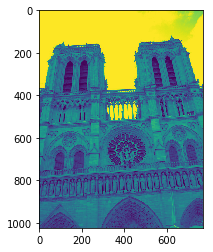

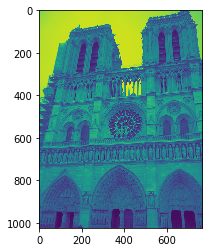

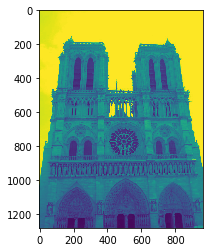

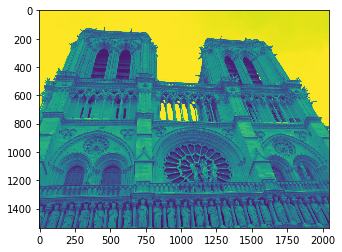

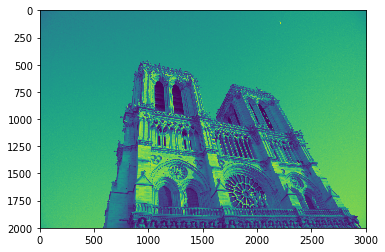

Done!


In [2]:
img_dir = "../images"
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        image_dir = os.path.join(img_dir, img)
        image = cv2.imread(image_dir)
        gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        plt.imshow(gray)
        plt.show()
else:
    print("image folder not exists!")
    exit(0)
print("Done!")

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***NotreDame5.jpg*** are:

In [3]:
keypoints = torch.ShortTensor([
    [(121, 621),(147, 522),(147, 536),(148, 479),(148, 522),(148, 536),(149, 114),(149, 479),(149, 522),(149, 536),(150, 114),(150, 479),(150, 525),(151, 114),(151, 479),(156, 221),(156, 563),(157, 221),(157, 563),(158, 221),(158, 563),(165, 134),(168, 241),(169, 218),(169, 241),(170, 218),(170, 241),(171, 218),(172, 93),(172, 172),(173, 93),(173, 157),(173, 172),(174, 93),(174, 134),(174, 157),(174, 172),(175, 134),(175, 157),(176, 66),(176, 134),(177, 66),(179, 692),(182, 69),(195, 697),(198, 65),(200, 458),(208, 303),(211, 63),(241, 447),(246, 311),(270, 457),(321, 451),(324, 748),(328, 313),(328, 749),(329, 313),(329, 749),(330, 313),(330, 749),(336, 448),(338, 516),(338, 753),(339, 516),(339, 545),(339, 753),(340, 516),(340, 545),(340, 753),(341, 545),(353, 669),(353, 756),(354, 669),(354, 756),(355, 617),(355, 669),(355, 756),(356, 617),(363, 24),(363, 323),(364, 24),(364, 323),(364, 644),(365, 24),(365, 323),(365, 644),(365, 752),(366, 322),(366, 644),(366, 752),(367, 322),(367, 752),(368, 322),(377, 7),(380, 149),(380, 439),(381, 149),(381, 403),(381, 414),(381, 439),(382, 149),(382, 393),(382, 404),(382, 415),(382, 439),(383, 367),(383, 378),(383, 393),(383, 404),(383, 415),(384, 338),(384, 349),(384, 367),(384, 378),(384, 393),(384, 404),(385, 328),(385, 339),(385, 350),(385, 367),(385, 378),(386, 328),(386, 339),(386, 350),(387, 328),(387, 339),(390, 199),(406, 633),(409, 666),(412, 398),(414, 355),(414, 398),(415, 355),(418, 435),(420, 392),(420, 435),(421, 392),(423, 232),(429, 449),(432, 225),(432, 420),(433, 225),(433, 420),(434, 225),(434, 420),(434, 444),(435, 366),(435, 444),(436, 39),(436, 366),(436, 444),(437, 39),(437, 334),(437, 366),(437, 384),(438, 39),(438, 334),(438, 384),(439, 39),(439, 133),(439, 334),(439, 384),(440, 133),(440, 342),(441, 133),(441, 333),(441, 344),(442, 86),(442, 333),(443, 86),(443, 333),(444, 86),(446, 322),(448, 462),(449, 322),(449, 462),(450, 322),(450, 462),(451, 322),(454, 581),(455, 322),(455, 581),(456, 322),(456, 581),(457, 322),(461, 207),(461, 575),(462, 206),(462, 575),(462, 652),(463, 206),(463, 575),(463, 652),(464, 206),(464, 652),(465, 464),(467, 576),(467, 653),(468, 576),(468, 653)],
    [(8, 706),(14, 639),(24, 650),(29, 553),(29, 712),(30, 553),(30, 610),(30, 712),(31, 553),(31, 610),(31, 712),(32, 610),(34, 516),(34, 587),(35, 516),(35, 579),(36, 516),(36, 571),(36, 582),(37, 571),(37, 582),(38, 571),(46, 721),(68, 500),(72, 318),(77, 504),(78, 293),(78, 504),(79, 286),(79, 504),(80, 286),(81, 264),(81, 286),(82, 264),(84, 493),(85, 199),(85, 252),(85, 265),(85, 493),(86, 196),(86, 246),(86, 259),(86, 493),(87, 196),(87, 239),(87, 252),(88, 196),(88, 239),(90, 226),(90, 244),(91, 226),(91, 483),(92, 213),(92, 226),(92, 483),(93, 207),(93, 483),(94, 207),(94, 491),(95, 207),(102, 149),(116, 358),(124, 142),(125, 739),(126, 142),(126, 739),(127, 142),(127, 739),(128, 142),(128, 741),(129, 142),(129, 741),(194, 749),(207, 482),(220, 754),(235, 484),(241, 764),(242, 482),(242, 764),(243, 482),(243, 764),(244, 482),(248, 652),(254, 389),(254, 481),(255, 389),(255, 481),(256, 389),(256, 481),(272, 387),(272, 482),(273, 387),(273, 473),(273, 484),(274, 387),(274, 465),(274, 482),(275, 457),(275, 473),(275, 484),(276, 456),(276, 467),(277, 456),(277, 467),(278, 431),(278, 456),(279, 423),(281, 406),(281, 422),(281, 433),(282, 397),(282, 408),(282, 422),(283, 397),(283, 408),(284, 397),(284, 412),(288, 573),(290, 181),(290, 573),(291, 181),(291, 573),(292, 181),(306, 67),(309, 169),(316, 662),(319, 375),(320, 420),(321, 375),(321, 420),(321, 469),(321, 663),(322, 420),(322, 469),(322, 663),(323, 337),(323, 432),(323, 469),(323, 663),(324, 337),(324, 432),(325, 337),(325, 432),(328, 234),(328, 376),(328, 392),(329, 234),(329, 375),(329, 392),(330, 234),(330, 375),(330, 392),(331, 375),(331, 427),(334, 56),(334, 380),(335, 56),(335, 380),(336, 56),(336, 380),(340, 65),(340, 269),(341, 65),(341, 269),(342, 65),(342, 269),(348, 345),(350, 472),(351, 144),(351, 472),(352, 144),(352, 472),(353, 144),(354, 232),(363, 56),(372, 689),(374, 589),(374, 689),(375, 589),(375, 689),(376, 589),(377, 162),(379, 711),(380, 162),(380, 711),(383, 229),(384, 590),(385, 229),(385, 590),(388, 568),(395, 420),(401, 500),(404, 390),(406, 507),(407, 23),(407, 507),(408, 23),(408, 507),(409, 23),(409, 335)],
    [(153, 189),(165, 749),(192, 162),(195, 147),(196, 208),(196, 233),(196, 250),(197, 141),(197, 208),(197, 219),(197, 232),(197, 243),(197, 259),(197, 274),(197, 285),(197, 301),(197, 357),(197, 368),(198, 141),(198, 208),(198, 219),(198, 232),(198, 243),(198, 259),(198, 274),(198, 285),(198, 301),(198, 333),(198, 344),(198, 357),(198, 368),(198, 593),(199, 208),(199, 219),(199, 232),(199, 259),(199, 274),(199, 285),(199, 301),(199, 325),(199, 336),(199, 357),(199, 368),(199, 593),(200, 307),(200, 325),(200, 336),(200, 374),(200, 593),(200, 731),(201, 325),(201, 336),(201, 374),(201, 731),(202, 374),(202, 730),(206, 370),(206, 778),(207, 370),(207, 778),(208, 370),(208, 613),(208, 778),(209, 613),(209, 624),(209, 647),(210, 613),(210, 624),(210, 647),(210, 664),(210, 679),(210, 690),(210, 797),(211, 613),(211, 624),(211, 647),(211, 664),(211, 679),(211, 690),(211, 703),(211, 714),(211, 797),(212, 647),(212, 664),(212, 679),(212, 690),(212, 703),(212, 714),(212, 797),(213, 688),(213, 703),(213, 714),(234, 801),(245, 138),(248, 398),(249, 133),(249, 398),(250, 133),(250, 398),(250, 806),(251, 133),(251, 806),(252, 129),(252, 806),(253, 129),(255, 386),(255, 559),(256, 386),(256, 559),(257, 386),(257, 559),(258, 810),(260, 397),(260, 810),(261, 397),(264, 572),(274, 116),(286, 832),(342, 562),(353, 563),(357, 543),(359, 563),(362, 550),(369, 564),(375, 317),(376, 112),(376, 317),(377, 112),(377, 317),(378, 112),(391, 111),(429, 109),(449, 853),(456, 105),(458, 407),(459, 102),(459, 407),(459, 849),(460, 102),(460, 407),(460, 849),(461, 102),(461, 849),(464, 77),(466, 427),(466, 478),(467, 83),(467, 427),(467, 478),(467, 854),(468, 427),(468, 478),(468, 854),(468, 875),(469, 406),(469, 417),(469, 854),(469, 875),(470, 406),(470, 417),(470, 491),(470, 875),(471, 406),(471, 417),(471, 491),(471, 546),(472, 101),(472, 415),(472, 491),(472, 546),(473, 101),(473, 546),(474, 76),(474, 99),(475, 76),(475, 99),(476, 76),(476, 99),(477, 75),(479, 520),(480, 76),(480, 446),(480, 496),(480, 520),(481, 76),(481, 407),(481, 418),(481, 446),(481, 496),(481, 520),(482, 76),(482, 407),(482, 418),(482, 437),(482, 448),(482, 474),(482, 496),(482, 520),(483, 75),(483, 407)],
    [(195, 1185),(224, 808),(225, 246),(225, 808),(226, 246),(226, 808),(227, 246),(230, 793),(231, 239),(231, 793),(232, 239),(232, 793),(246, 828),(252, 1161),(253, 825),(253, 1145),(253, 1161),(254, 825),(254, 1145),(254, 1161),(255, 825),(255, 1145),(279, 223),(284, 830),(299, 1140),(303, 212),(303, 414),(304, 212),(304, 414),(305, 212),(305, 414),(313, 209),(325, 835),(353, 189),(364, 186),(375, 180),(387, 175),(401, 169),(409, 134),(409, 167),(410, 134),(410, 167),(411, 134),(411, 145),(416, 831),(422, 160),(422, 830),(423, 160),(423, 830),(424, 160),(424, 830),(425, 159),(437, 128),(442, 832),(454, 1135),(456, 126),(456, 1135),(457, 126),(472, 833),(476, 61),(479, 114),(481, 67),(481, 114),(482, 67),(484, 845),(486, 111),(486, 653),(486, 845),(487, 111),(487, 653),(487, 845),(488, 111),(488, 653),(489, 111),(489, 653),(498, 589),(498, 837),(499, 589),(499, 837),(500, 589),(500, 837),(508, 38),(508, 49),(509, 38),(509, 49),(510, 38),(510, 49),(520, 849),(521, 872),(522, 849),(522, 872),(522, 897),(523, 872),(523, 897),(524, 937),(525, 958),(526, 937),(526, 958),(529, 33),(529, 1023),(530, 33),(530, 1023),(531, 33),(531, 1023),(531, 1067),(543, 201),(580, 964),(584, 283),(585, 1062),(586, 283),(586, 402),(586, 1062),(587, 147),(587, 402),(587, 1062),(587, 1073),(588, 147),(588, 402),(588, 1064),(589, 147),(589, 402),(589, 1064),(590, 402),(590, 937),(590, 1064),(591, 402),(591, 937),(592, 402),(592, 520),(592, 937),(593, 520),(594, 654),(594, 920),(595, 654),(595, 920),(596, 654),(596, 920),(598, 498),(598, 1053),(599, 498),(599, 1022),(599, 1053),(600, 498),(600, 1022),(600, 1053),(601, 1022),(602, 702),(602, 1022),(603, 702),(604, 948),(608, 365),(608, 1007),(609, 365),(609, 1007),(610, 365),(610, 1007),(613, 1108),(614, 918),(614, 993),(614, 1108),(615, 918),(615, 993),(615, 1108),(616, 918),(616, 993),(618, 1059),(624, 1123),(627, 134),(629, 582),(632, 1038),(642, 904),(643, 848),(643, 904),(644, 847),(644, 879),(644, 904),(645, 847),(645, 879),(646, 847),(646, 879),(647, 847),(648, 1161),(651, 30),(652, 1098),(652, 1161),(653, 30),(653, 1098),(653, 1161),(654, 30),(654, 1098),(654, 1161),(655, 998),(656, 1109),(657, 998),(657, 1109),(665, 1065),(666, 116),(666, 1065),(667, 116),(667, 1065)],
    [(477, 963),(499, 1013),(515, 928),(515, 1082),(516, 928),(516, 1082),(517, 928),(517, 1082),(521, 1115),(525, 1029),(531, 1085),(534, 1024),(535, 1159),(536, 1024),(536, 1079),(536, 1091),(536, 1159),(537, 1079),(537, 1091),(537, 1159),(538, 1079),(538, 1091),(538, 1160),(540, 1011),(546, 994),(547, 1127),(547, 1158),(548, 994),(548, 1127),(548, 1158),(549, 1127),(549, 1158),(550, 907),(551, 1115),(552, 907),(552, 1115),(553, 1049),(553, 1115),(553, 1183),(554, 1049),(554, 1183),(555, 1049),(555, 1183),(557, 1163),(558, 1175),(559, 1163),(559, 1175),(563, 1230),(566, 1120),(569, 1237),(570, 1312),(571, 1237),(571, 1312),(572, 1009),(572, 1155),(572, 1312),(573, 1009),(573, 1155),(574, 1009),(574, 1148),(580, 1172),(582, 958),(582, 993),(582, 1172),(583, 958),(583, 993),(584, 958),(584, 993),(585, 1277),(585, 1294),(586, 1277),(586, 1294),(587, 1225),(587, 1277),(587, 1294),(588, 1225),(588, 1277),(589, 1225),(590, 1318),(595, 1338),(601, 1382),(603, 1089),(603, 1382),(604, 1089),(605, 1303),(607, 1208),(607, 1303),(608, 1208),(609, 952),(609, 1115),(609, 1208),(610, 952),(610, 1115),(611, 952),(611, 1115),(617, 1096),(620, 1349),(627, 1119),(636, 1318),(639, 950),(640, 1366),(641, 950),(641, 1366),(643, 1025),(648, 1090),(648, 1277),(649, 1090),(649, 1277),(649, 1447),(650, 1090),(650, 1277),(650, 1447),(654, 949),(654, 1452),(655, 949),(655, 1452),(656, 949),(656, 1195),(660, 1214),(661, 1175),(661, 1214),(662, 1175),(662, 1214),(663, 1175),(665, 1428),(669, 948),(670, 1009),(670, 1027),(671, 948),(671, 1009),(671, 1027),(672, 1009),(672, 1027),(673, 1009),(674, 1026),(677, 860),(685, 947),(689, 1400),(693, 946),(693, 1008),(694, 946),(694, 1008),(695, 946),(695, 1008),(696, 1035),(697, 1189),(698, 1035),(698, 1189),(699, 1034),(699, 1189),(700, 1034),(700, 1188),(701, 1008),(701, 1034),(701, 1188),(702, 1008),(702, 1188),(703, 1008),(704, 1027),(704, 1196),(705, 1027),(705, 1196),(706, 1027),(706, 1196),(707, 1026),(707, 1197),(708, 1026),(708, 1189),(709, 945),(709, 1008),(709, 1026),(709, 1189),(710, 945),(710, 1008),(710, 1189),(710, 1992),(711, 945),(711, 1008),(711, 1197),(711, 1992),(712, 1008),(712, 1197),(712, 1992),(713, 1197),(713, 1211),(714, 1034),(714, 1211),(715, 1034),(715, 1211),(716, 1034),(716, 1211),(718, 1027),(718, 1197),(718, 1212),(719, 1027),(719, 1197),(719, 1212),(719, 1408),(720, 1027),(720, 1197)]
                            ])
print(len(keypoints))
for i in keypoints:
    print(len(i))
print("Done!")

5
200
200
200
200
200
Done!


Then we can obtain the patches with these keypoints:


In [4]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) - 1
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) - 1 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)-1
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)-1
        #print(i)
        #print("11:=>", xmin_res, xmax_res, ymin_res, ymax_res)
        #print("22:=>", ymin,ymax, xmin, xmax)

        res[i, 0, ymin_res: ymax_res, xmin_res: xmax_res] = img[ymin: ymax, xmin: xmax]
    return res
print("Done!")

Done!


### Let's plot these patches

Processing keypoint for file: 1
Processing keypoint for file: 2
Processing keypoint for file: 3
Processing keypoint for file: 4
Processing keypoint for file: 5


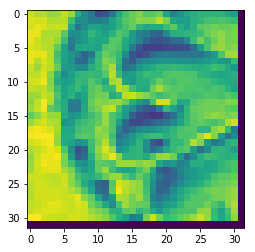

___


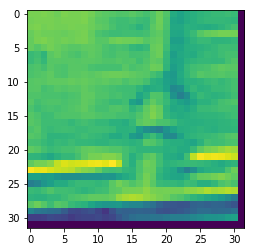

___


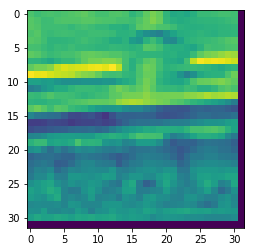

___


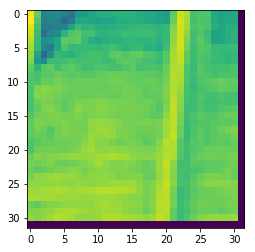

___


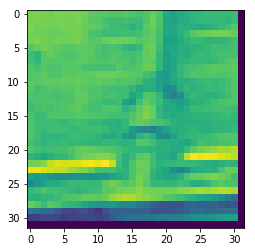

___


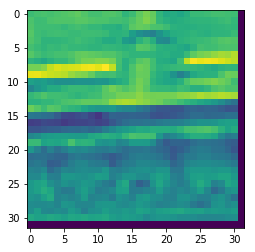

___


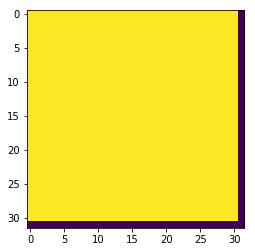

___


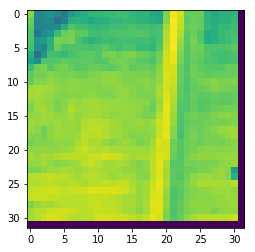

___


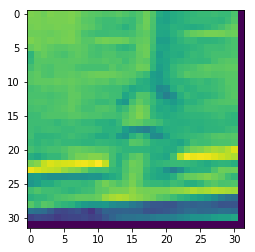

___


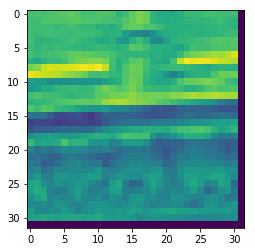

___


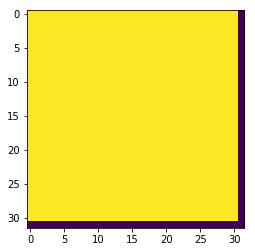

___


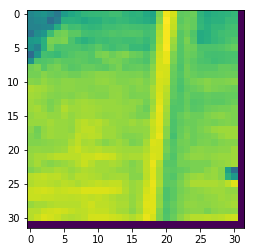

___


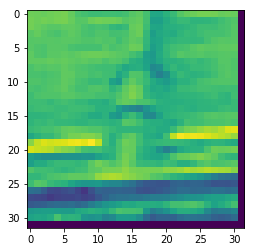

___


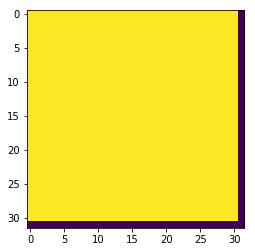

___


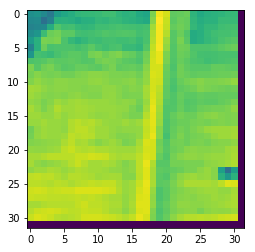

___


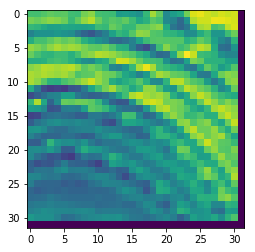

___


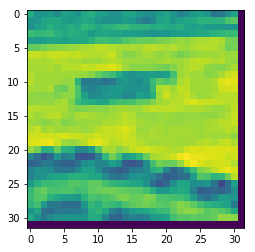

___


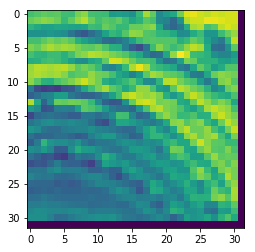

___


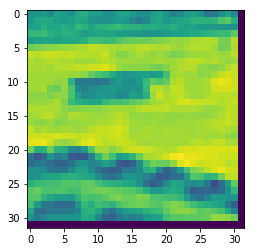

___


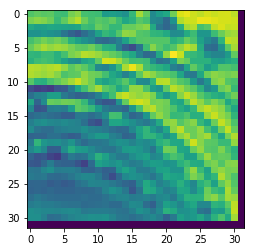

___


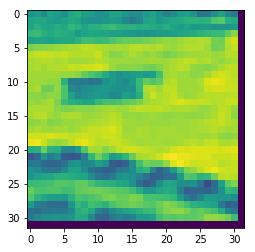

___


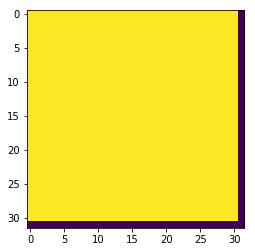

___


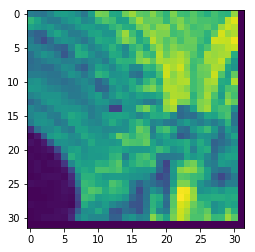

___


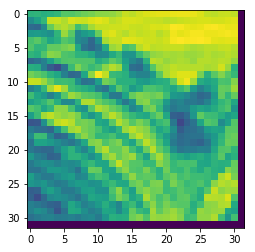

___


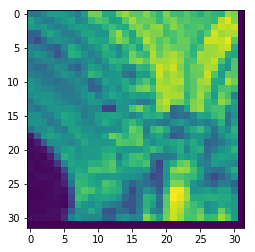

___


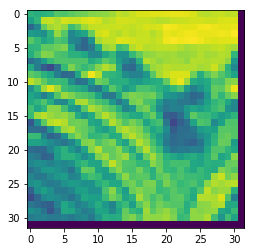

___


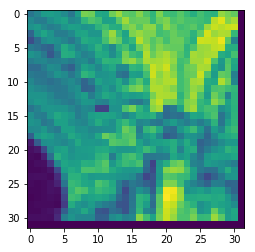

___


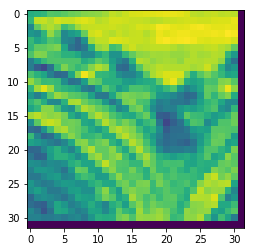

___


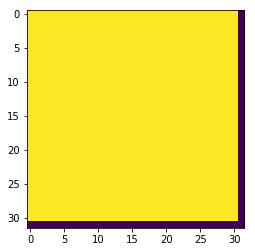

___


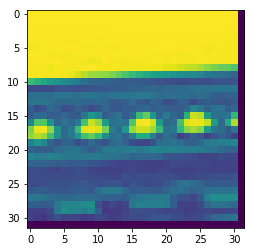

___


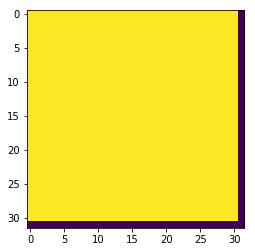

___


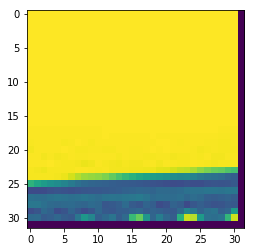

___


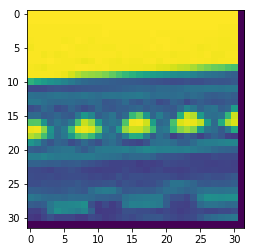

___


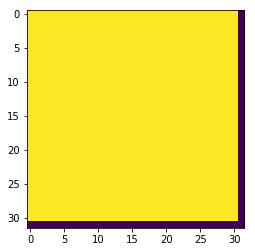

___


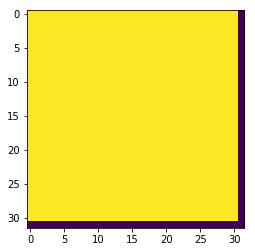

___


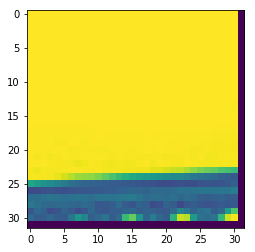

___


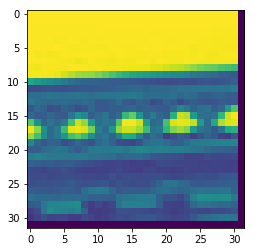

___


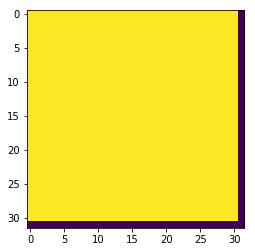

___


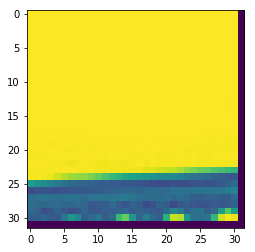

___


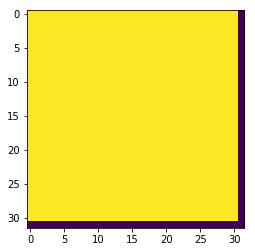

___


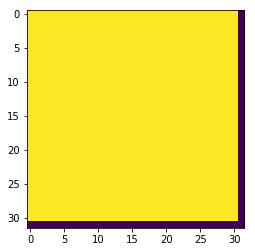

___


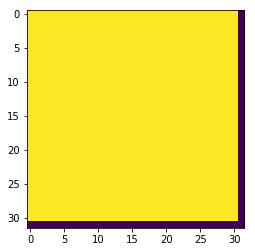

___


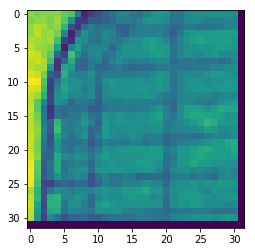

___


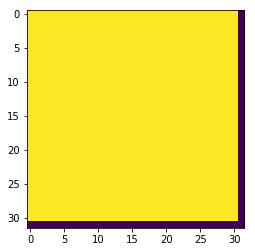

___


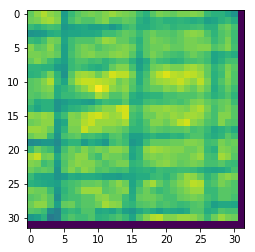

___


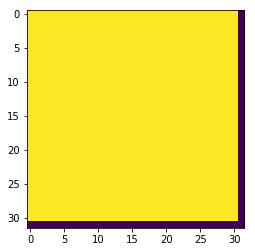

___


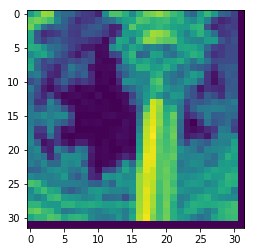

___


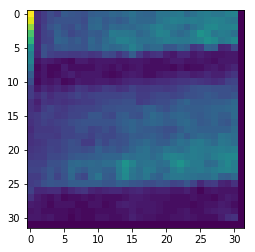

___


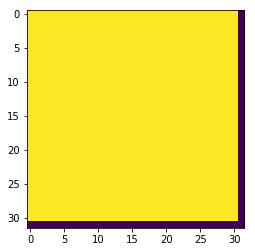

___


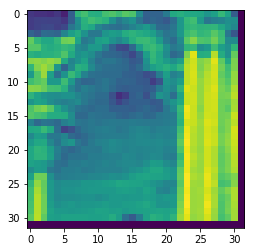

___


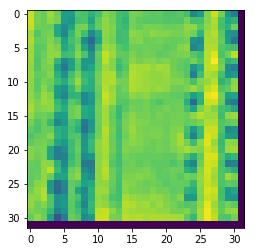

___


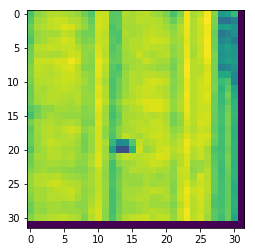

___


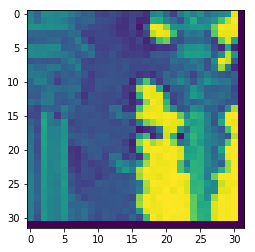

___


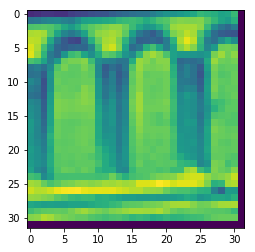

___


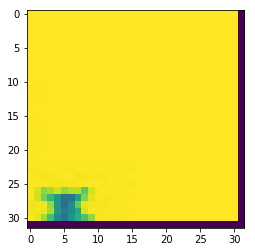

___


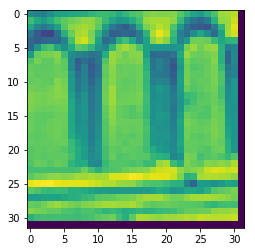

___


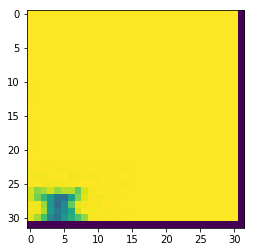

___


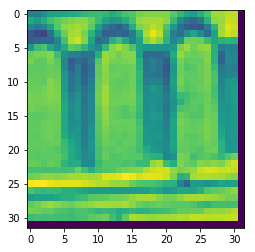

___


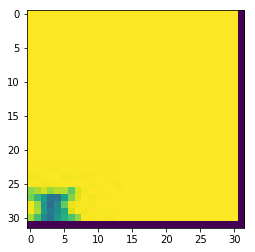

___


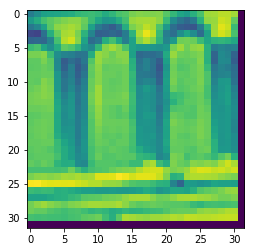

___


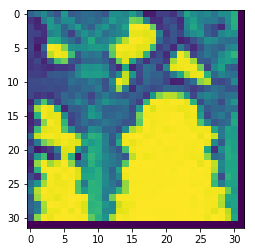

___


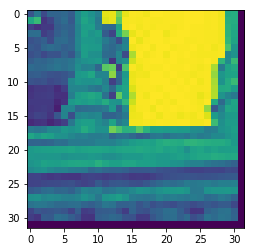

___


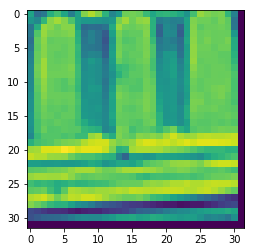

___


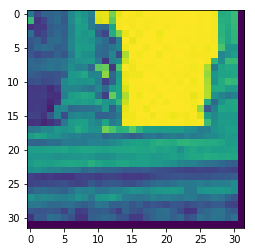

___


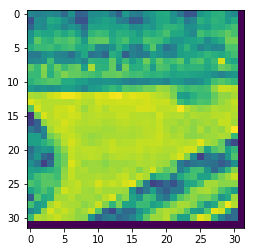

___


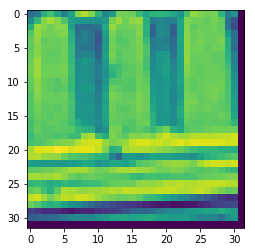

___


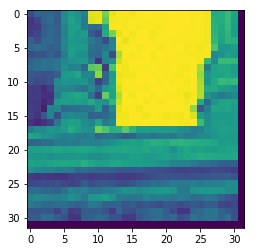

___


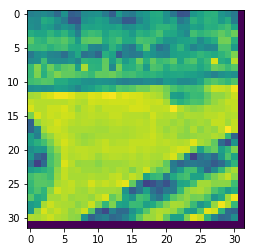

___


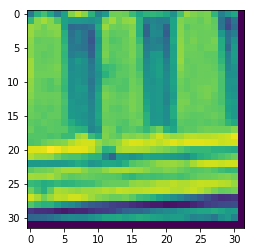

___


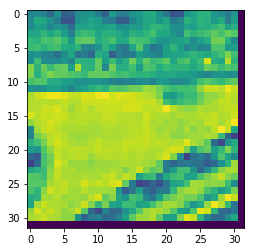

___


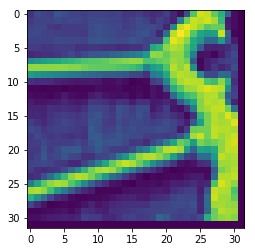

___


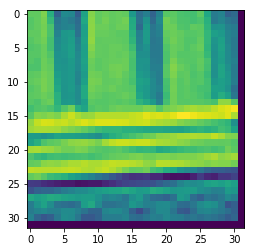

___


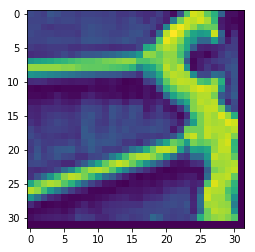

___


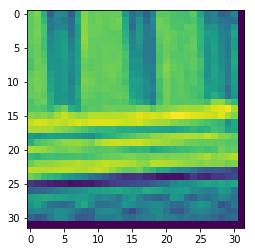

___


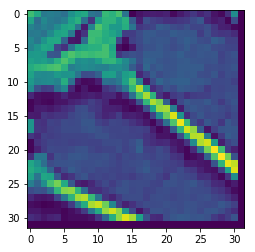

___


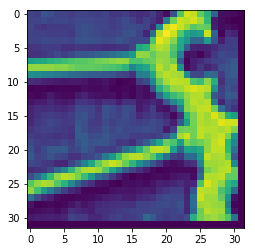

___


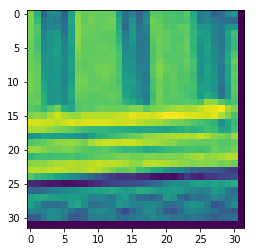

___


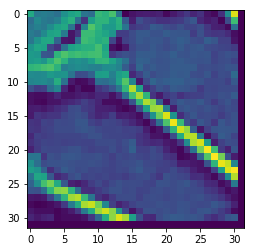

___


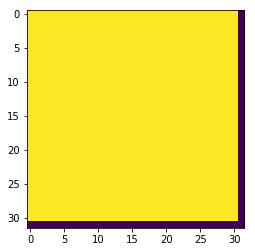

___


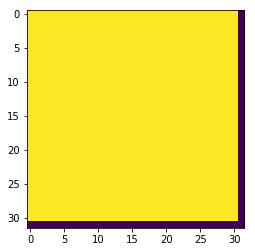

___


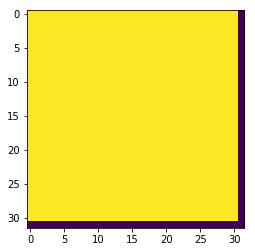

___


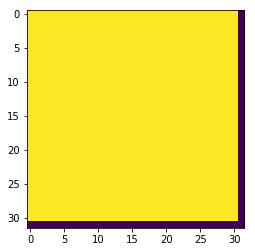

___


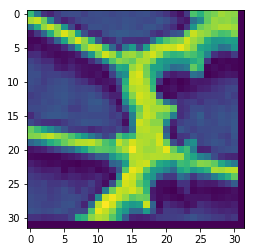

___


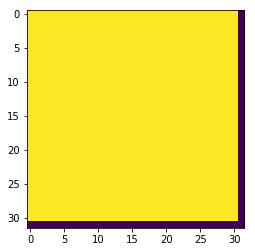

___


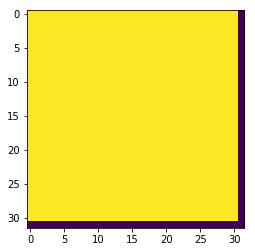

___


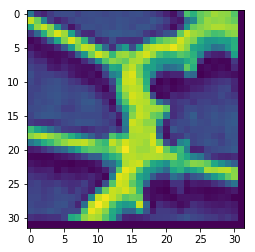

___


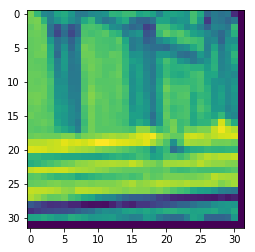

___


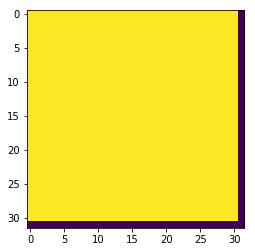

___


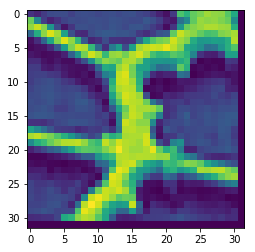

___


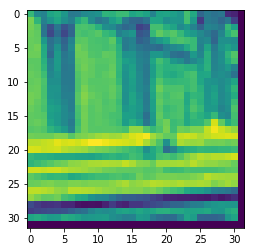

___


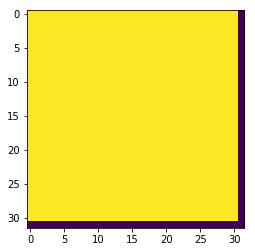

___


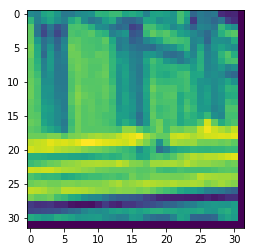

___


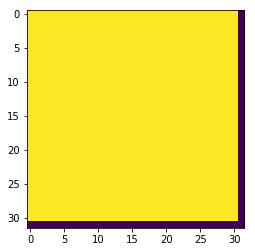

___


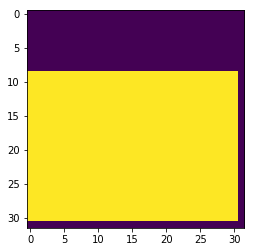

___


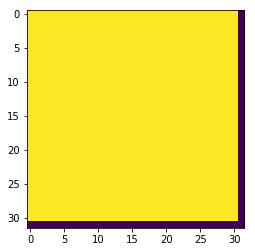

___


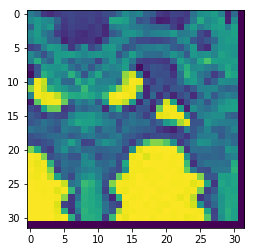

___


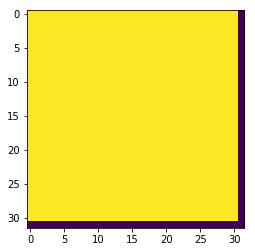

___


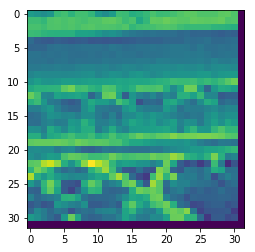

___


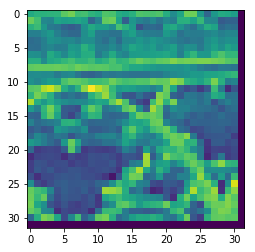

___


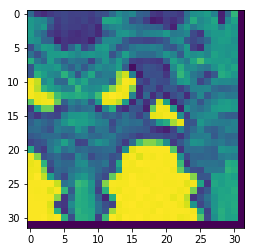

___


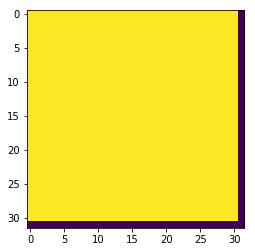

___


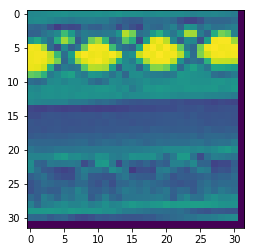

___


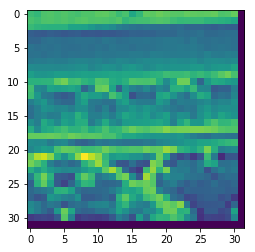

___


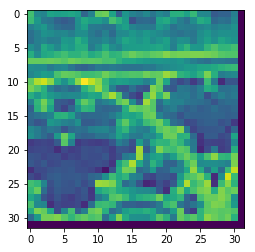

___


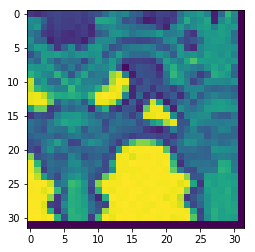

___


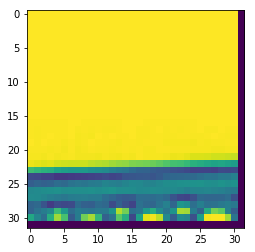

___


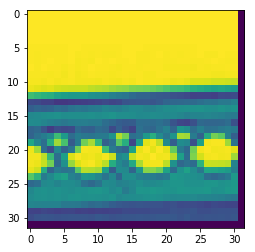

___


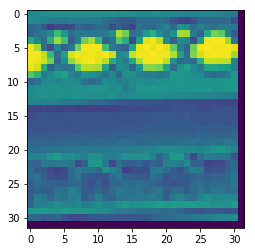

___


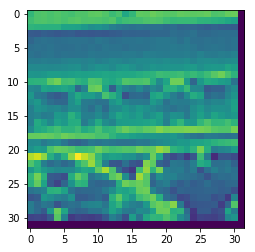

___


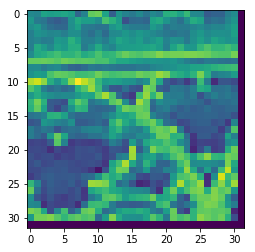

___


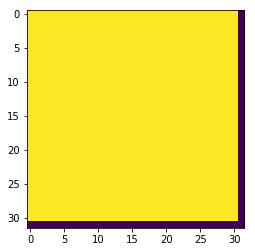

___


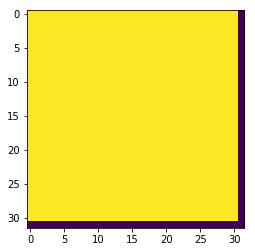

___


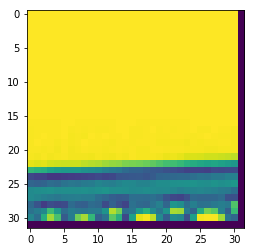

___


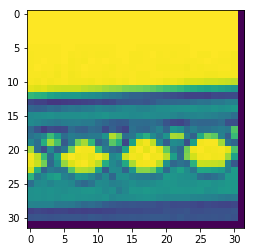

___


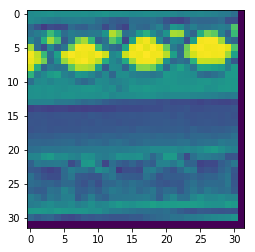

___


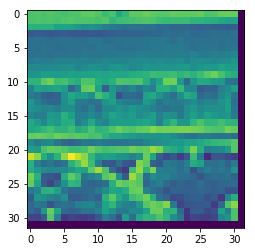

___


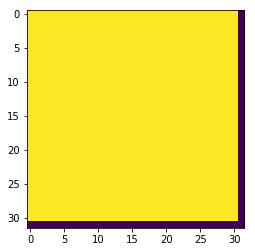

___


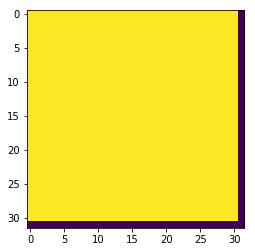

___


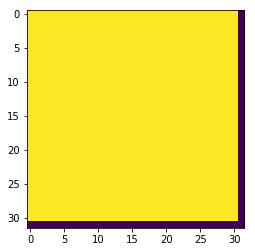

___


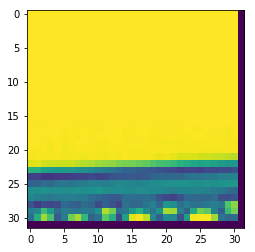

___


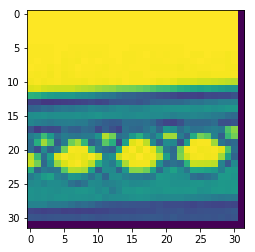

___


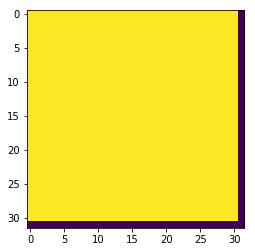

___


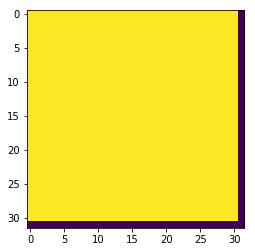

___


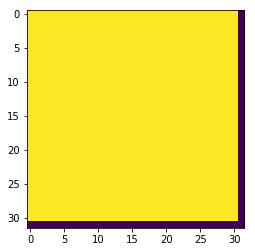

___


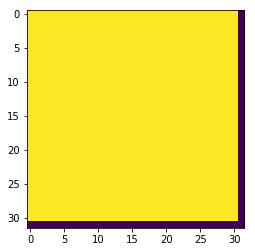

___


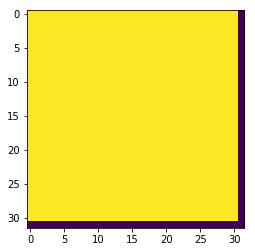

___


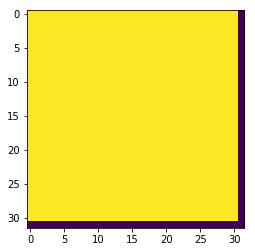

___


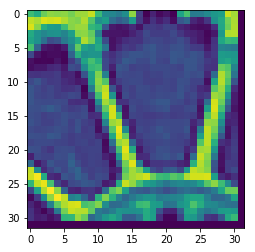

___


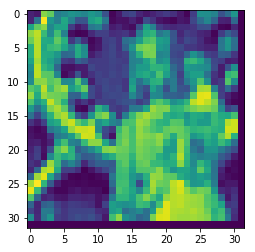

___


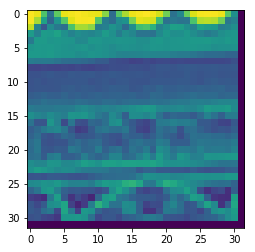

___


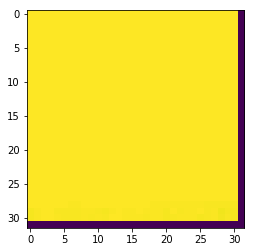

___


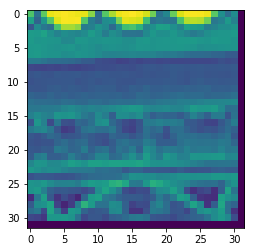

___


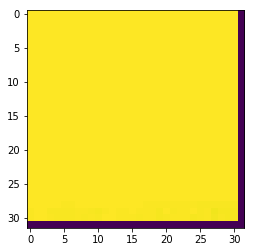

___


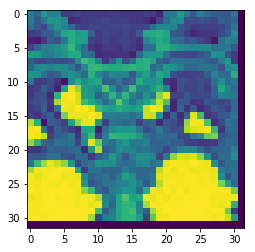

___


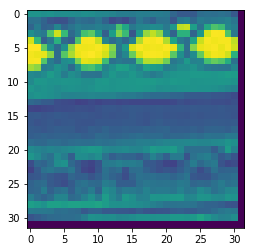

___


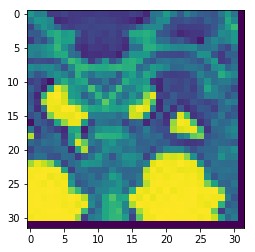

___


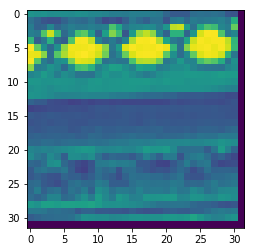

___


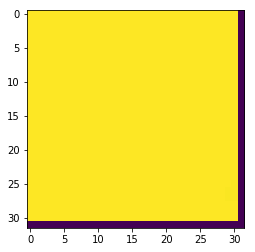

___


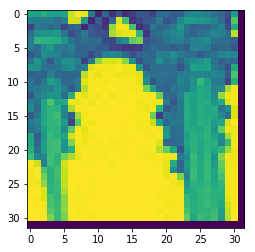

___


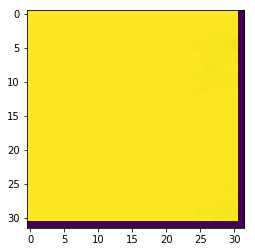

___


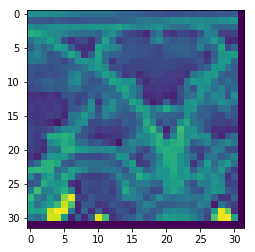

___


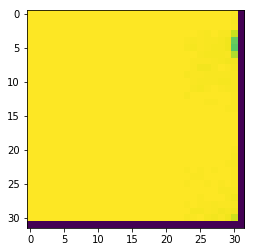

___


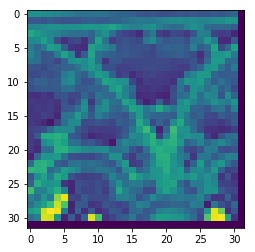

___


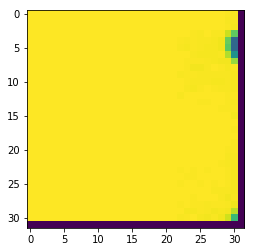

___


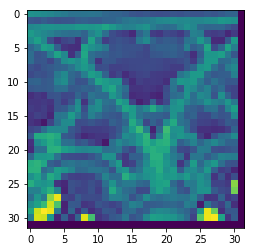

___


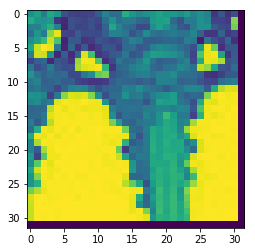

___


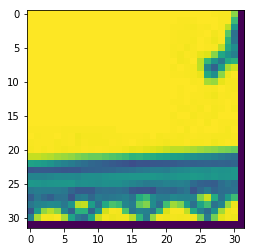

___


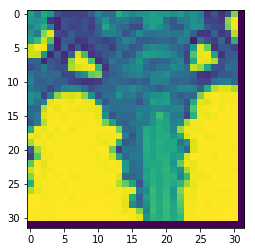

___


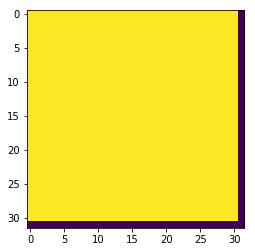

___


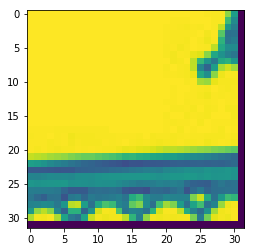

___


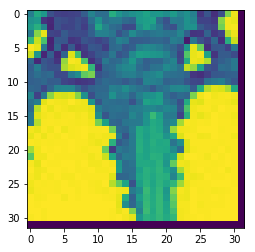

___


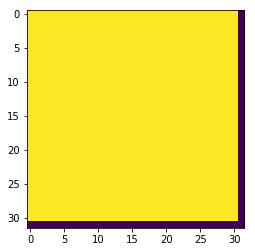

___


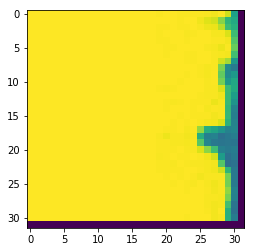

___


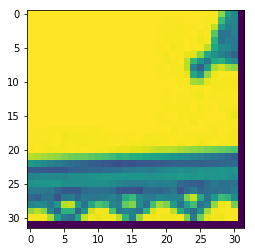

___


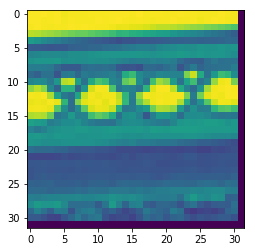

___


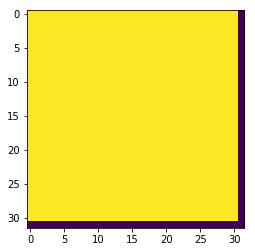

___


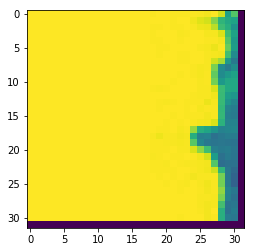

___


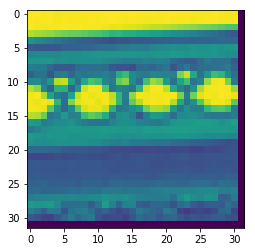

___


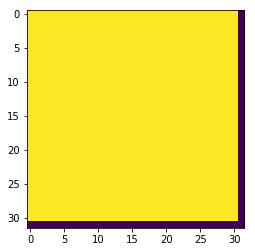

___


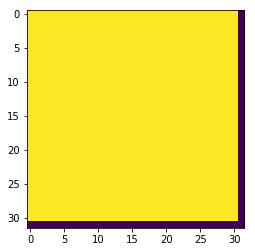

___


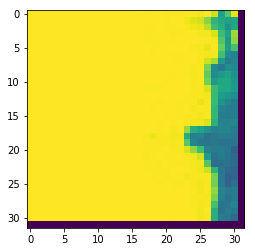

___


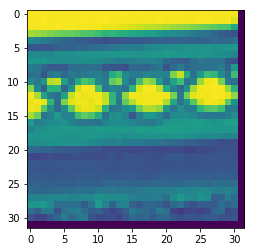

___


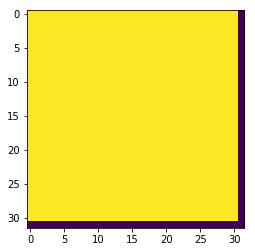

___


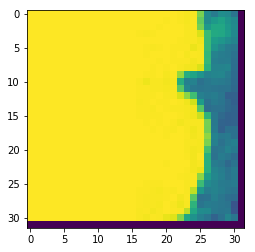

___


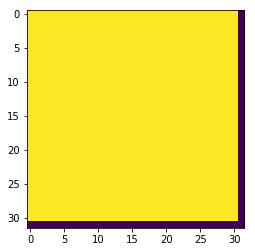

___


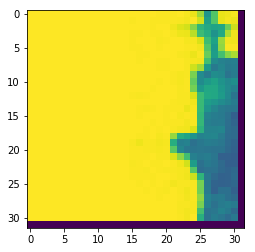

___


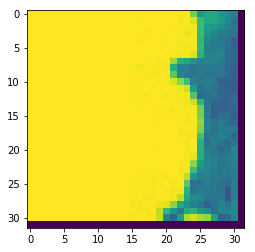

___


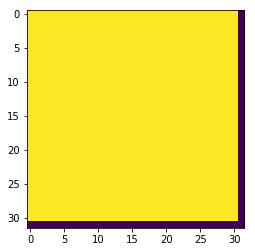

___


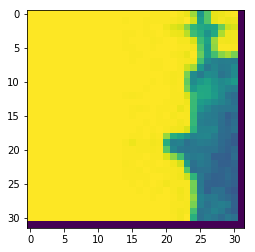

___


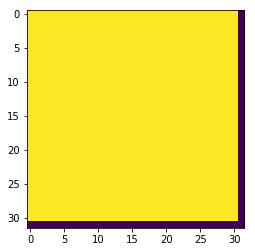

___


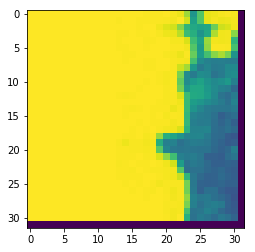

___


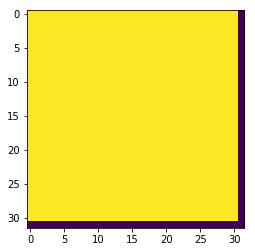

___


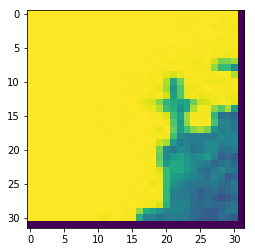

___


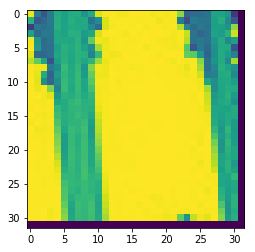

___


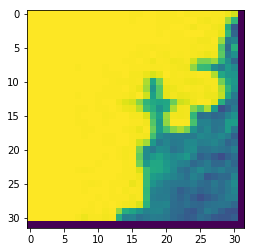

___


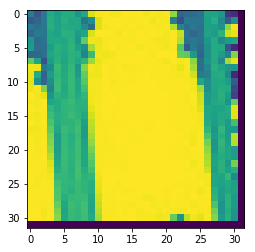

___


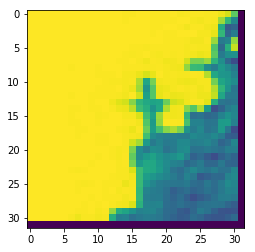

___


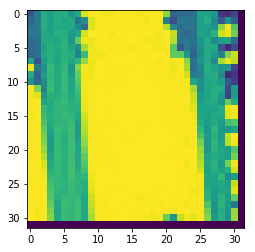

___


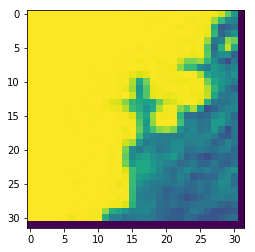

___


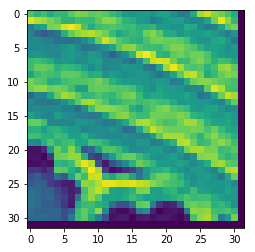

___


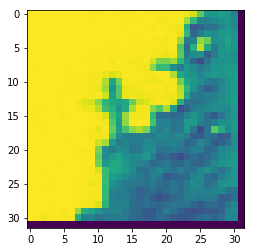

___


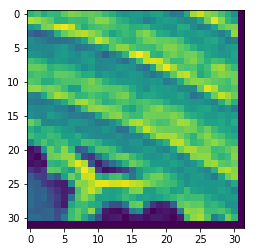

___


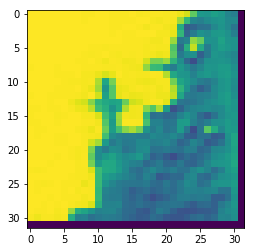

___


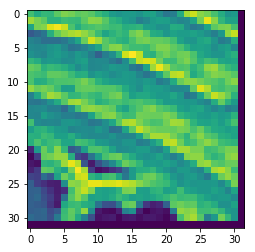

___


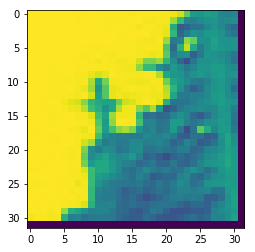

___


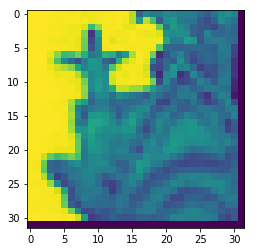

___


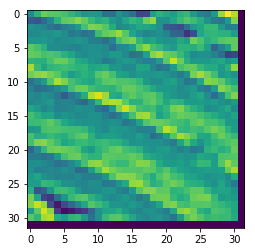

___


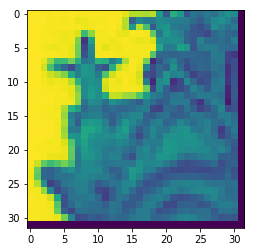

___


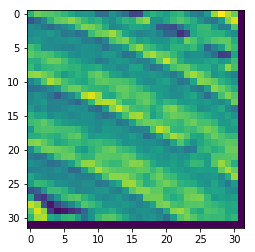

___


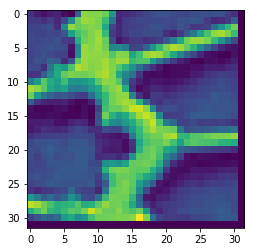

___


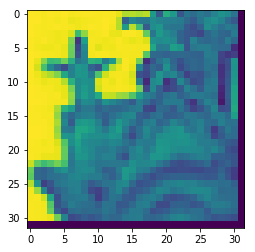

___


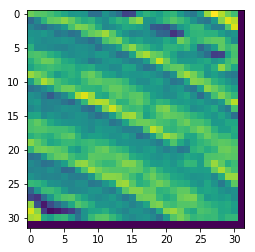

___


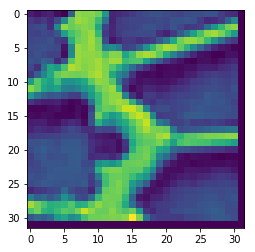

___


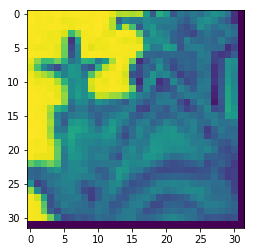

___


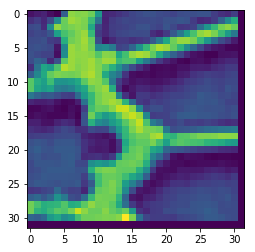

___


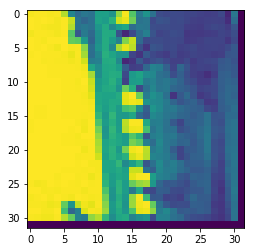

___


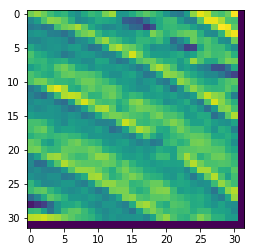

___


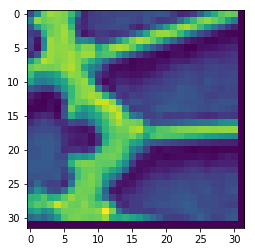

___


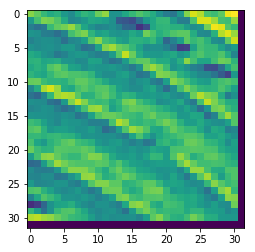

___


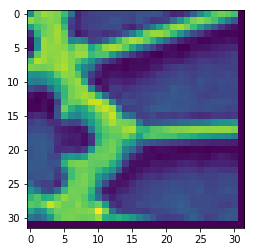

___
_________


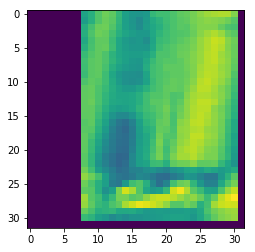

___


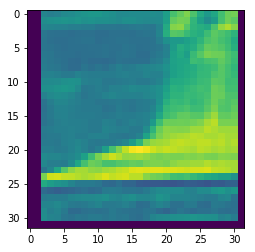

___


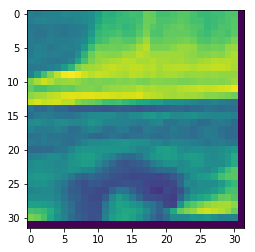

___


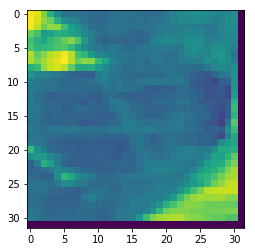

___


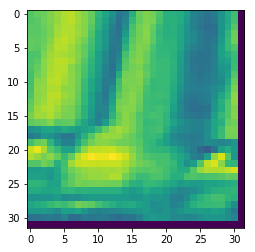

___


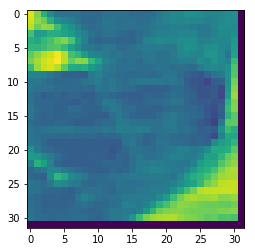

___


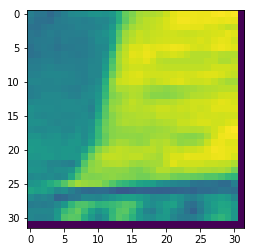

___


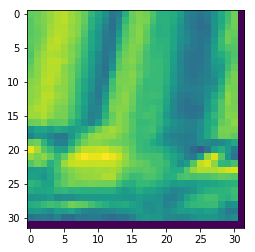

___


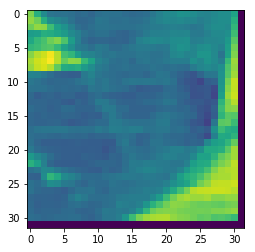

___


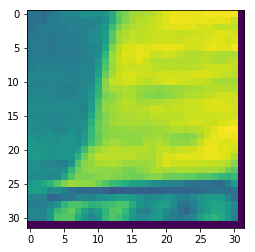

___


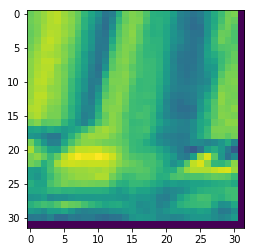

___


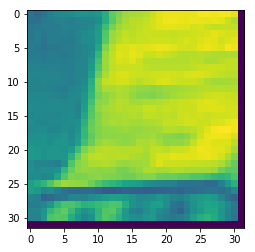

___


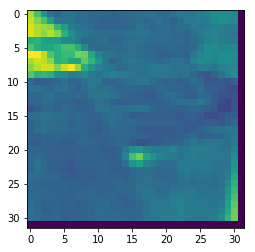

___


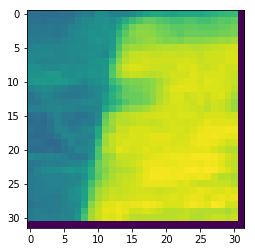

___


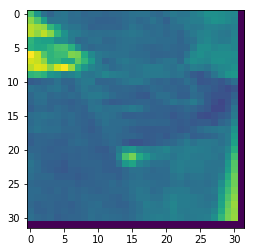

___


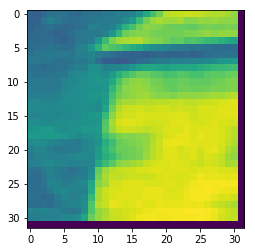

___


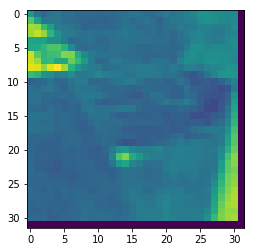

___


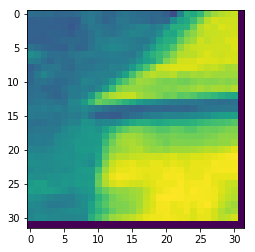

___


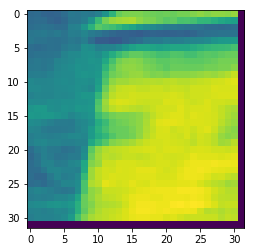

___


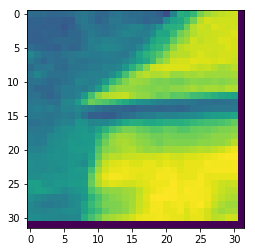

___


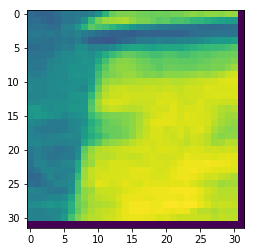

___


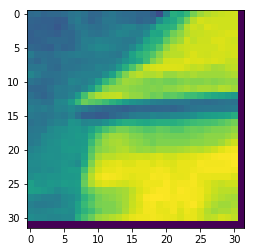

___


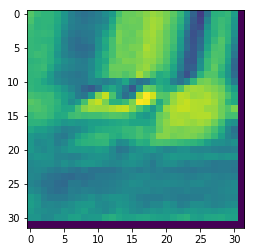

___


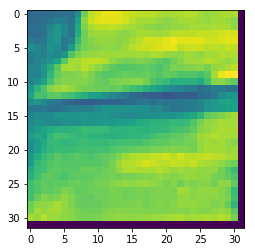

___


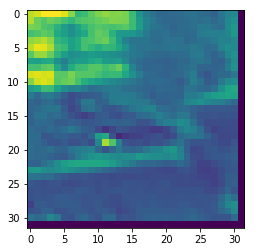

___


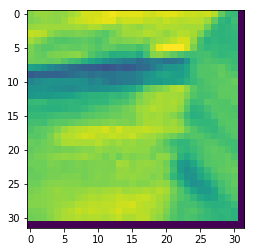

___


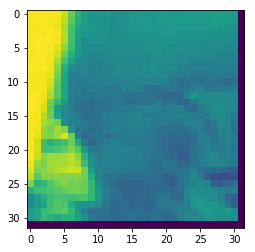

___


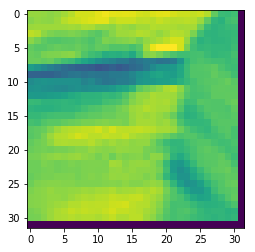

___


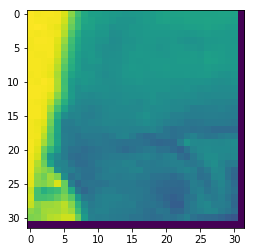

___


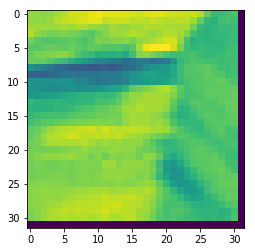

___


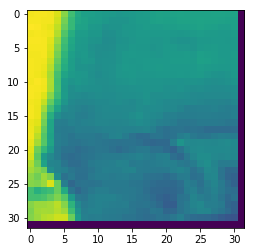

___


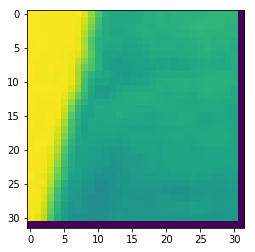

___


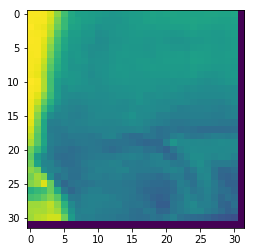

___


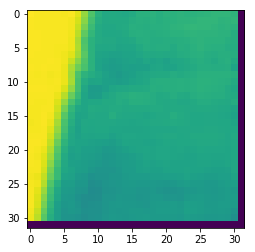

___


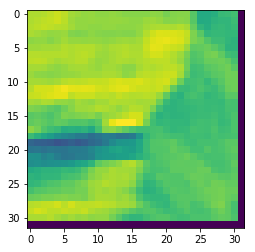

___


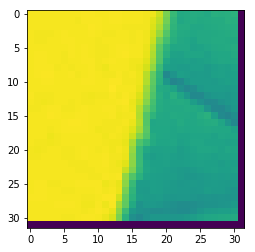

___


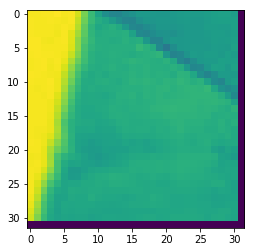

___


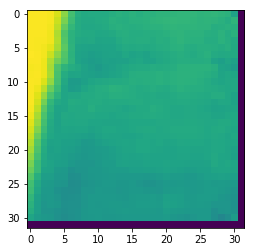

___


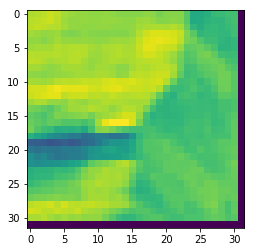

___


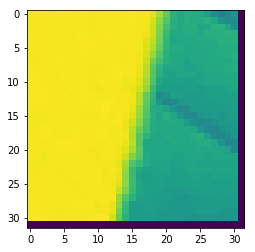

___


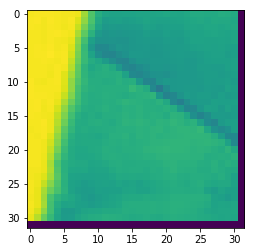

___


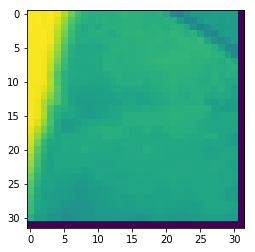

___


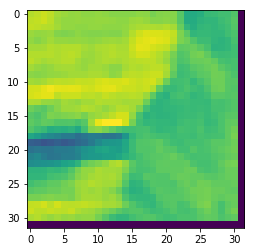

___


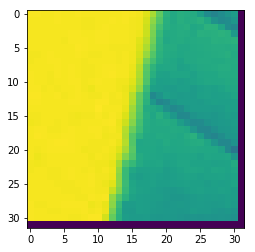

___


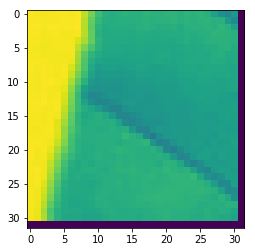

___


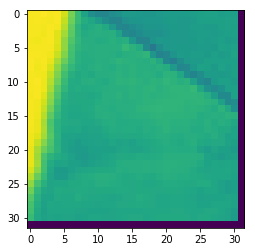

___


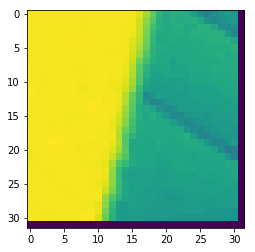

___


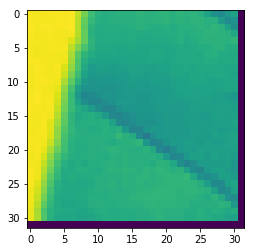

___


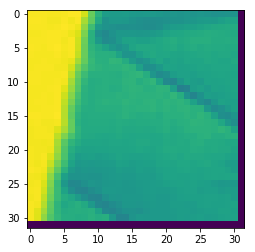

___


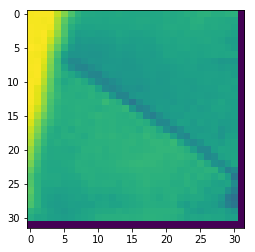

___


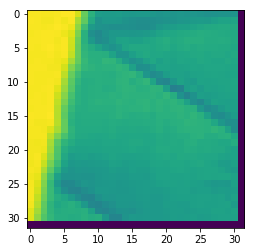

___


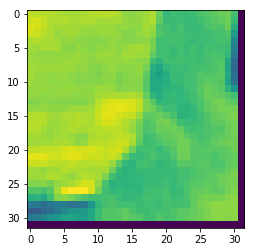

___


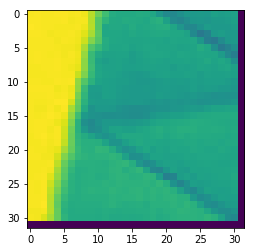

___


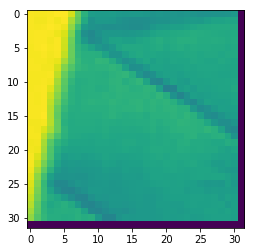

___


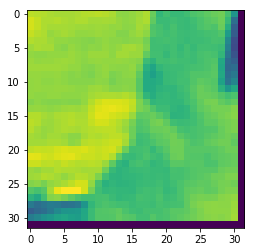

___


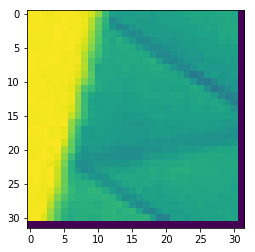

___


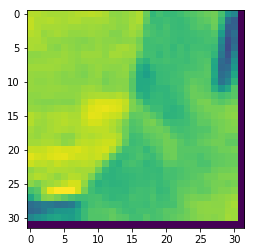

___


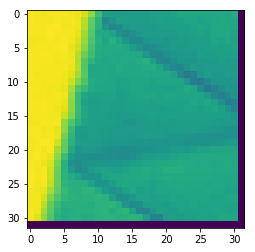

___


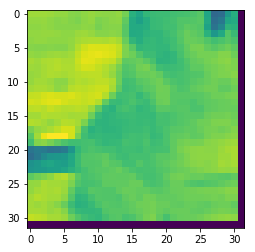

___


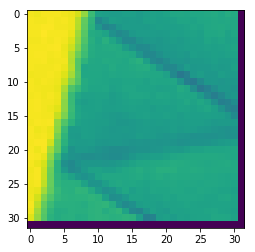

___


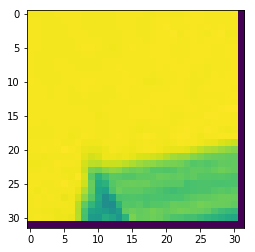

___


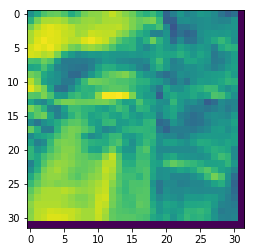

___


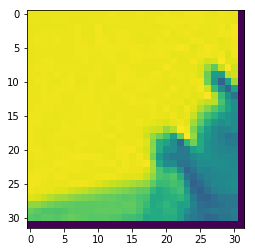

___


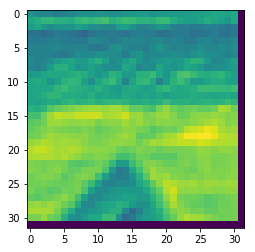

___


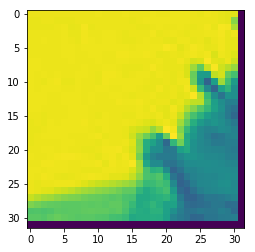

___


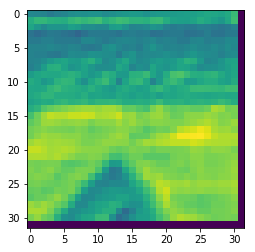

___


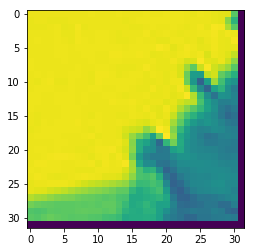

___


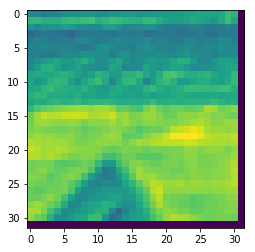

___


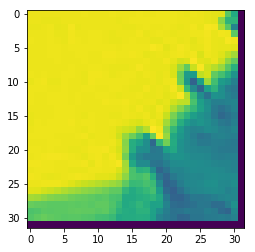

___


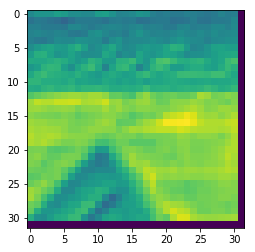

___


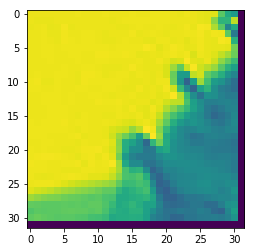

___


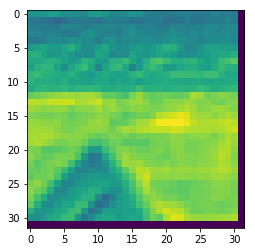

___


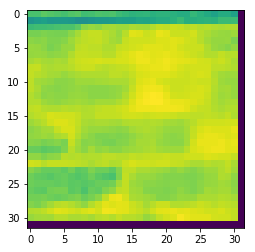

___


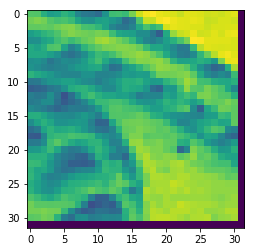

___


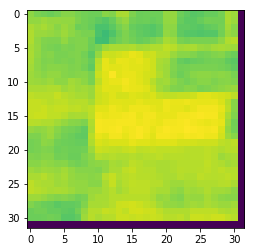

___


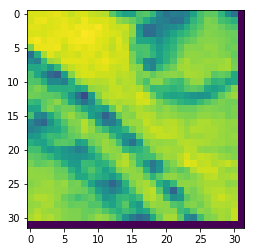

___


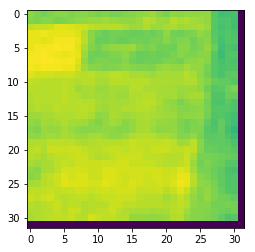

___


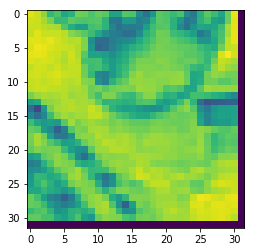

___


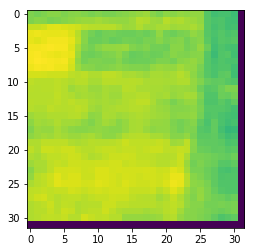

___


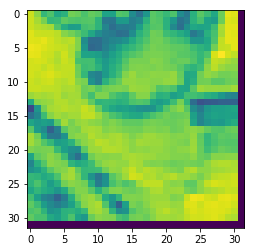

___


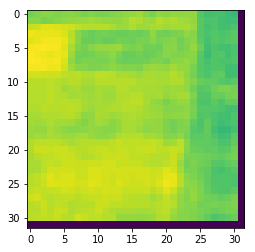

___


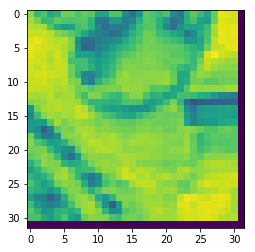

___


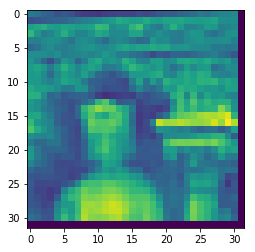

___


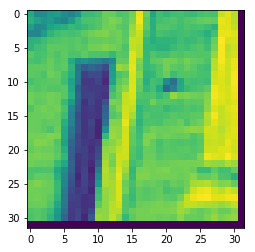

___


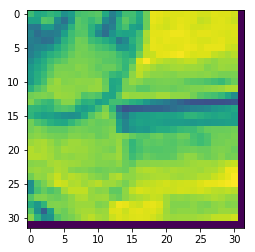

___


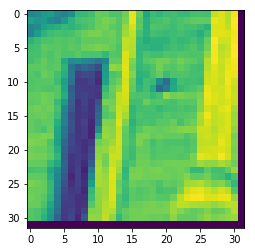

___


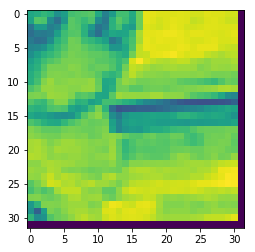

___


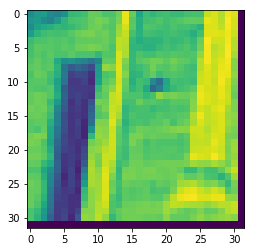

___


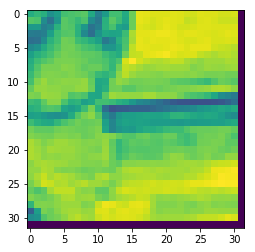

___


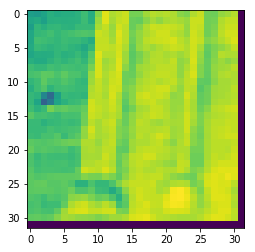

___


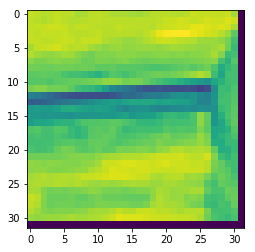

___


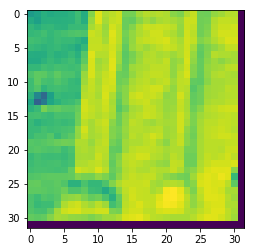

___


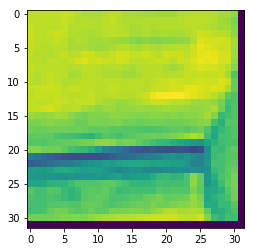

___


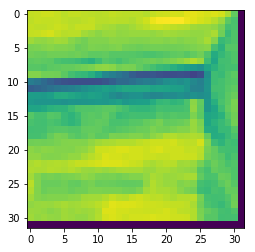

___


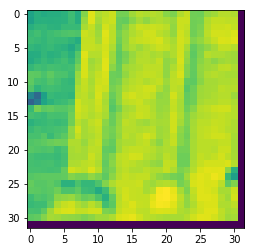

___


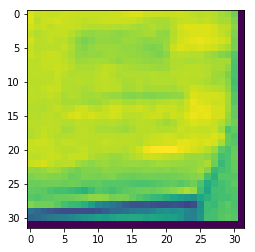

___


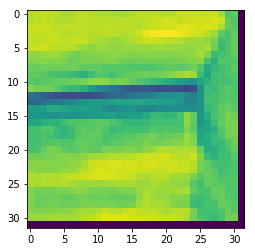

___


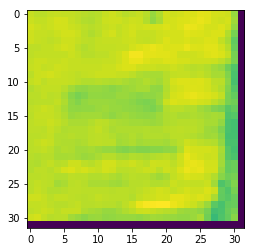

___


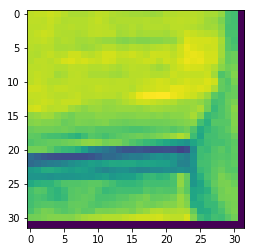

___


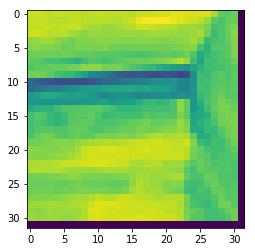

___


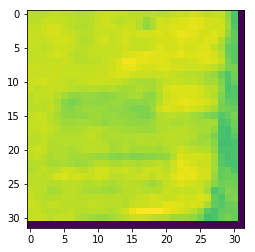

___


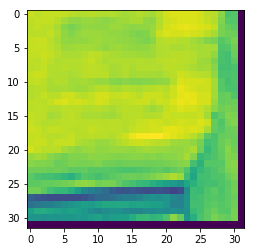

___


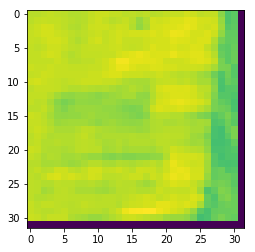

___


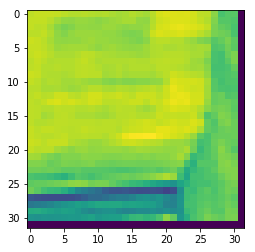

___


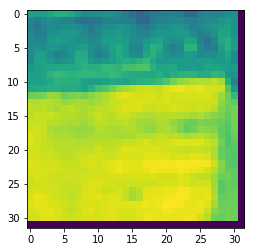

___


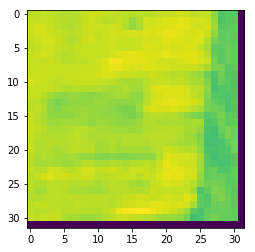

___


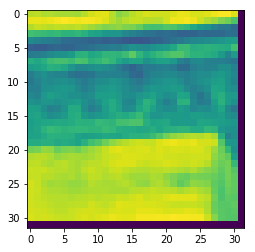

___


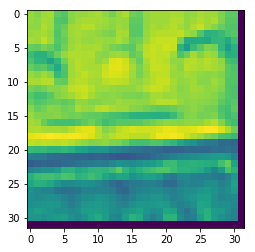

___


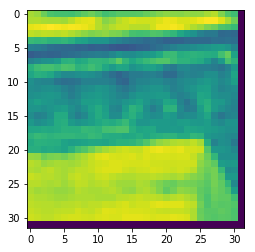

___


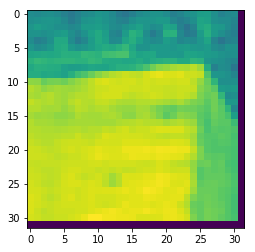

___


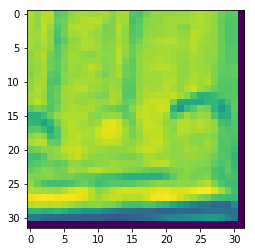

___


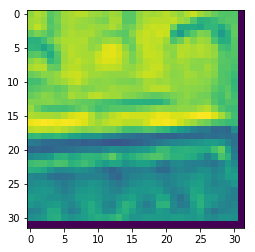

___


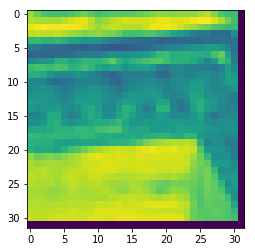

___


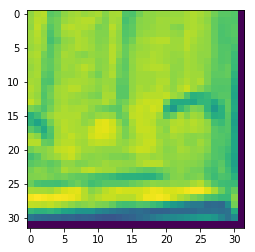

___


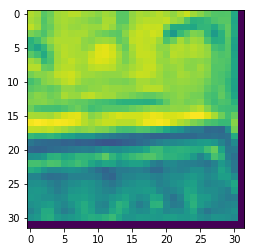

___


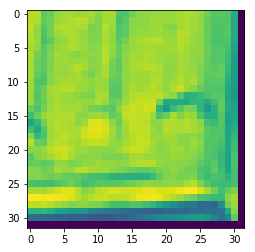

___


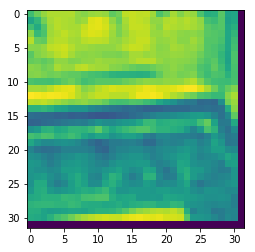

___


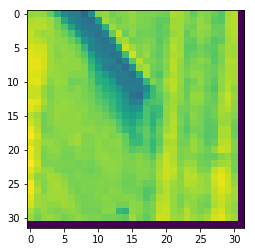

___


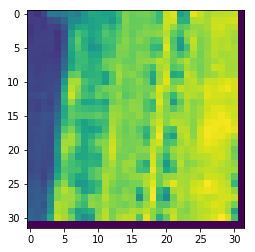

___


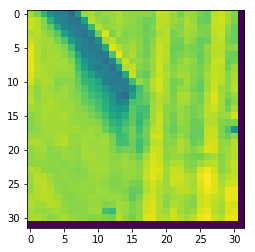

___


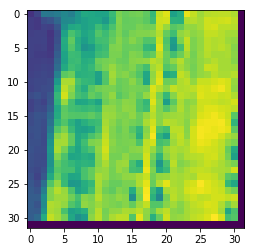

___


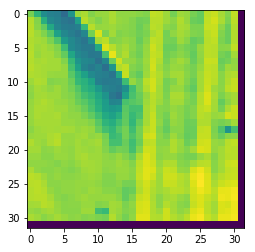

___


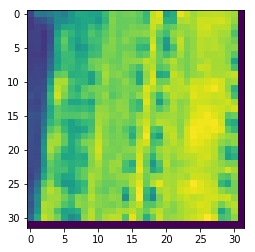

___


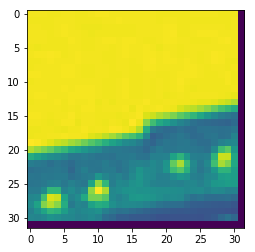

___


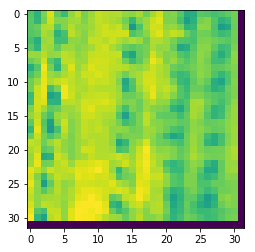

___


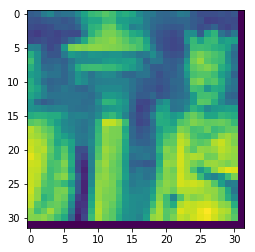

___


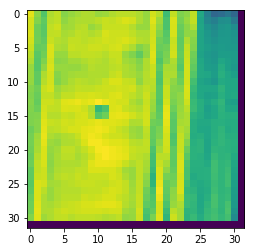

___


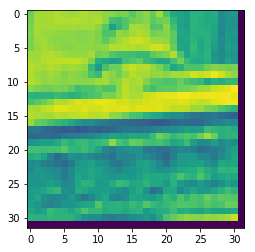

___


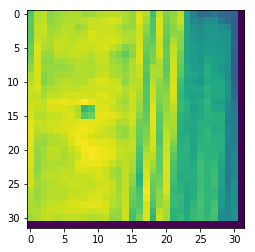

___


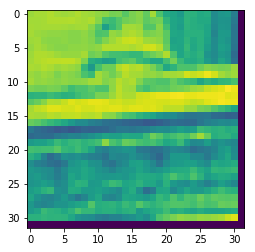

___


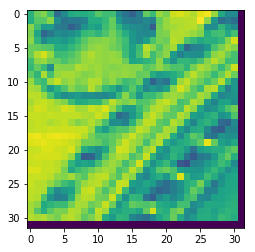

___


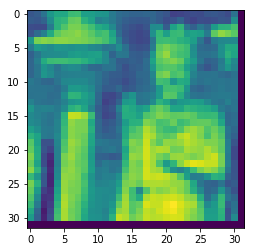

___


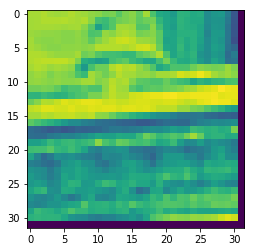

___


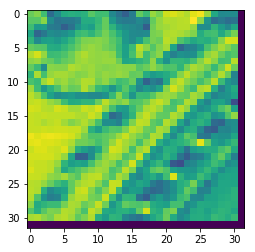

___


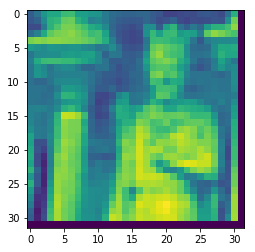

___


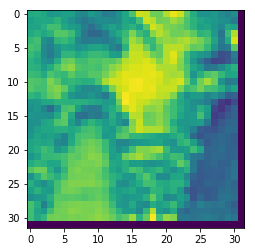

___


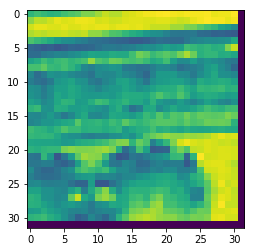

___


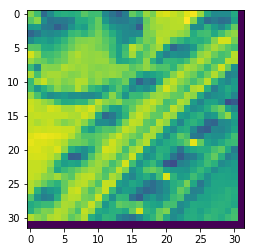

___


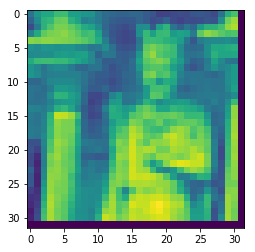

___


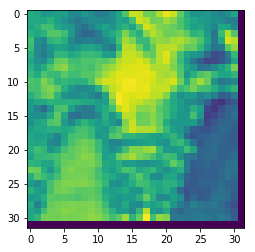

___


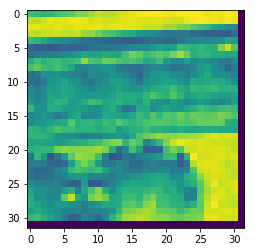

___


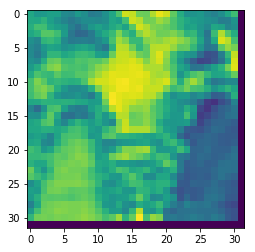

___


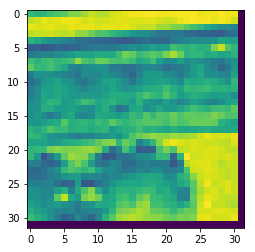

___


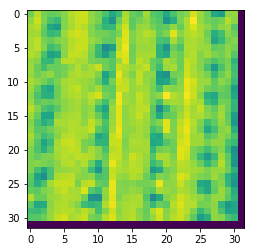

___


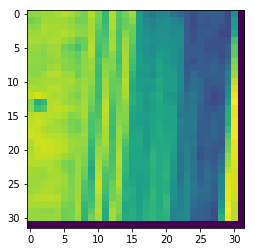

___


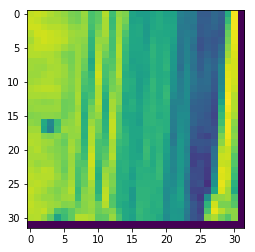

___


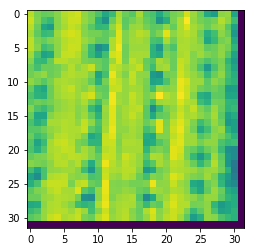

___


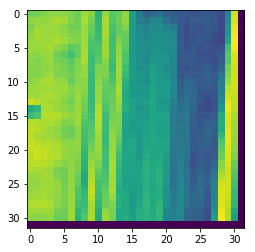

___


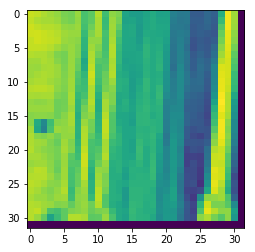

___


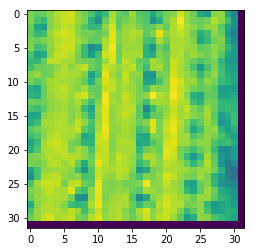

___


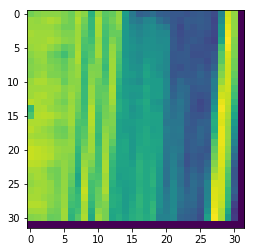

___


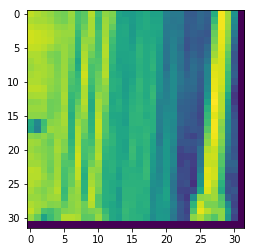

___


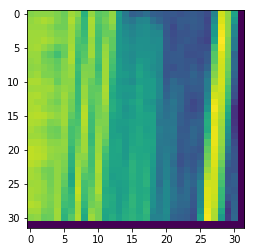

___


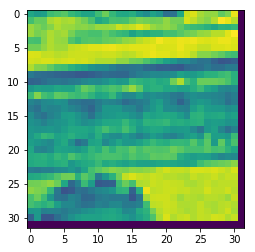

___


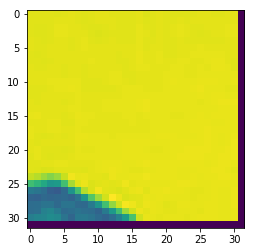

___


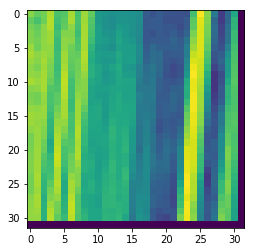

___


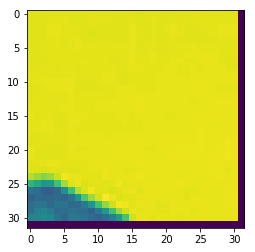

___


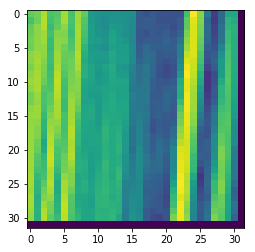

___


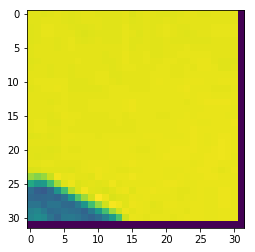

___


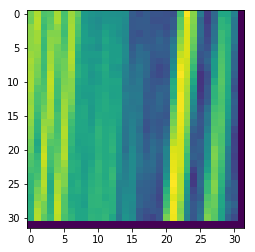

___


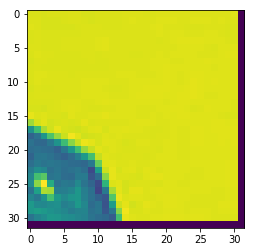

___


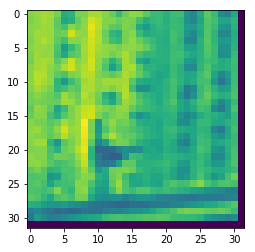

___


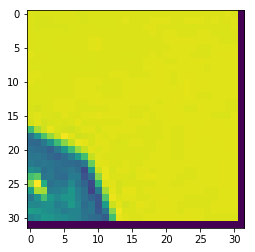

___


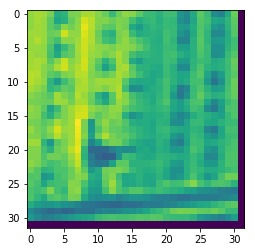

___


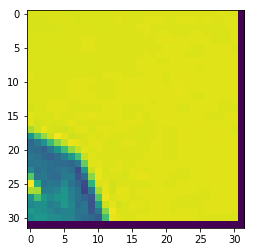

___


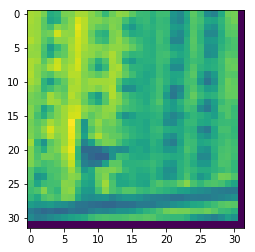

___


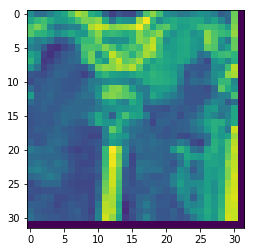

___


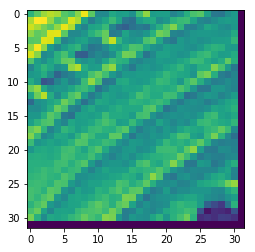

___


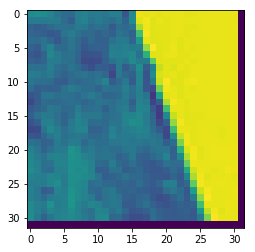

___


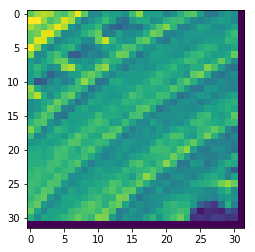

___


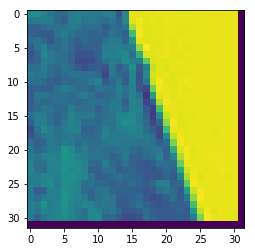

___


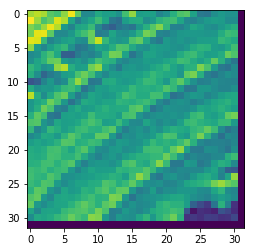

___


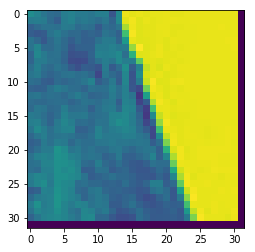

___


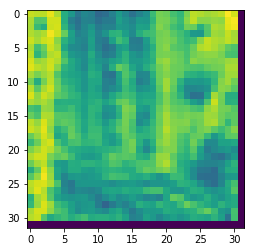

___


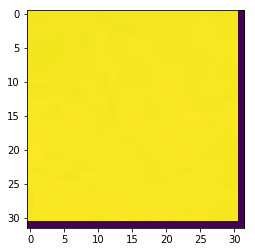

___


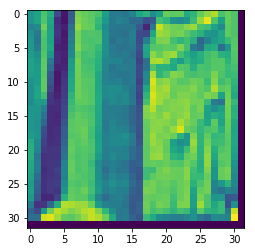

___


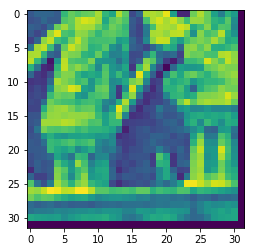

___


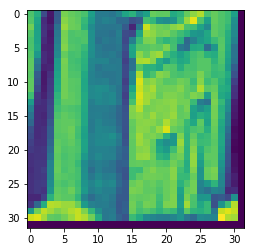

___


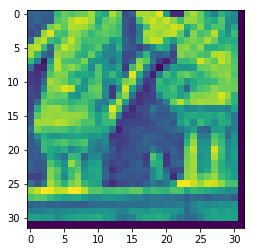

___


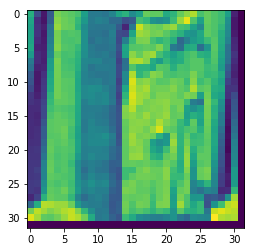

___


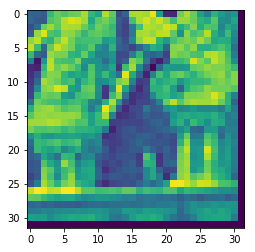

___


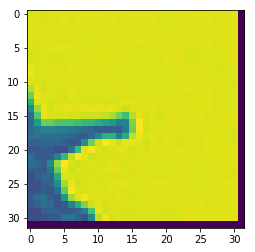

___


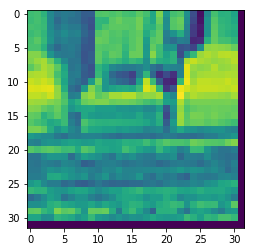

___


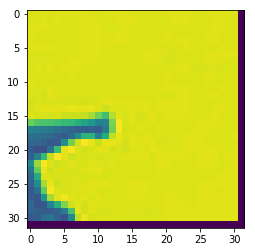

___


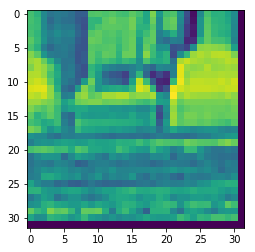

___


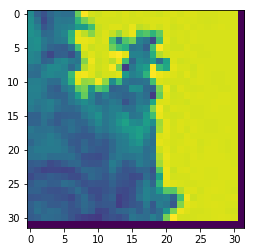

___


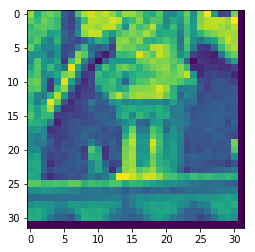

___


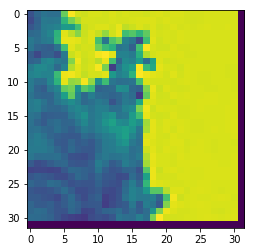

___


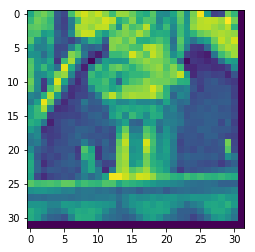

___


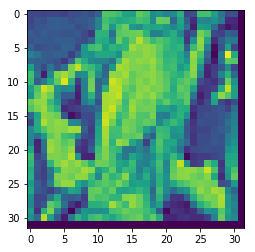

___


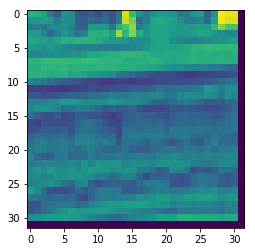

___


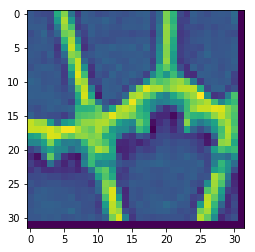

___


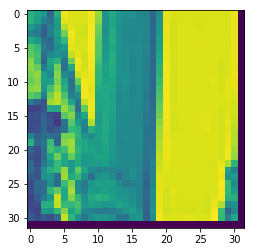

___


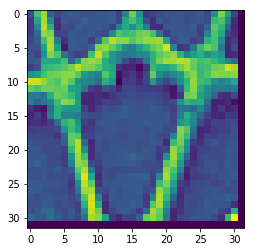

___


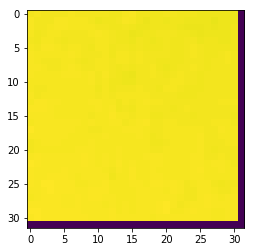

___


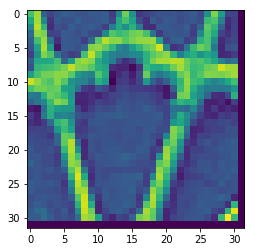

___


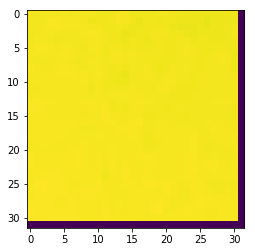

___


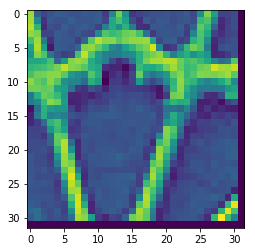

___


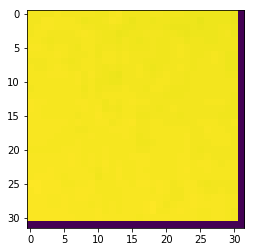

___


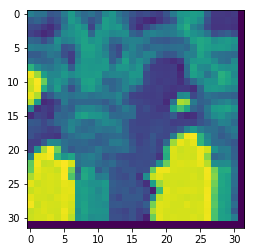

___
_________


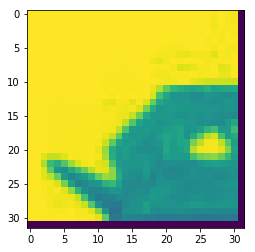

___


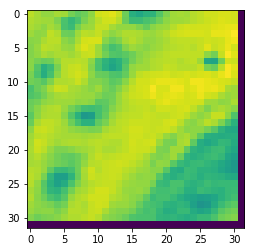

___


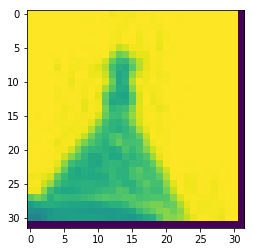

___


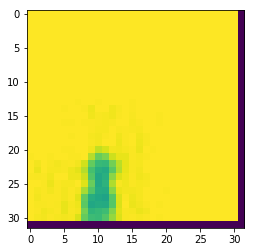

___


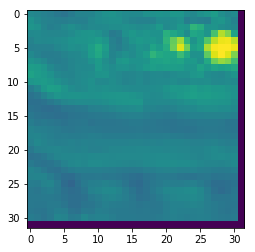

___


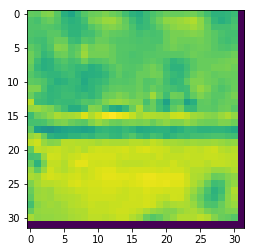

___


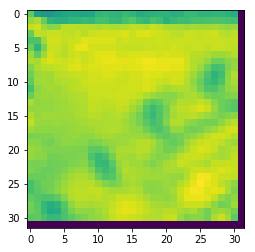

___


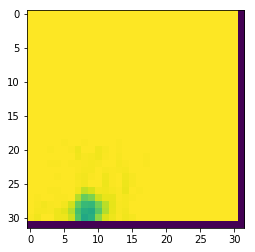

___


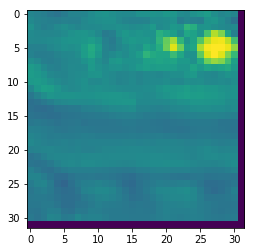

___


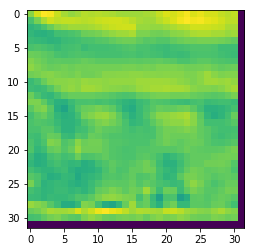

___


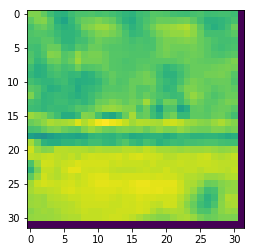

___


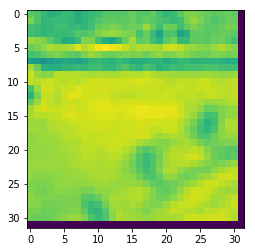

___


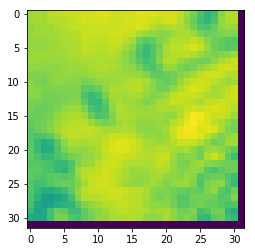

___


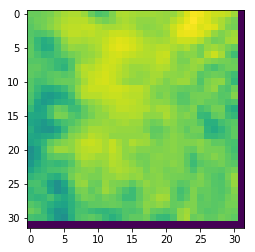

___


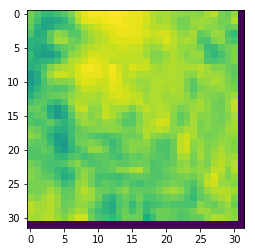

___


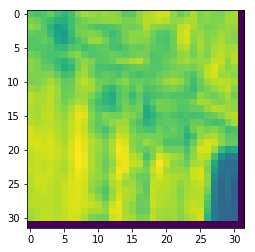

___


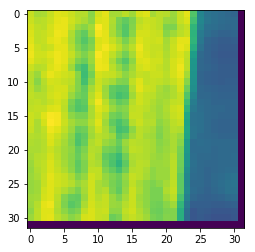

___


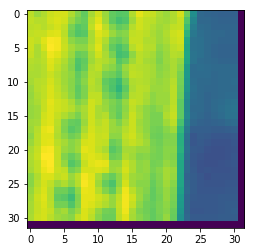

___


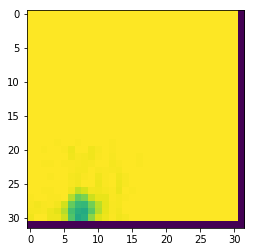

___


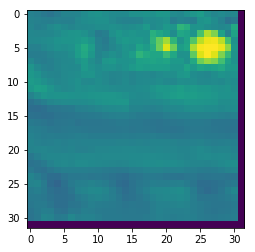

___


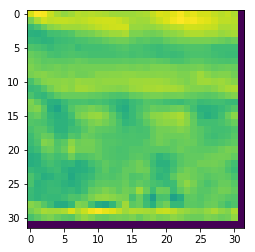

___


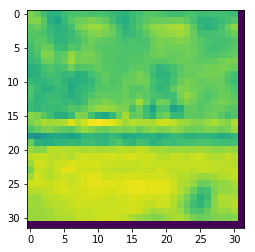

___


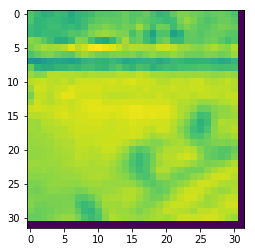

___


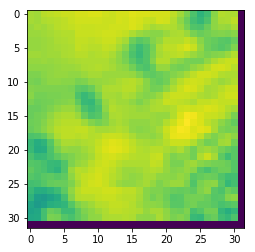

___


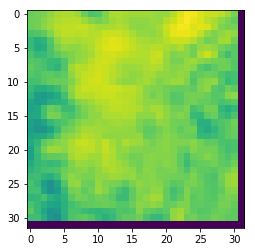

___


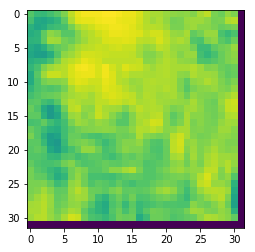

___


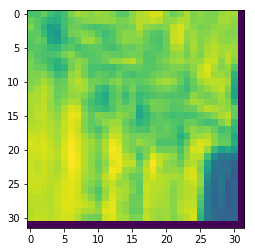

___


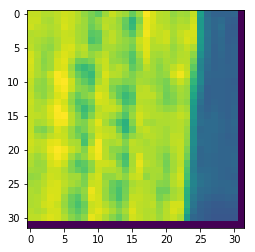

___


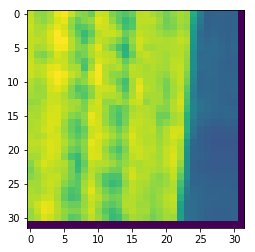

___


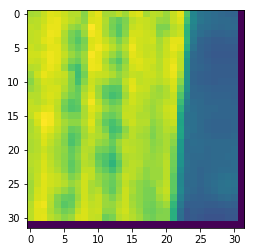

___


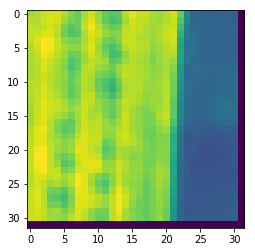

___


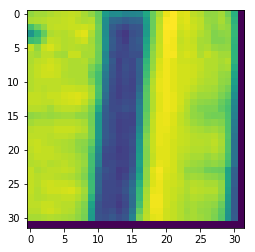

___


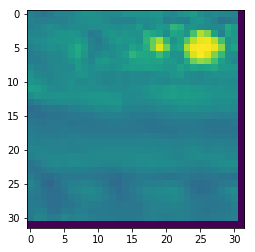

___


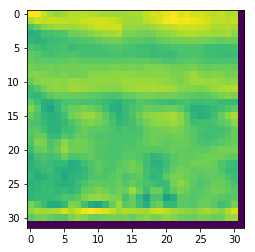

___


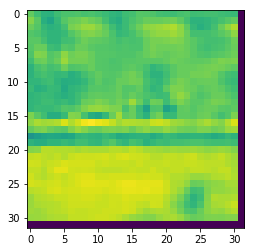

___


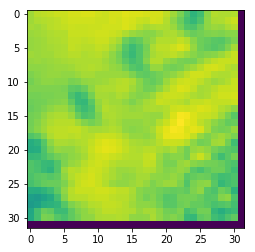

___


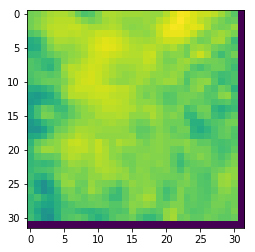

___


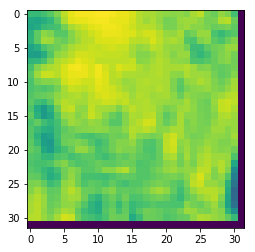

___


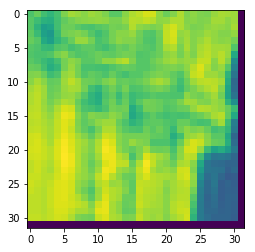

___


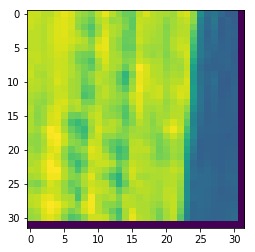

___


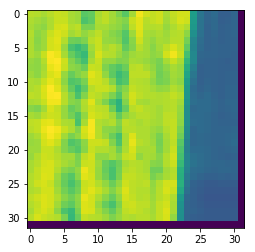

___


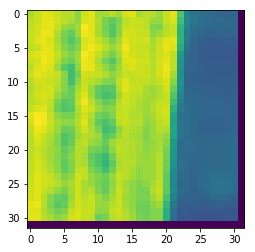

___


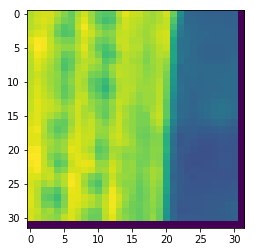

___


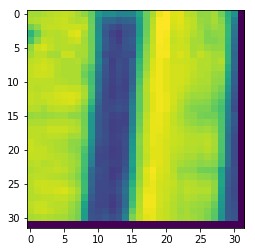

___


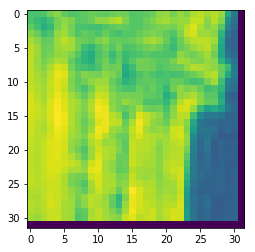

___


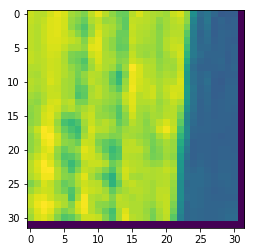

___


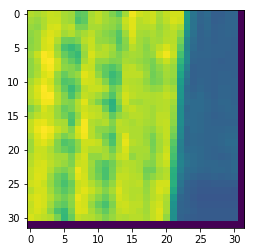

___


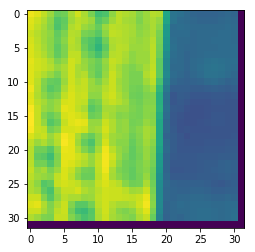

___


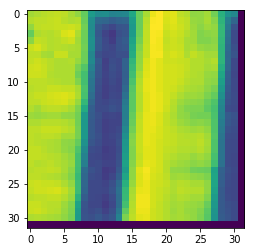

___


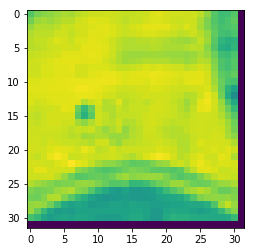

___


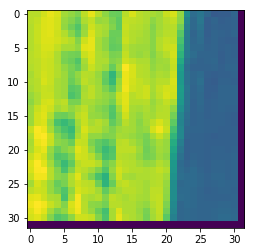

___


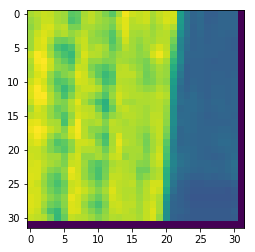

___


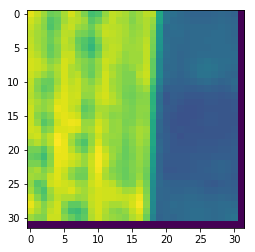

___


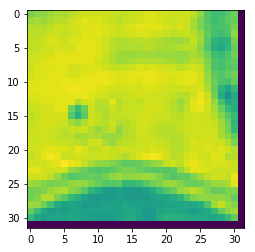

___


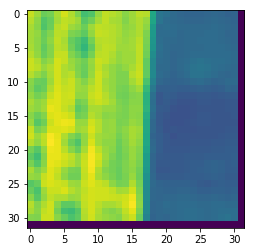

___


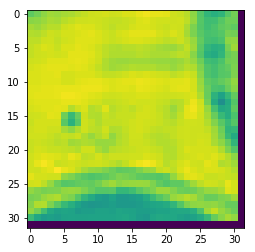

___


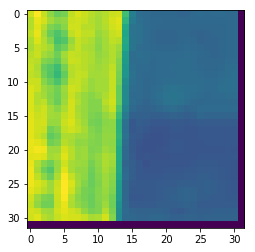

___


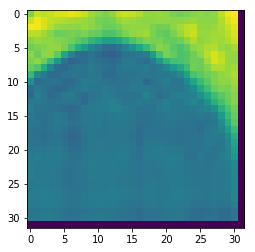

___


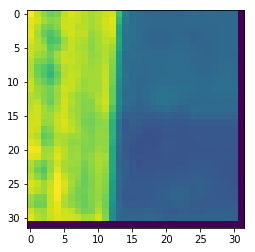

___


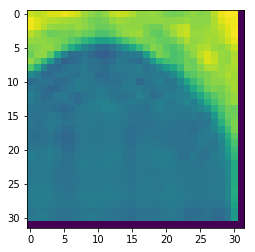

___


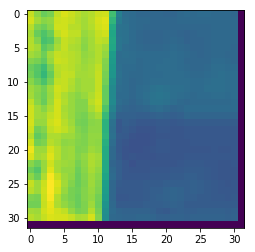

___


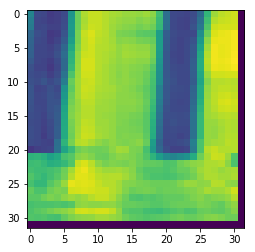

___


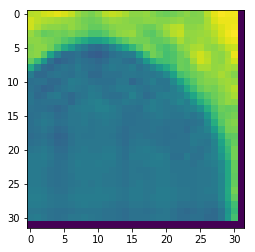

___


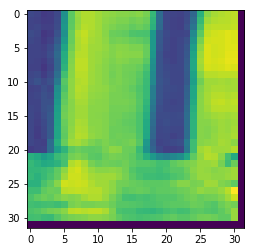

___


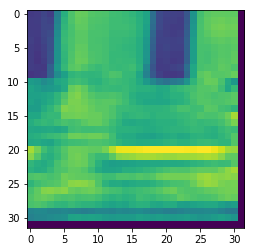

___


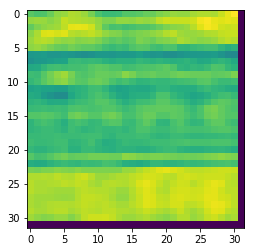

___


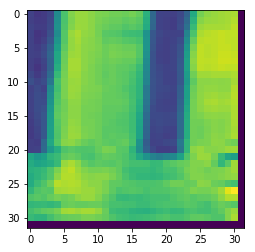

___


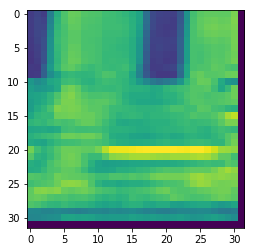

___


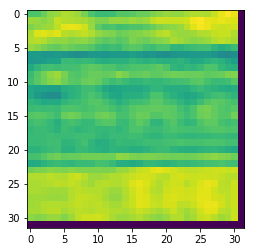

___


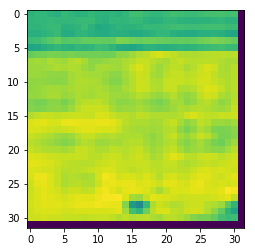

___


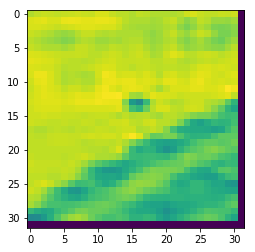

___


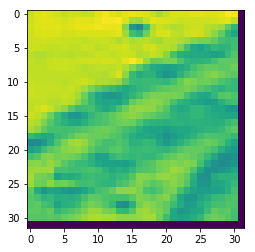

___


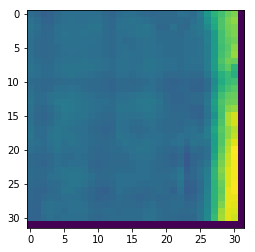

___


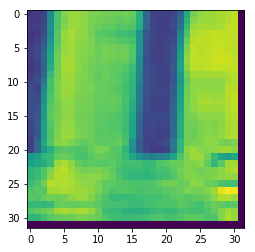

___


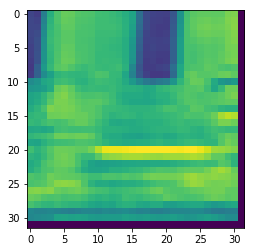

___


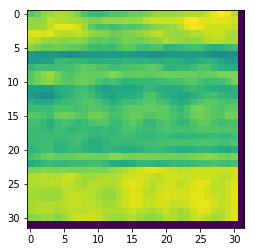

___


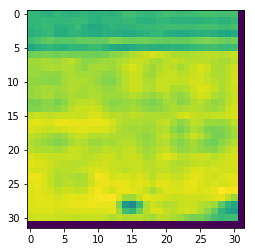

___


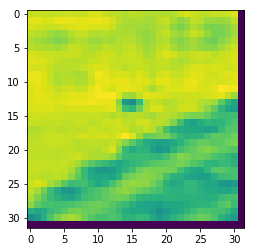

___


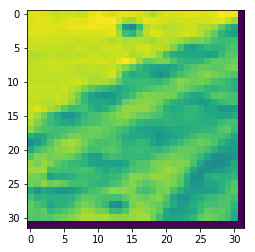

___


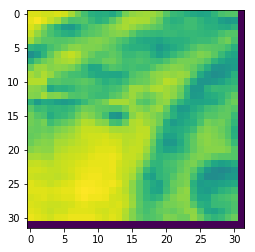

___


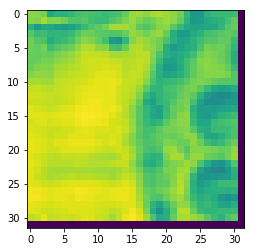

___


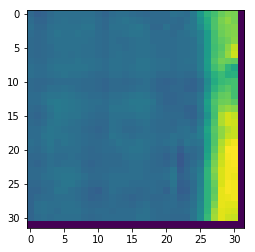

___


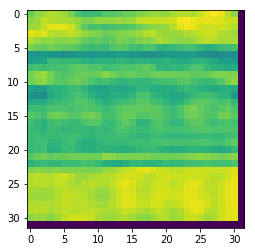

___


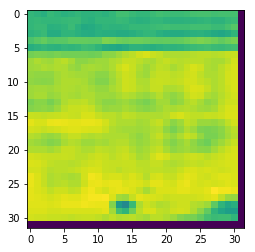

___


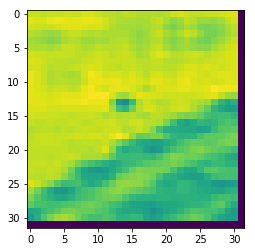

___


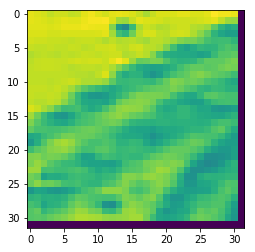

___


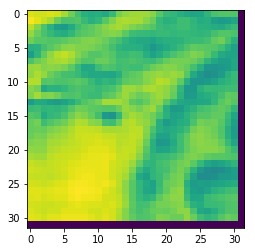

___


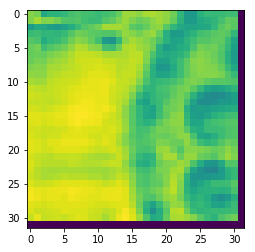

___


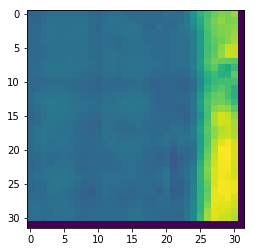

___


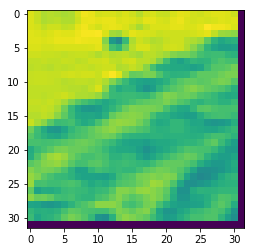

___


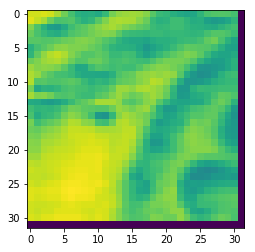

___


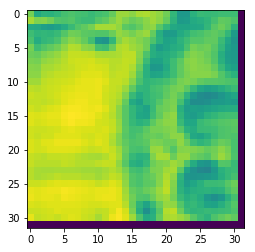

___


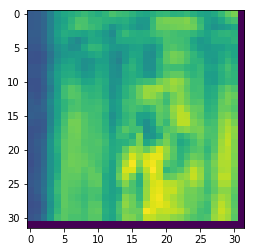

___


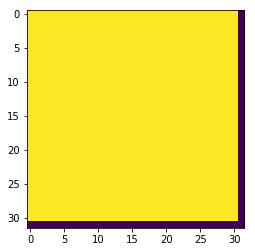

___


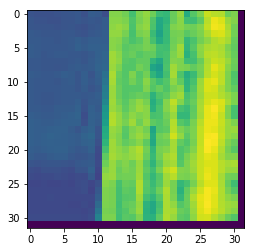

___


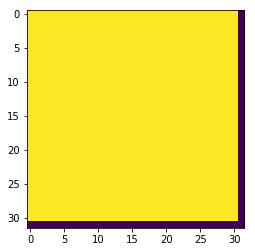

___


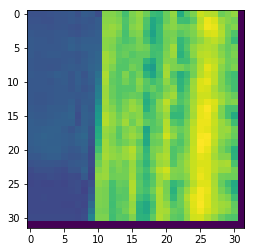

___


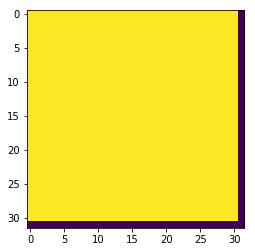

___


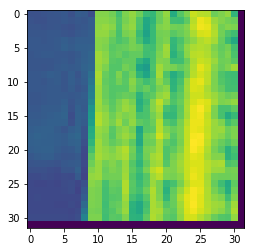

___


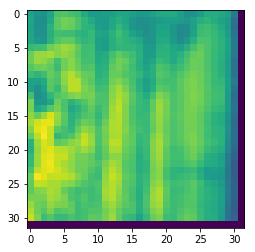

___


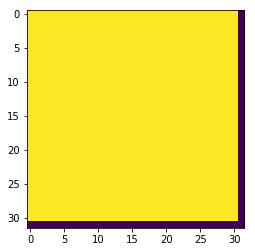

___


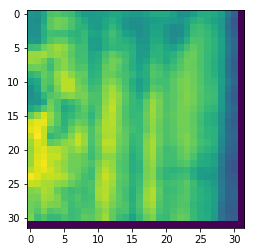

___


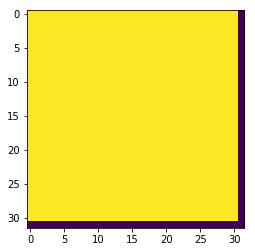

___


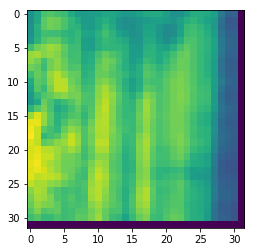

___


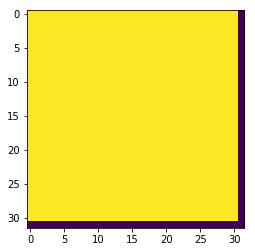

___


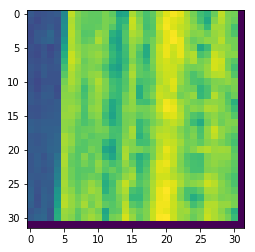

___


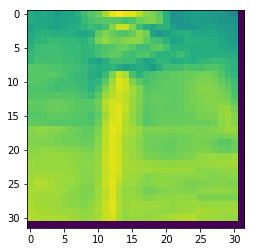

___


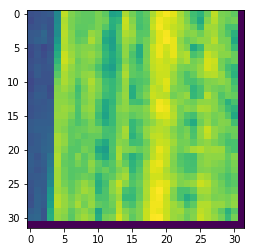

___


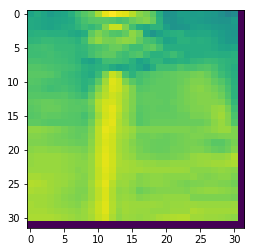

___


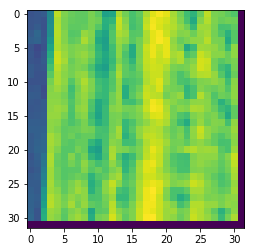

___


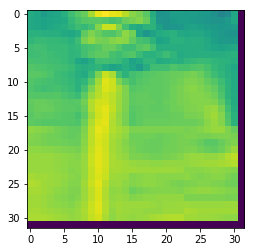

___


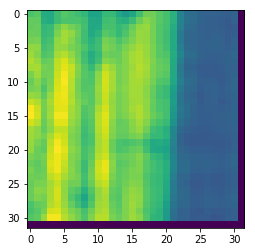

___


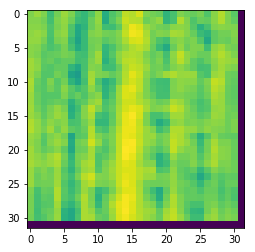

___


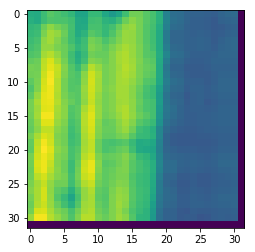

___


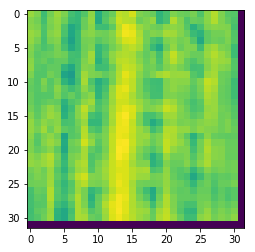

___


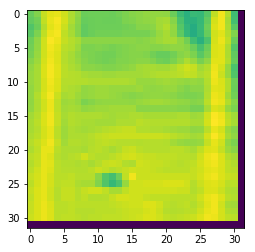

___


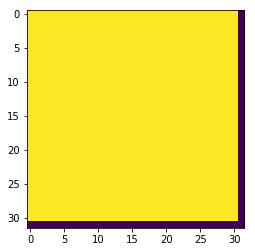

___


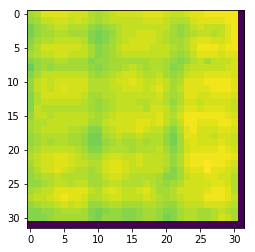

___


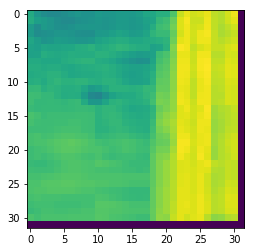

___


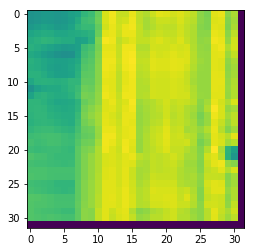

___


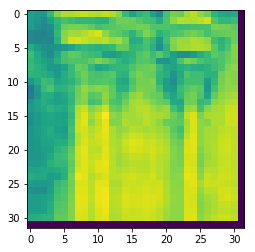

___


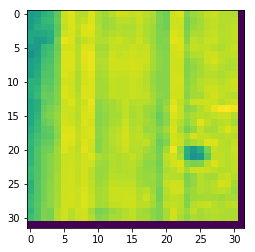

___


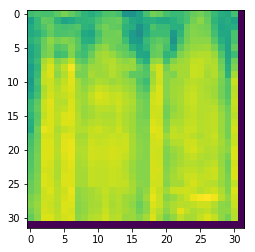

___


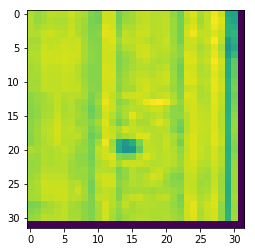

___


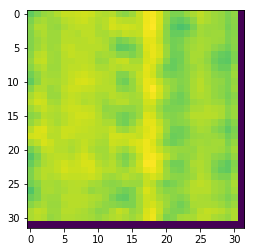

___


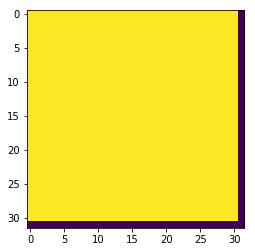

___


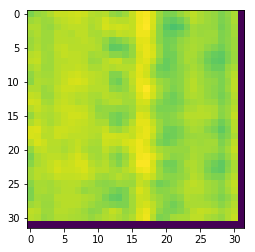

___


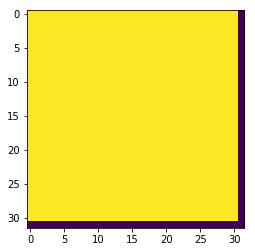

___


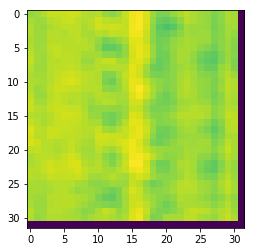

___


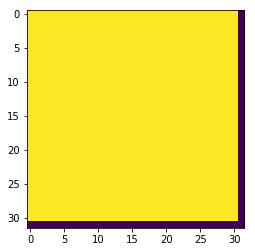

___


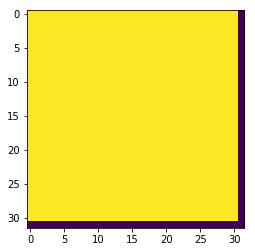

___


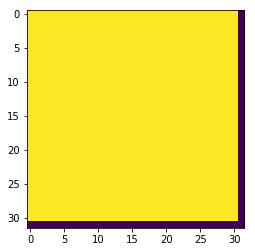

___


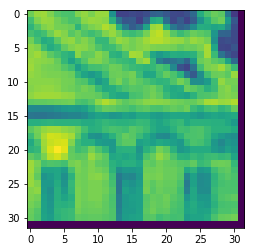

___


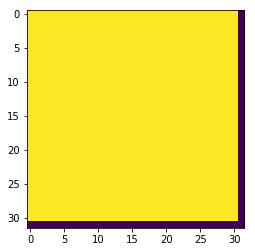

___


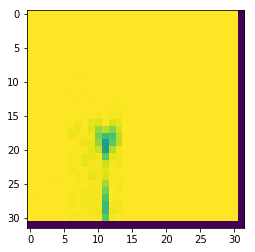

___


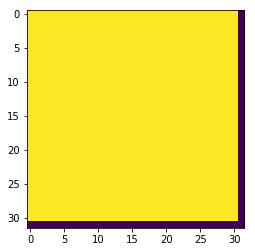

___


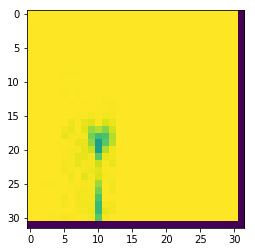

___


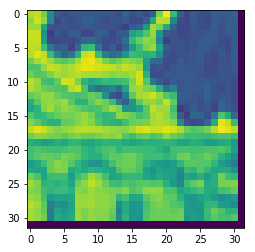

___


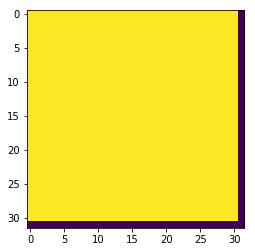

___


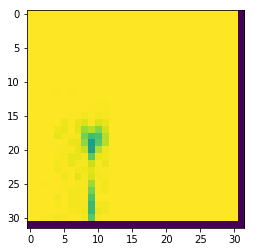

___


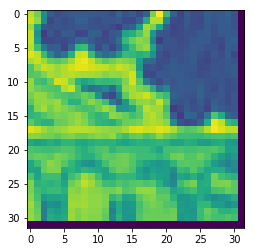

___


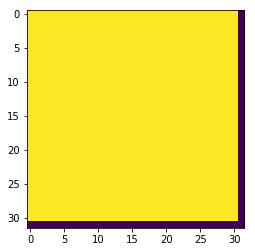

___


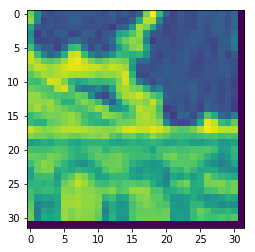

___


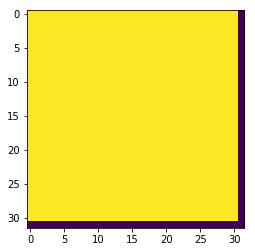

___


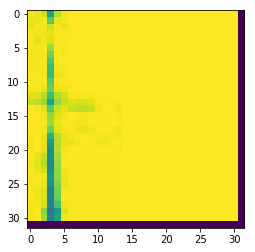

___


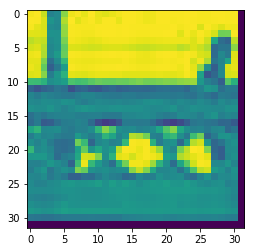

___


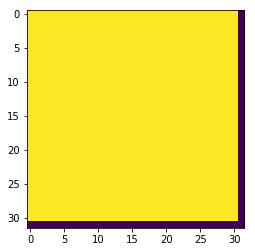

___


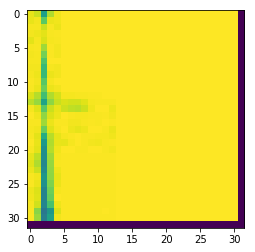

___


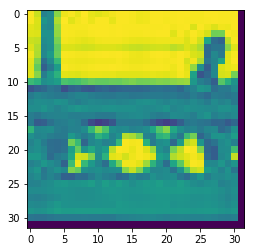

___


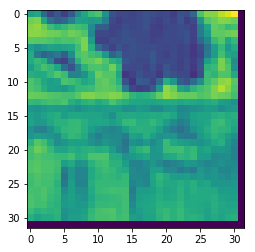

___


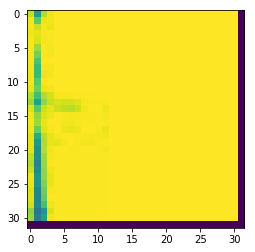

___


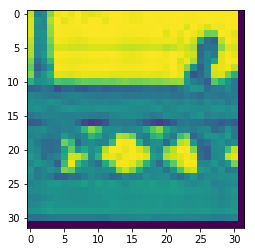

___


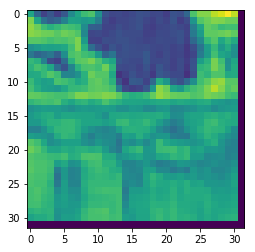

___


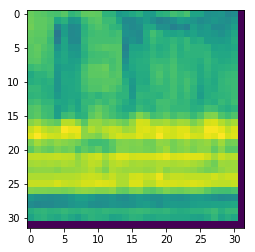

___


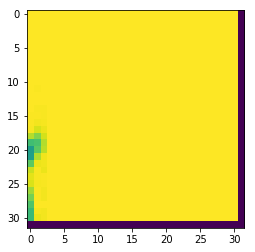

___


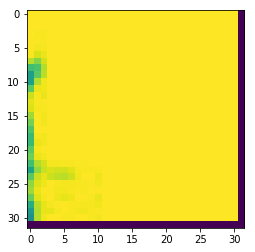

___


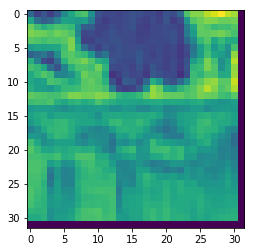

___


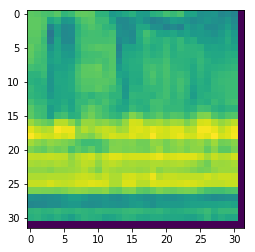

___


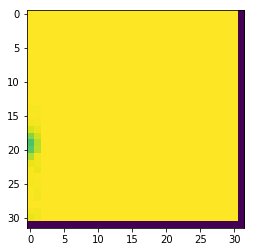

___


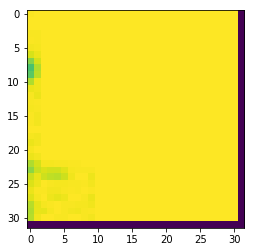

___


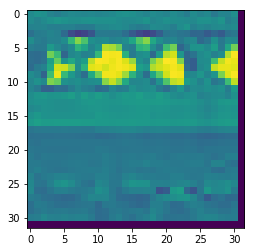

___


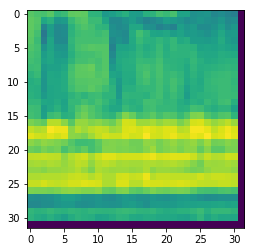

___


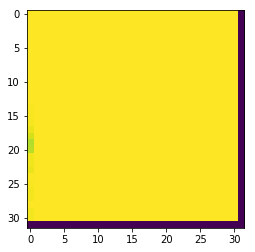

___


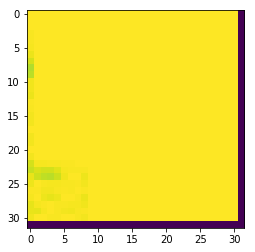

___


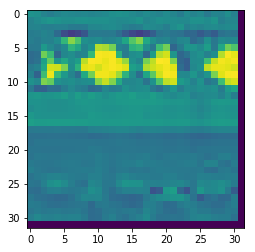

___


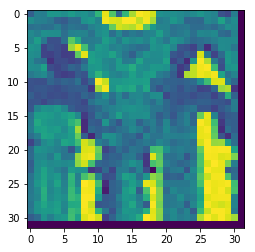

___


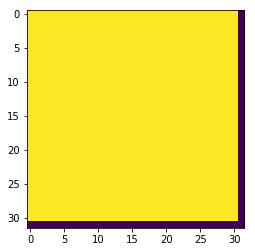

___


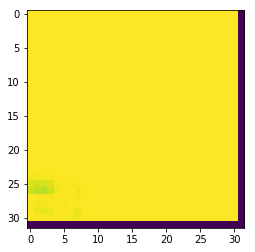

___


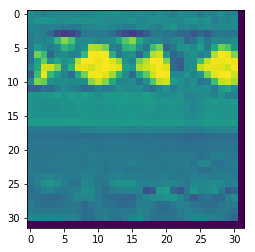

___


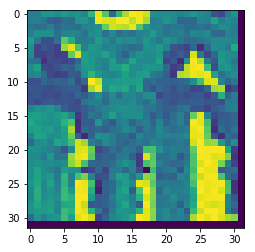

___


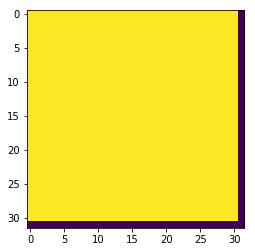

___


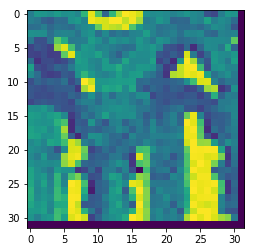

___


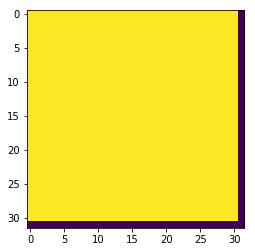

___


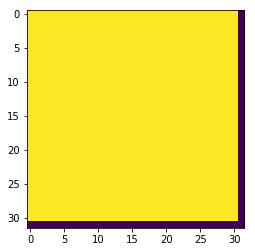

___


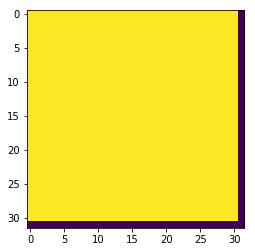

___


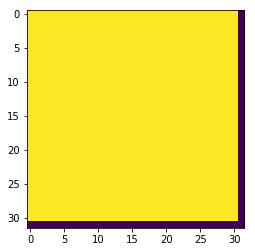

___


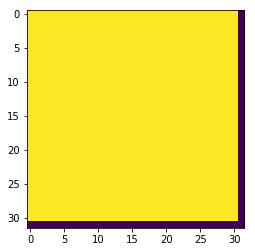

___


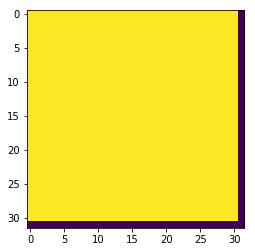

___


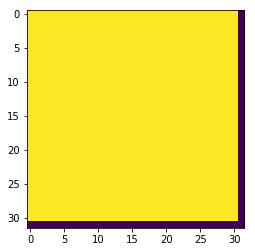

___


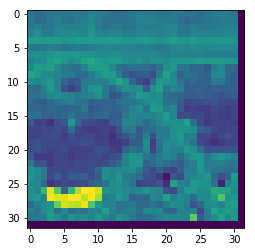

___


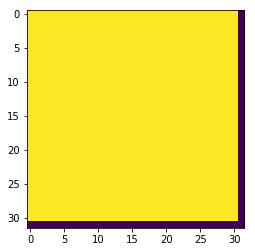

___


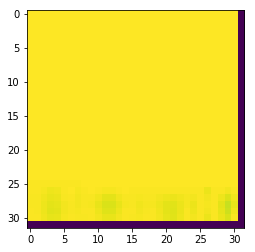

___


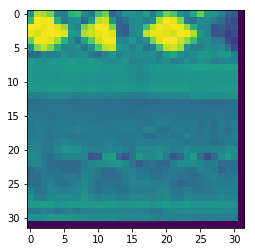

___


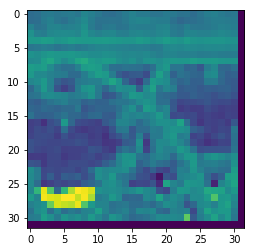

___


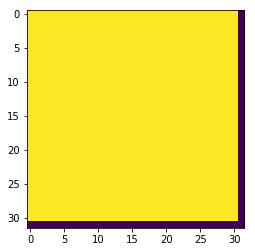

___


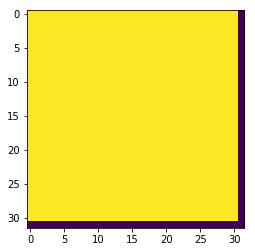

___


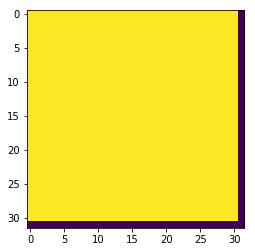

___


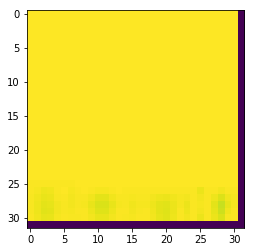

___


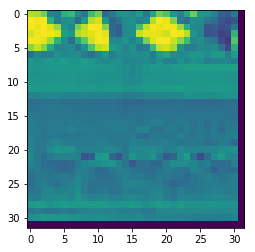

___


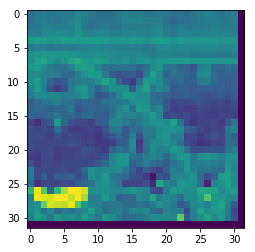

___


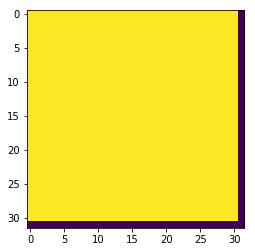

___


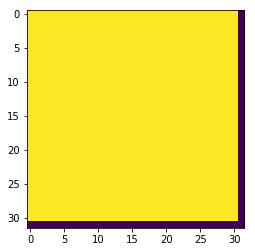

___


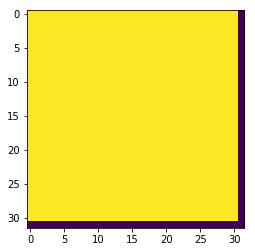

___


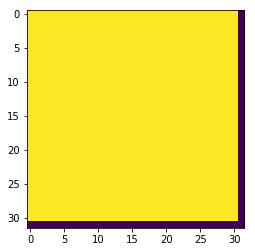

___


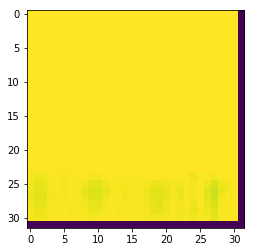

___


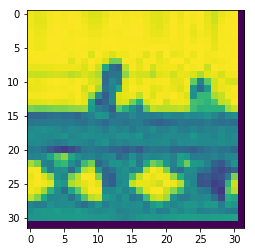

___


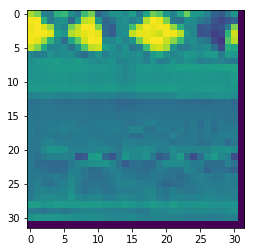

___


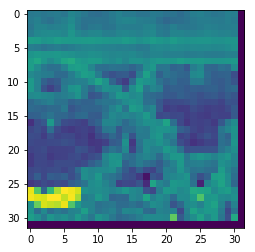

___


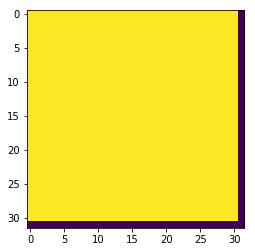

___


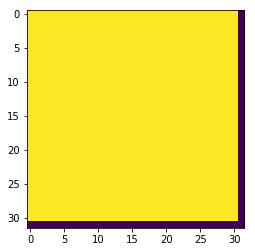

___
_________


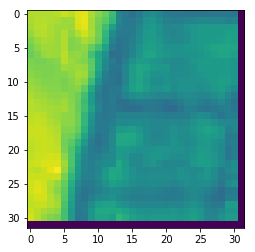

___


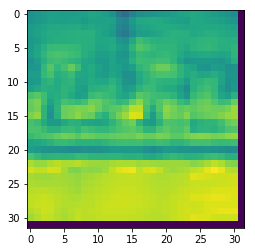

___


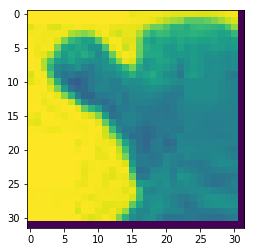

___


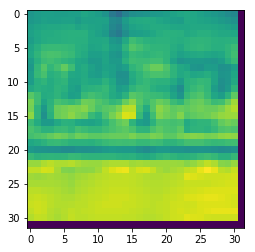

___


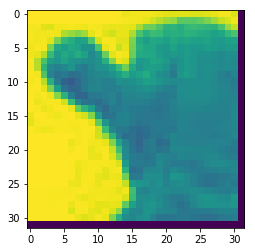

___


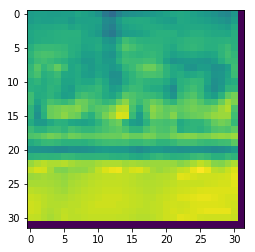

___


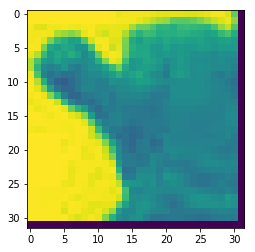

___


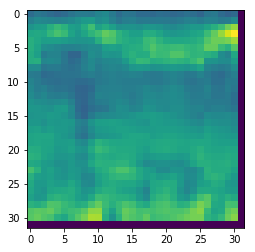

___


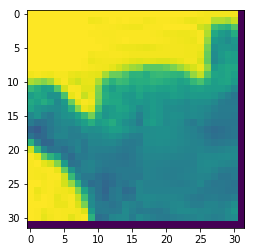

___


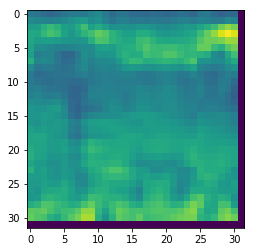

___


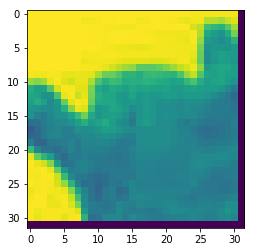

___


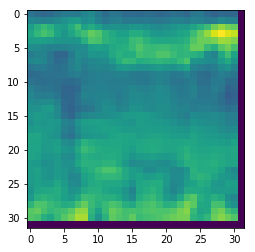

___


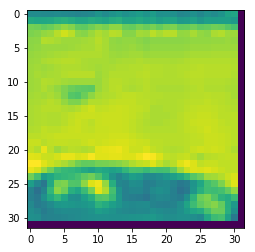

___


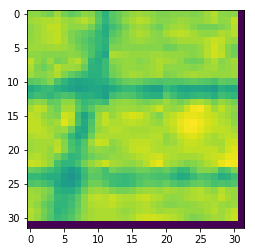

___


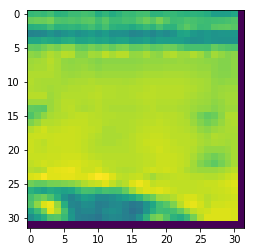

___


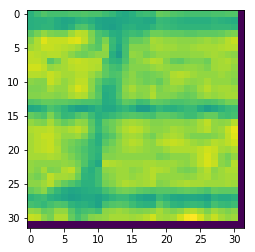

___


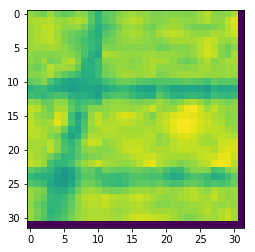

___


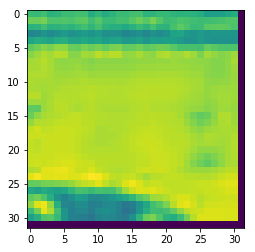

___


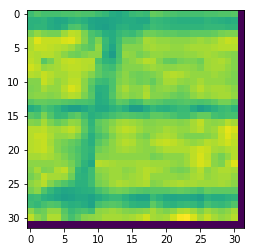

___


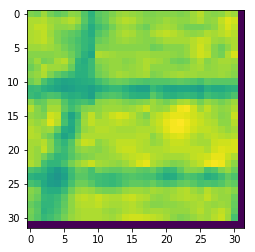

___


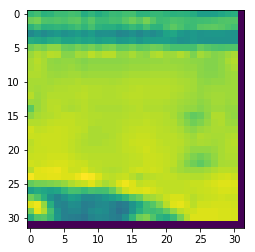

___


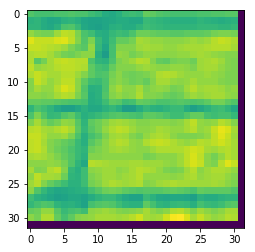

___


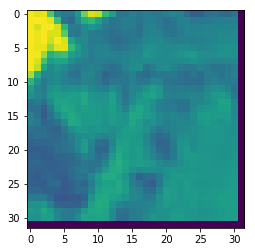

___


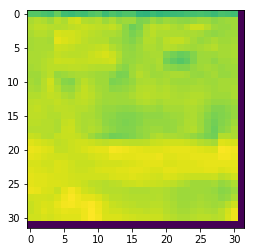

___


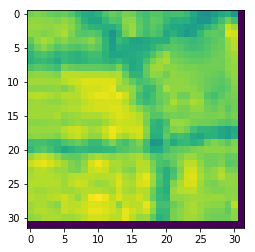

___


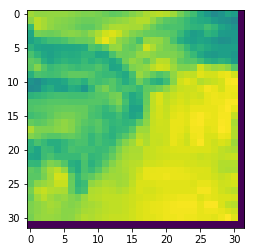

___


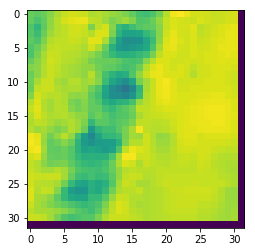

___


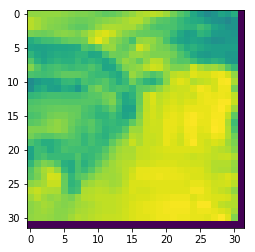

___


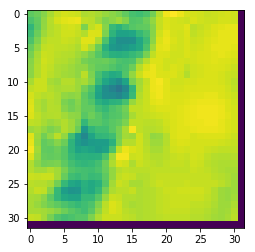

___


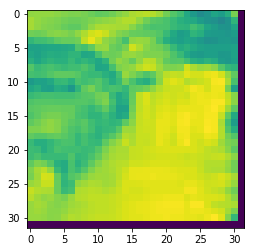

___


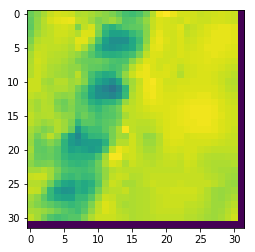

___


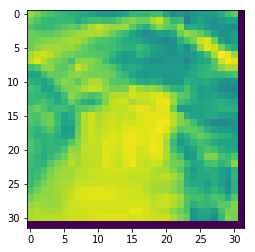

___


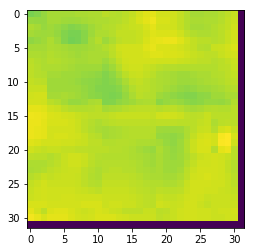

___


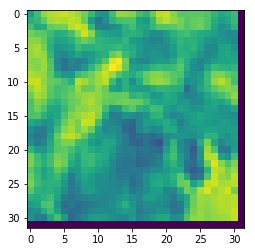

___


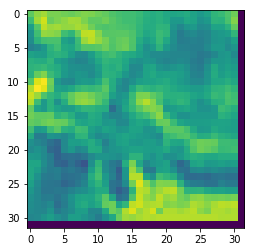

___


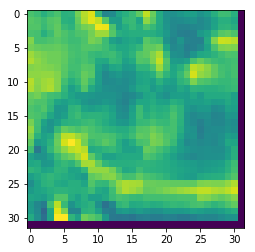

___


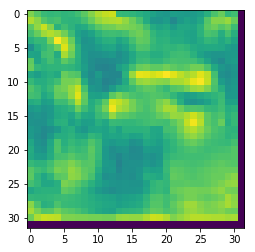

___


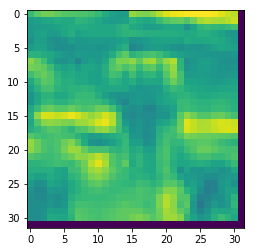

___


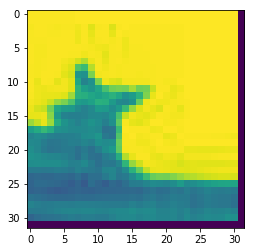

___


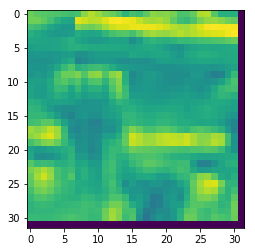

___


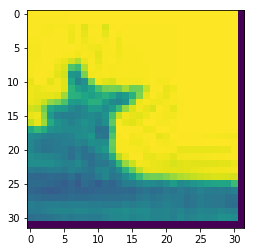

___


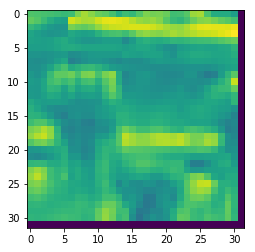

___


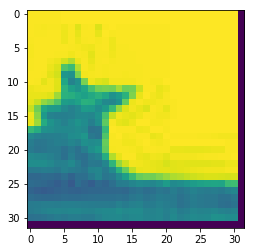

___


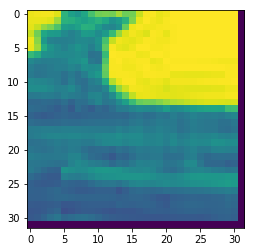

___


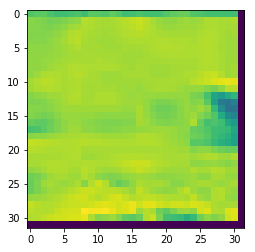

___


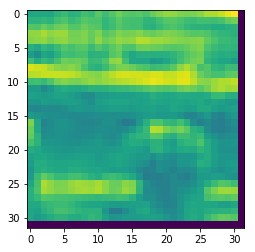

___


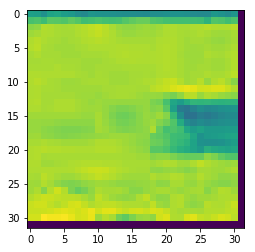

___


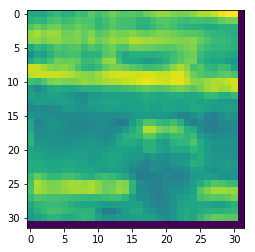

___


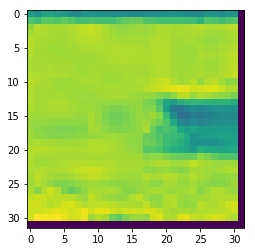

___


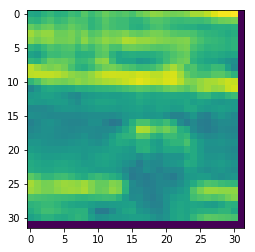

___


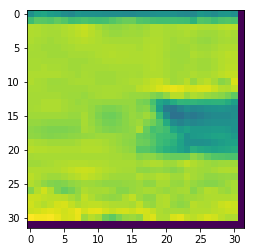

___


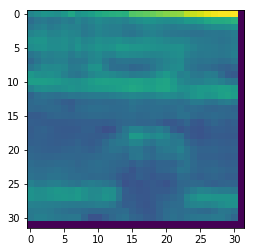

___


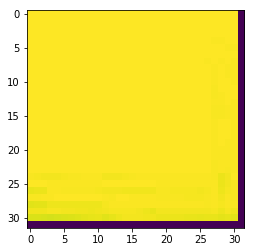

___


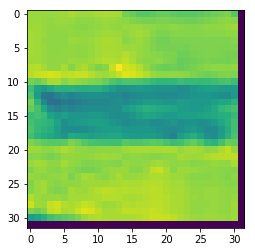

___


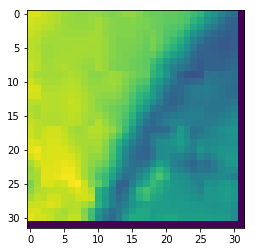

___


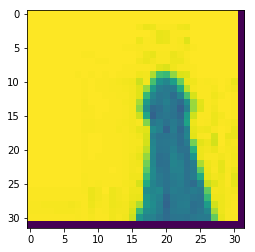

___


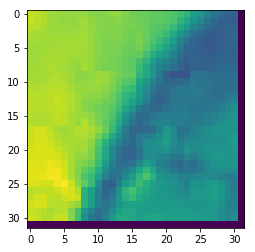

___


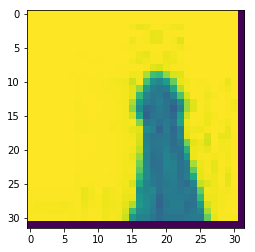

___


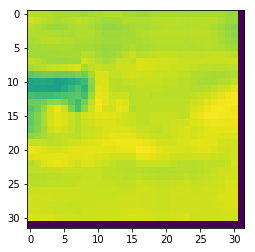

___


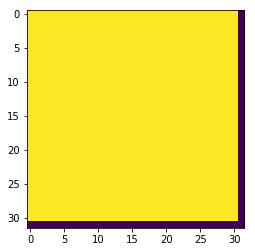

___


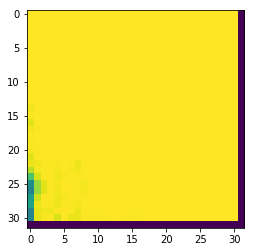

___


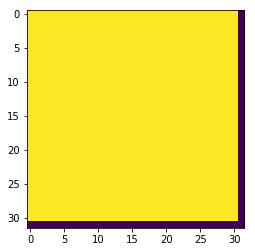

___


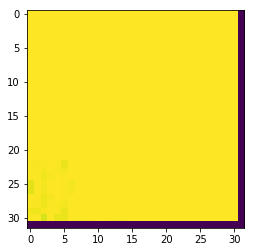

___


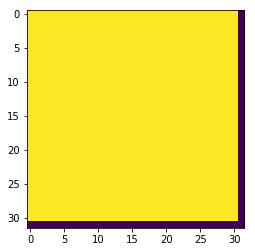

___


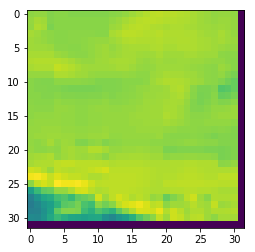

___


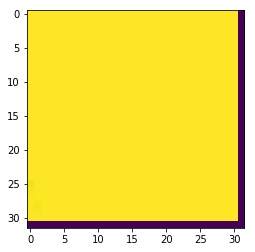

___


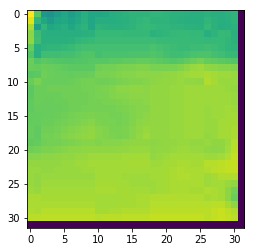

___


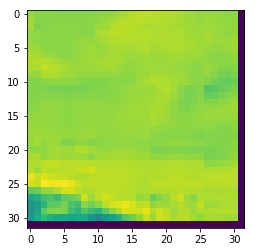

___


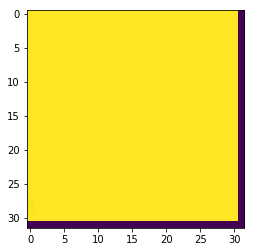

___


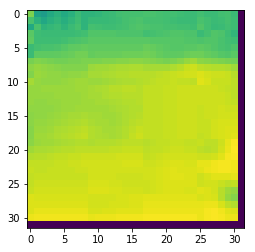

___


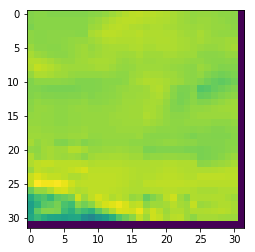

___


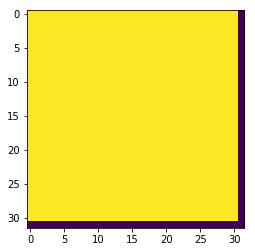

___


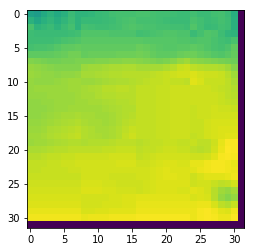

___


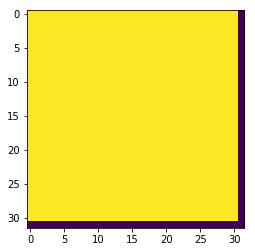

___


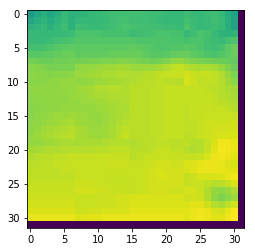

___


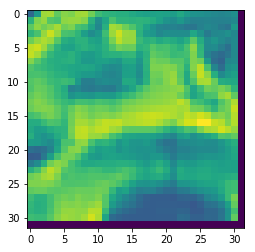

___


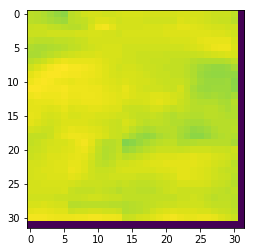

___


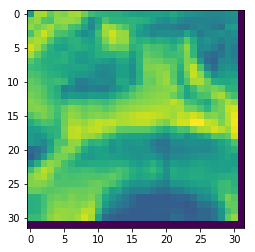

___


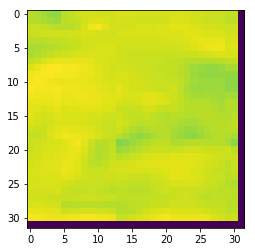

___


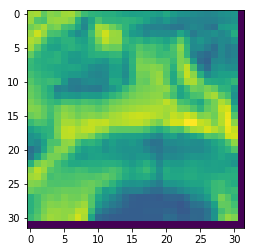

___


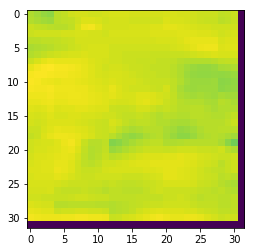

___


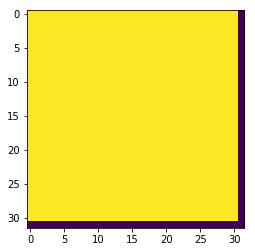

___


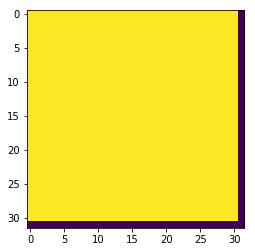

___


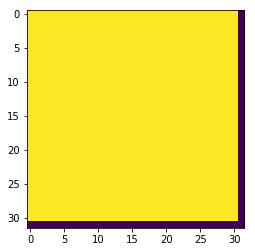

___


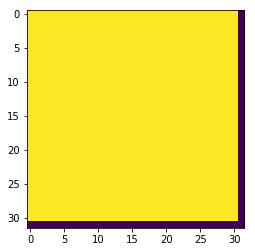

___


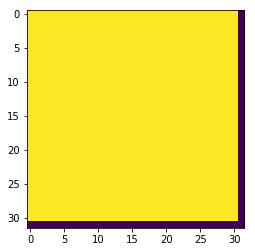

___


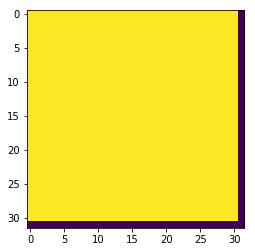

___


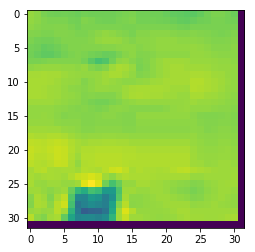

___


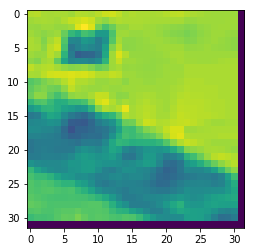

___


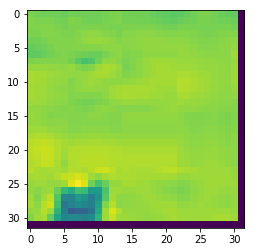

___


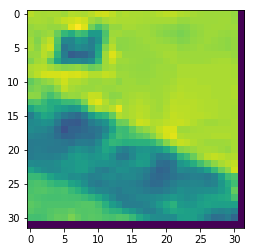

___


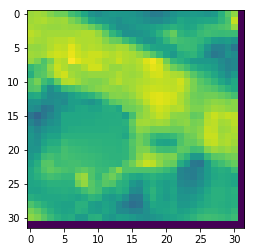

___


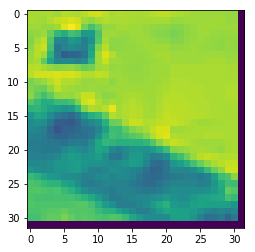

___


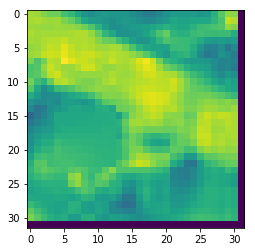

___


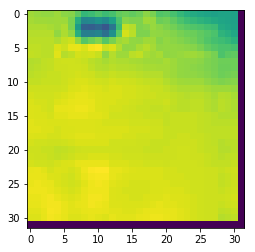

___


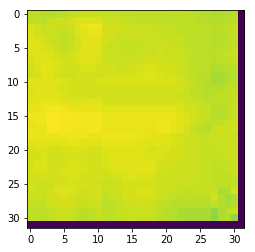

___


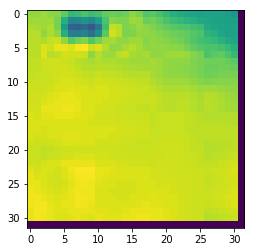

___


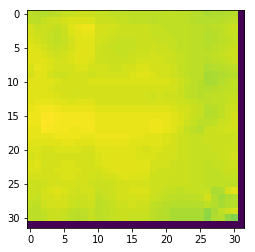

___


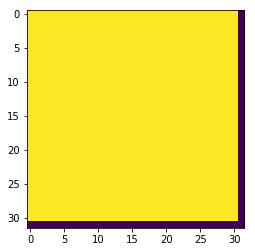

___


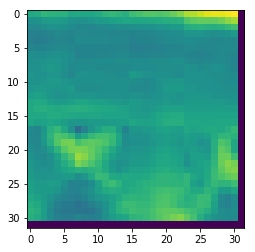

___


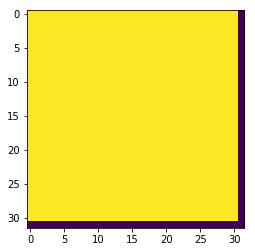

___


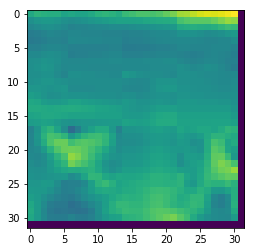

___


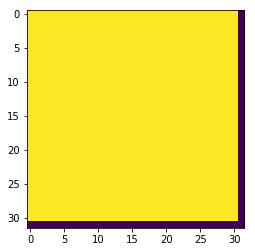

___


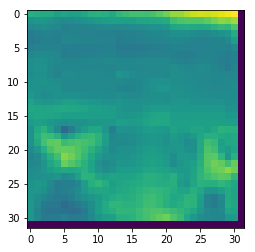

___


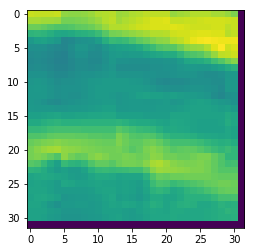

___


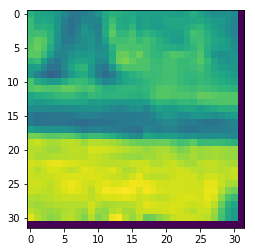

___


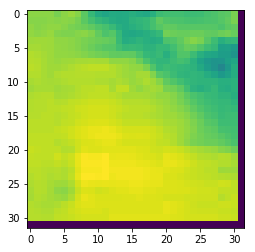

___


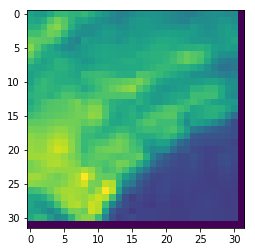

___


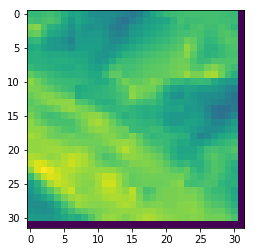

___


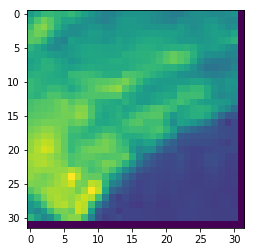

___


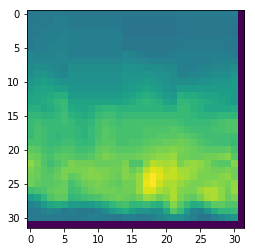

___


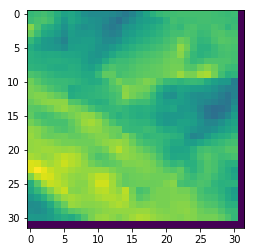

___


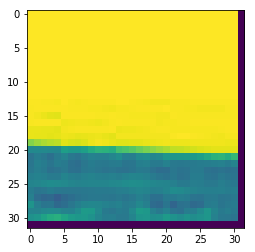

___


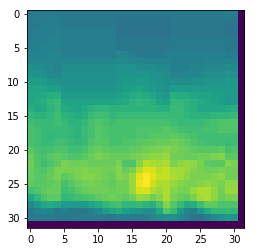

___


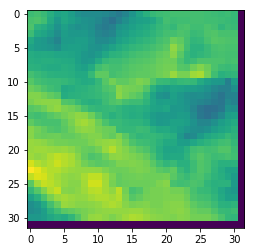

___


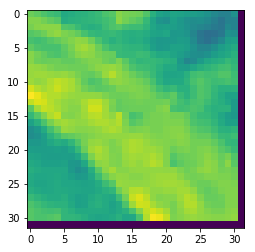

___


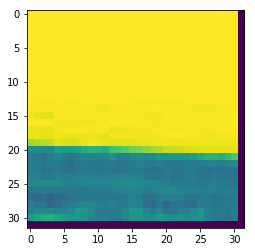

___


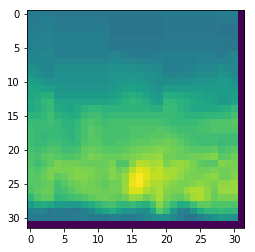

___


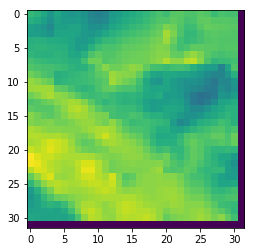

___


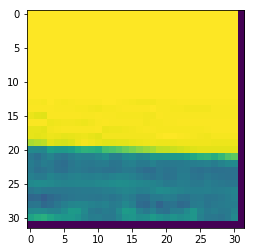

___


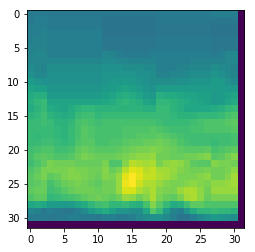

___


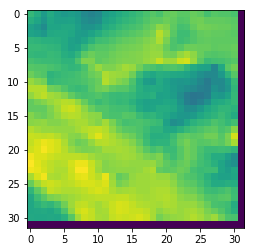

___


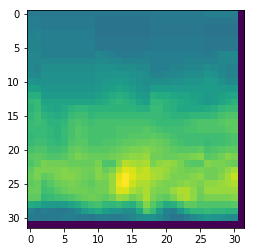

___


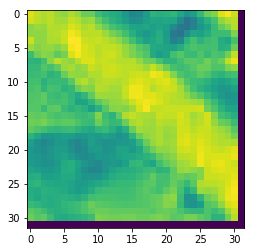

___


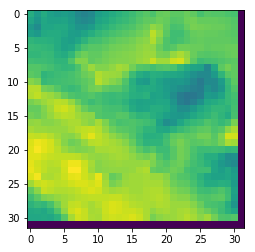

___


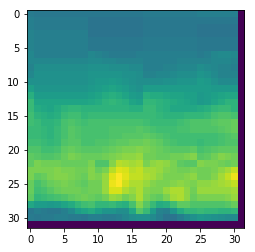

___


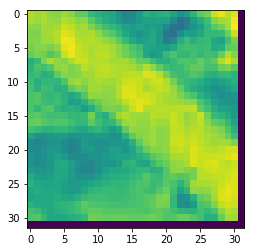

___


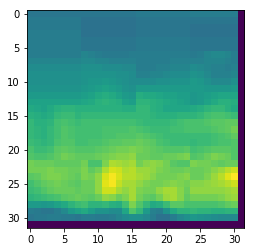

___


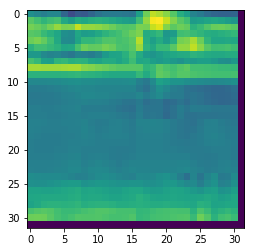

___


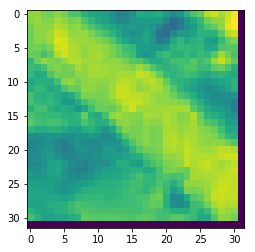

___


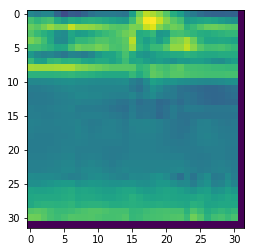

___


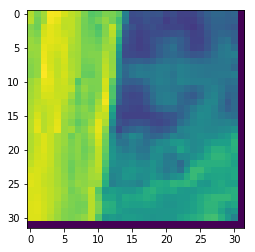

___


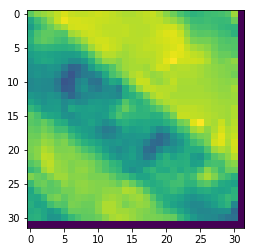

___


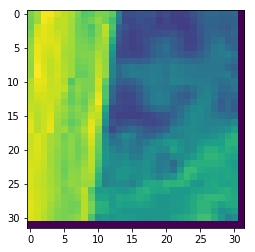

___


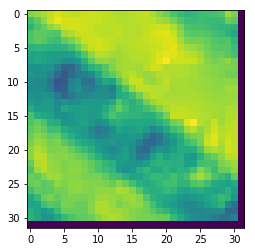

___


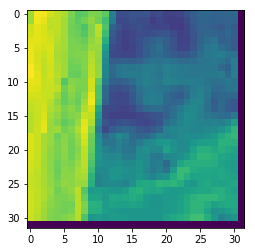

___


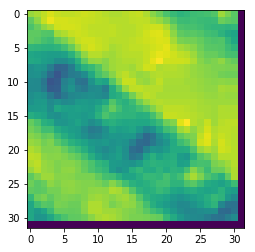

___


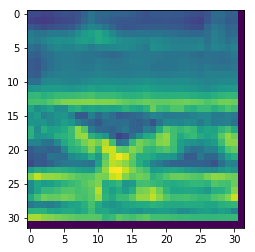

___


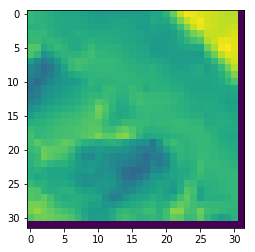

___


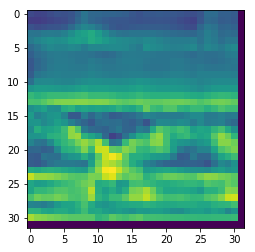

___


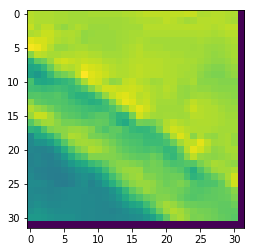

___


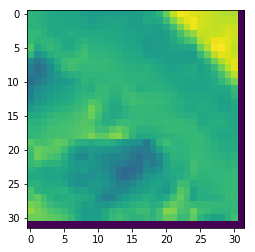

___


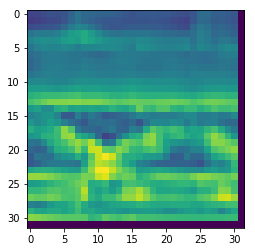

___


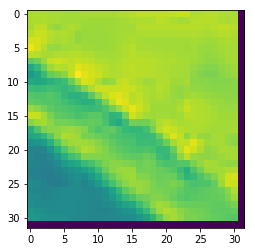

___


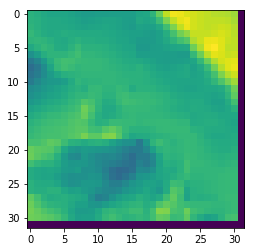

___


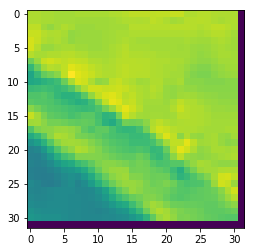

___


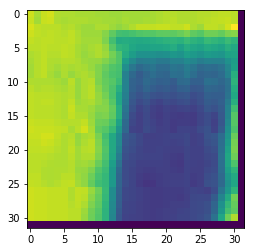

___


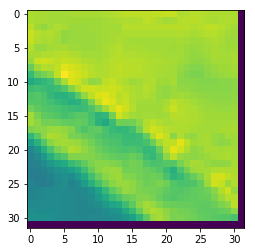

___


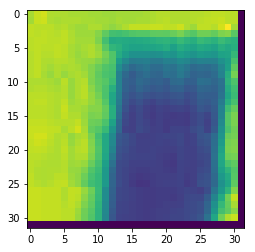

___


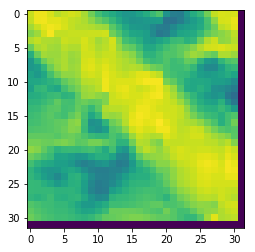

___


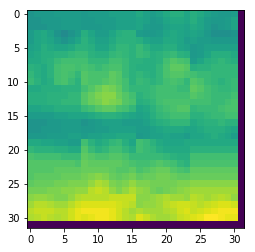

___


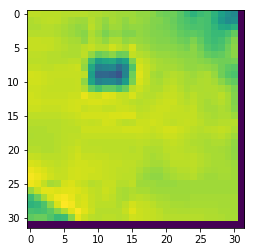

___


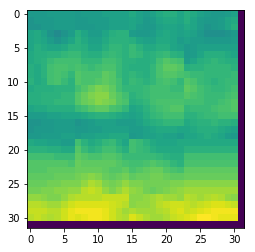

___


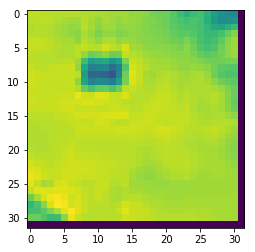

___


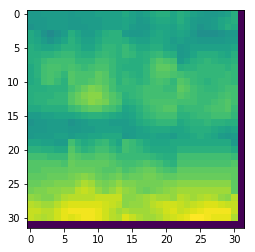

___


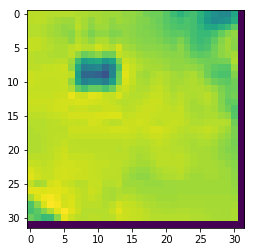

___


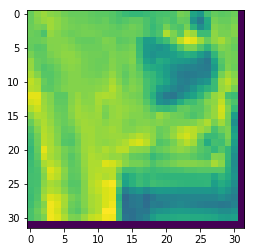

___


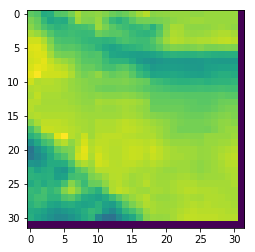

___


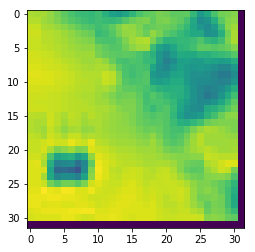

___


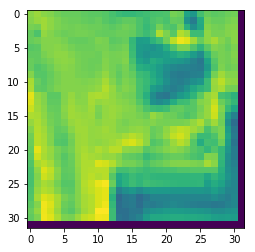

___


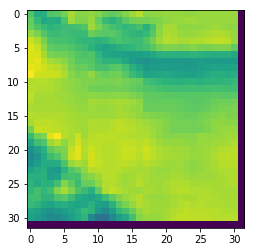

___


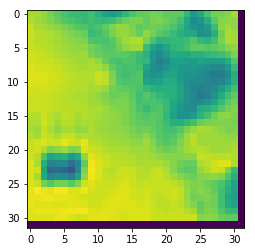

___


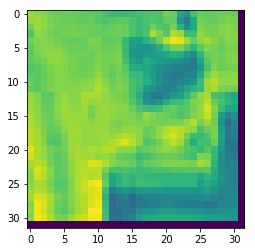

___


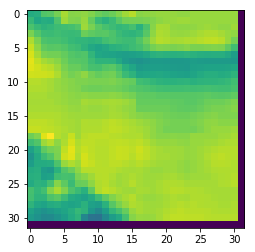

___


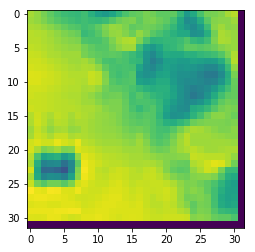

___


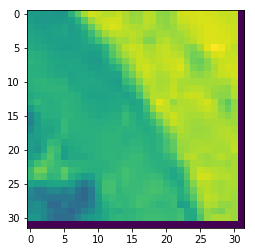

___


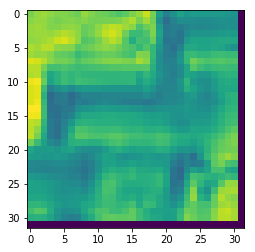

___


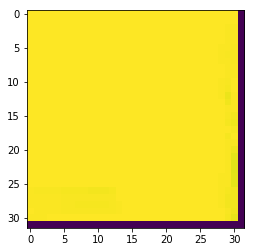

___


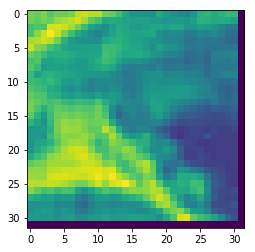

___


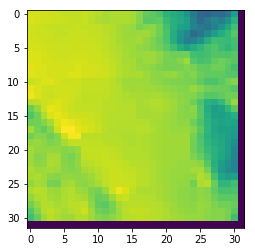

___


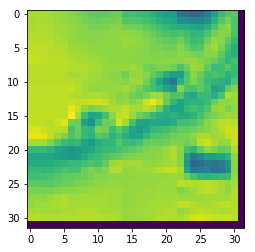

___


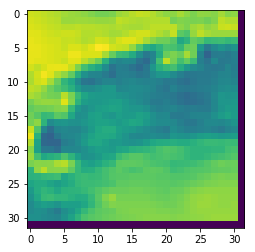

___


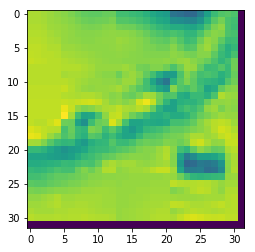

___


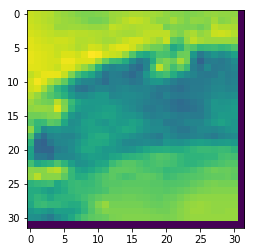

___


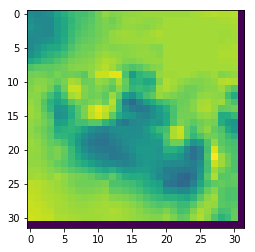

___


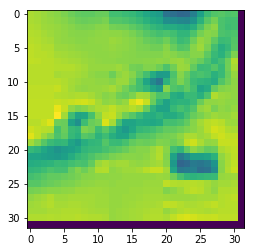

___


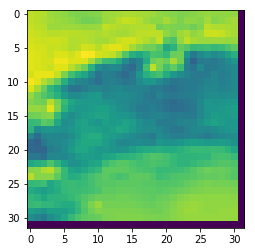

___


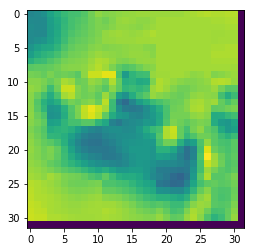

___


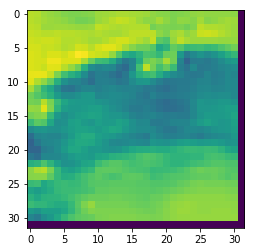

___


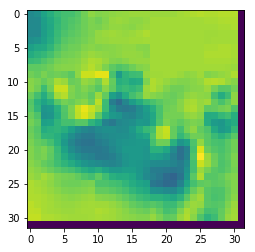

___


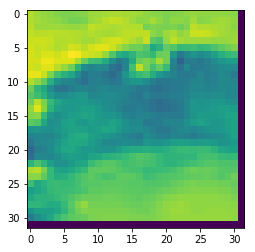

___


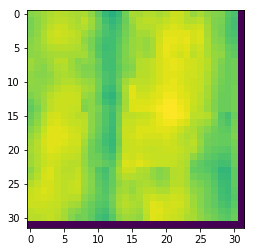

___


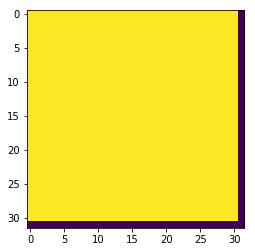

___


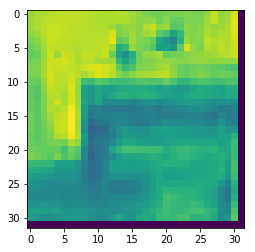

___


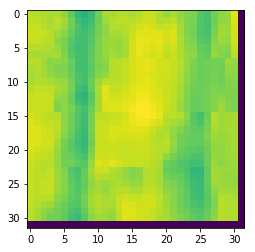

___


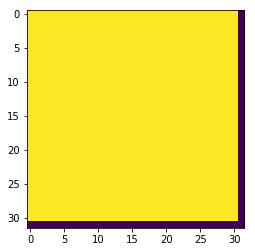

___


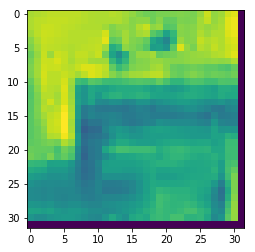

___


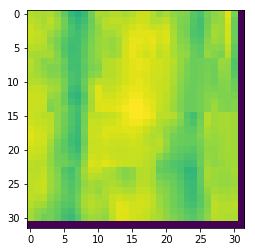

___


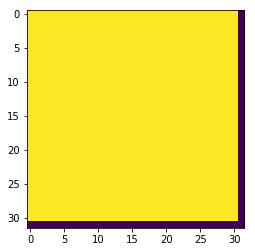

___


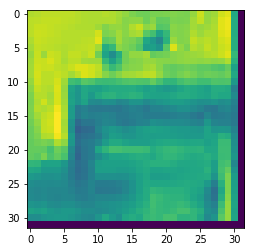

___


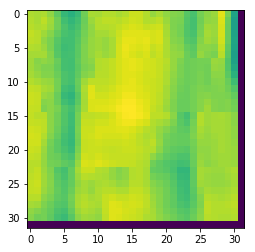

___


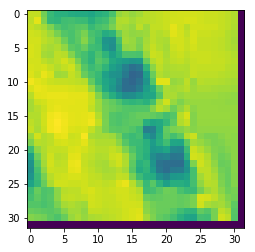

___


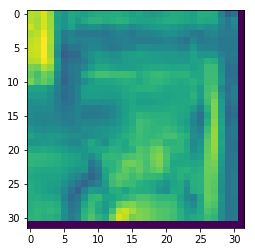

___


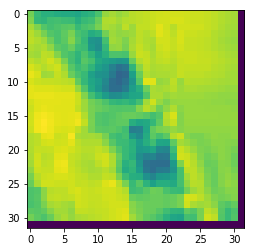

___


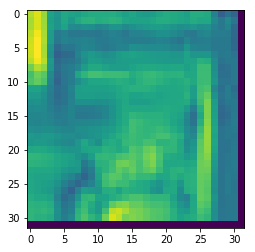

___


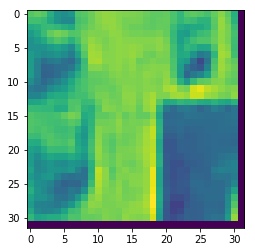

___


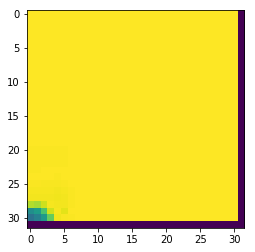

___


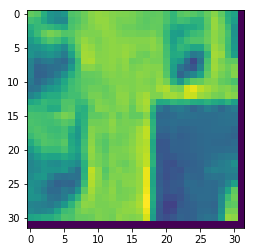

___


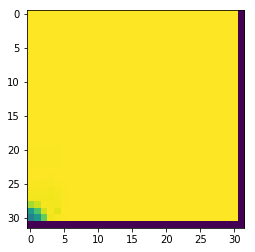

___


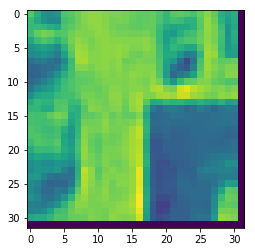

___
_________


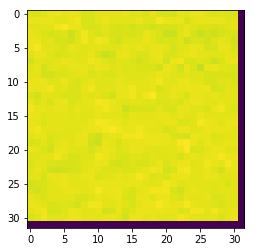

___


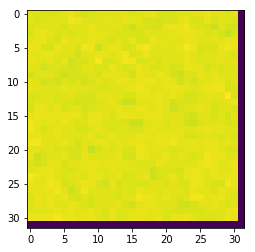

___


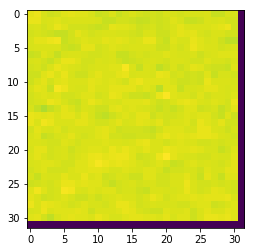

___


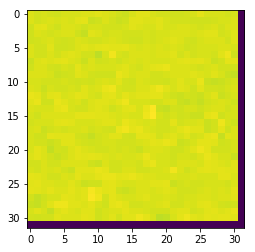

___


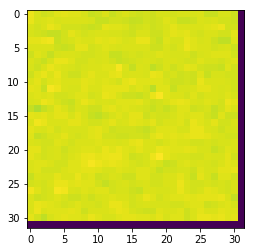

___


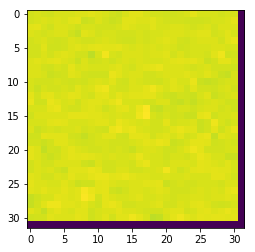

___


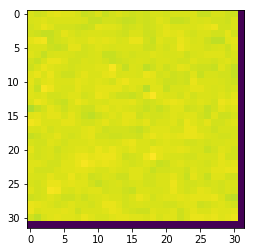

___


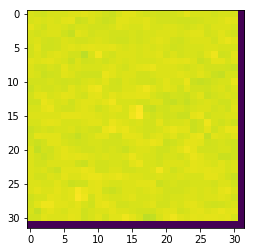

___


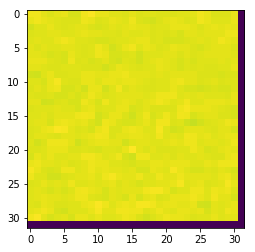

___


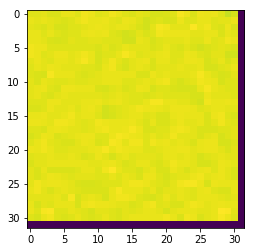

___


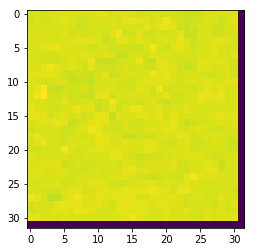

___


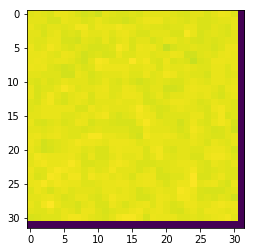

___


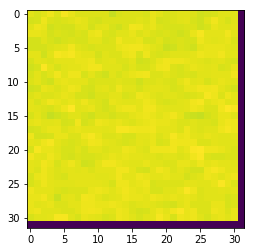

___


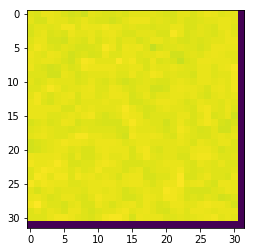

___


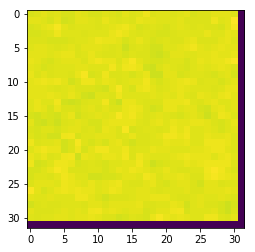

___


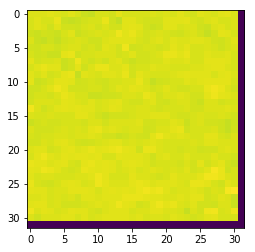

___


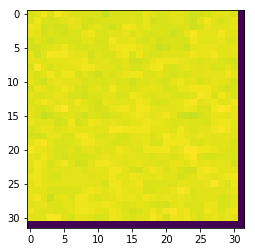

___


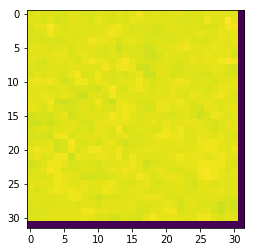

___


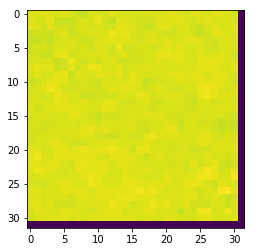

___


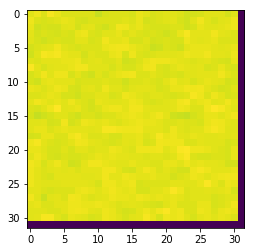

___


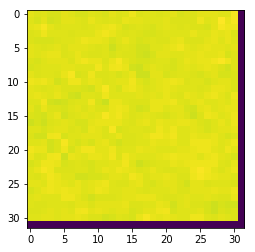

___


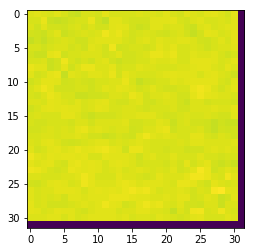

___


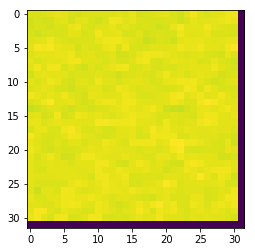

___


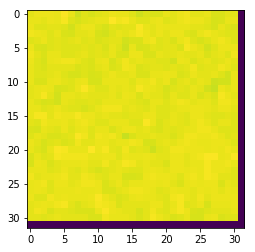

___


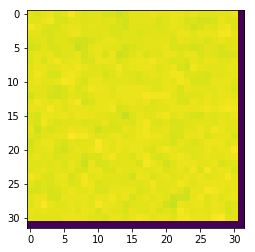

___


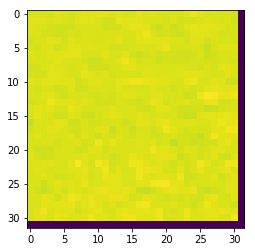

___


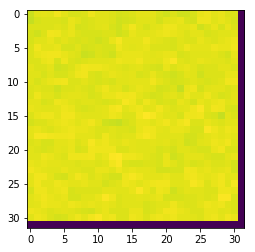

___


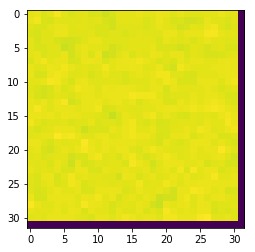

___


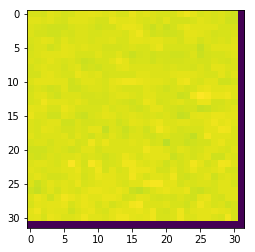

___


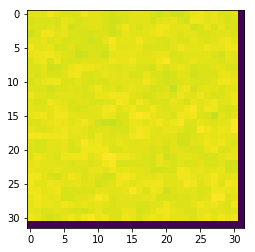

___


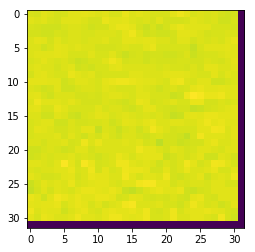

___


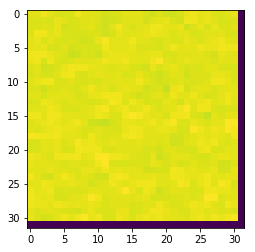

___


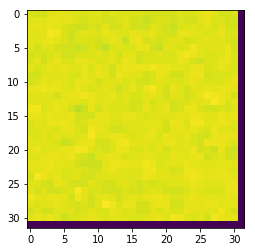

___


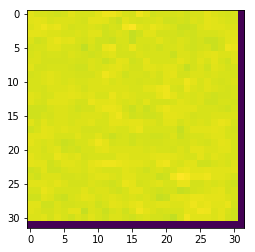

___


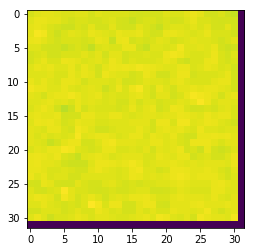

___


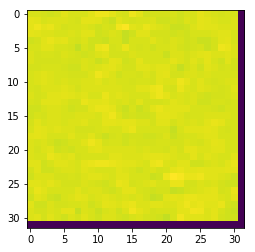

___


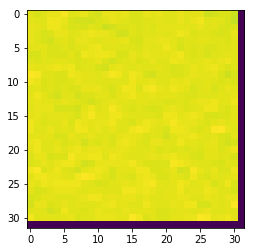

___


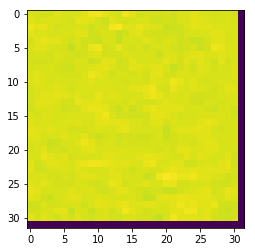

___


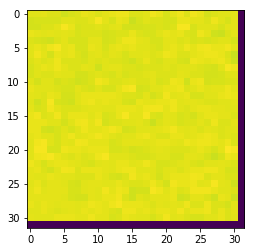

___


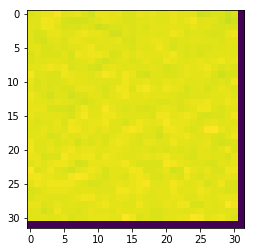

___


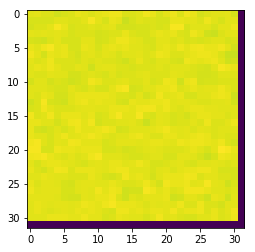

___


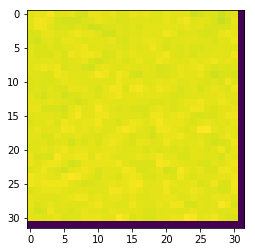

___


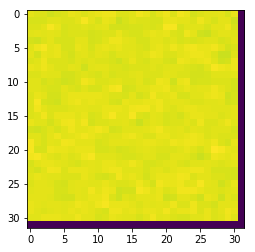

___


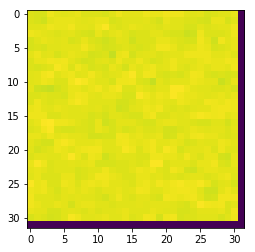

___


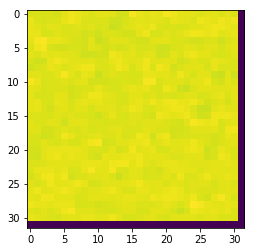

___


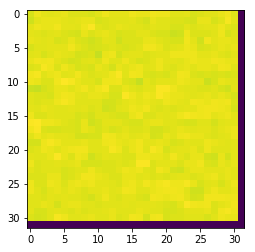

___


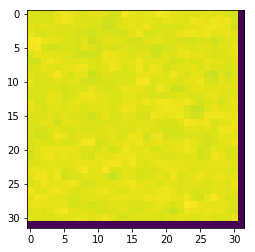

___


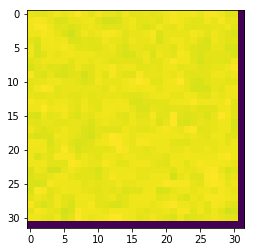

___


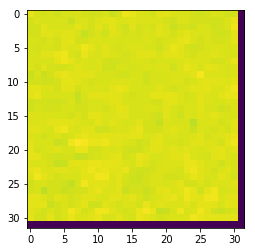

___


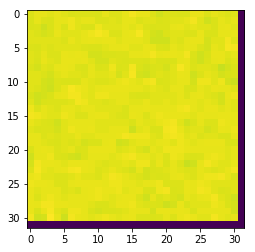

___


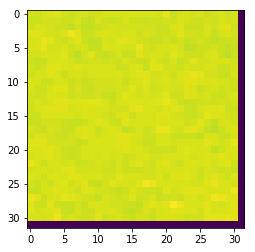

___


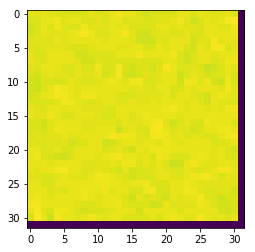

___


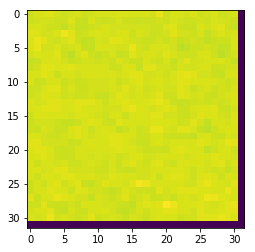

___


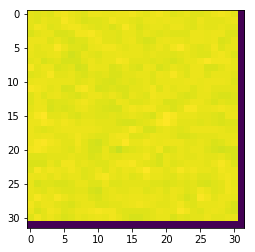

___


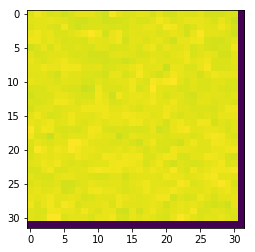

___


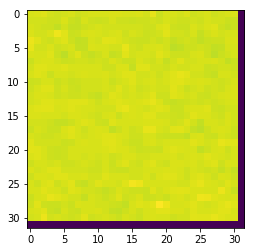

___


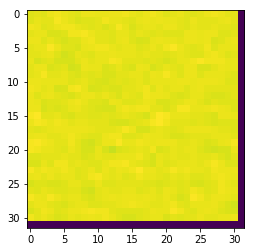

___


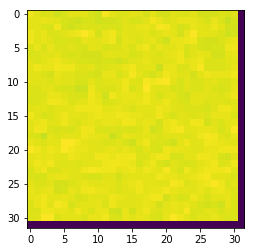

___


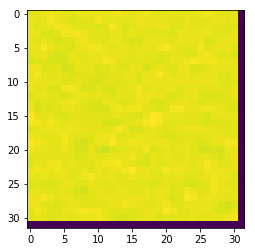

___


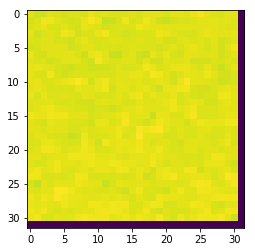

___


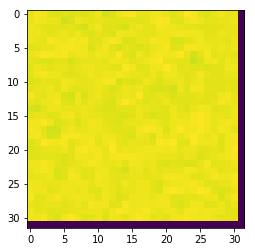

___


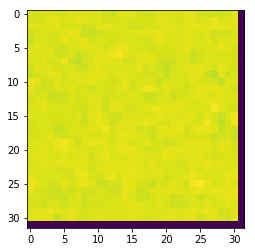

___


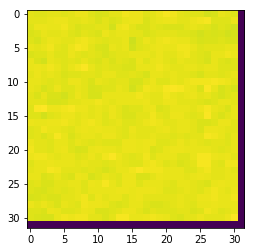

___


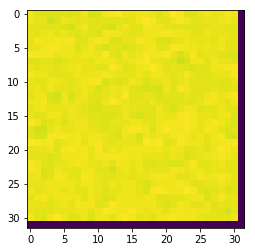

___


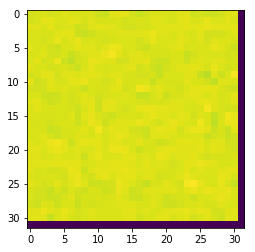

___


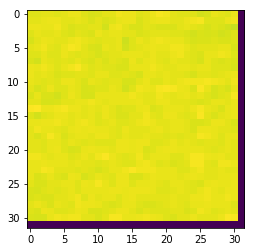

___


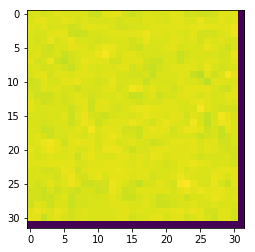

___


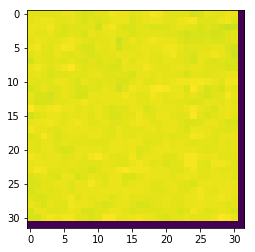

___


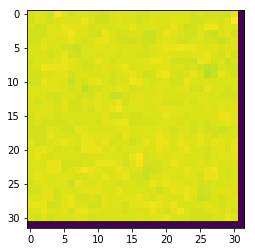

___


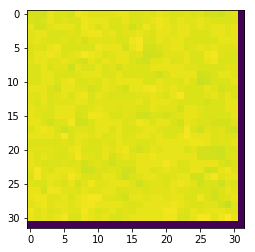

___


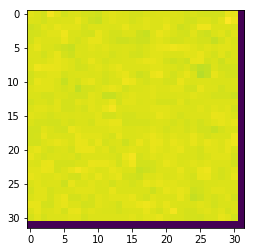

___


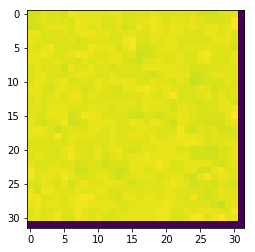

___


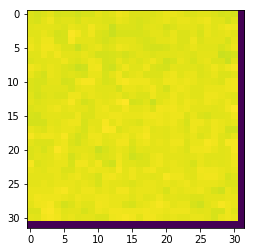

___


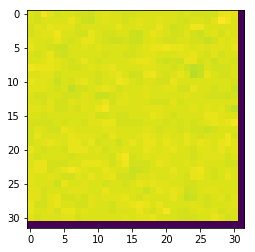

___


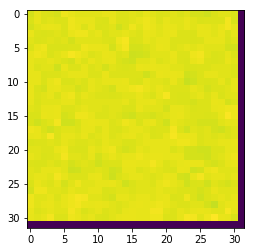

___


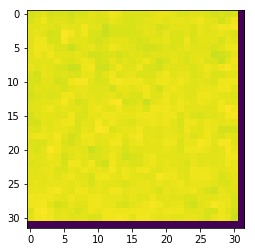

___


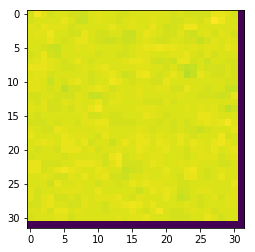

___


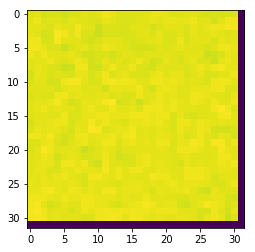

___


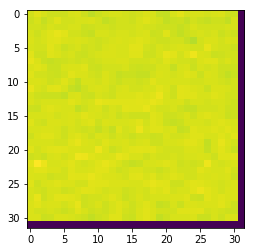

___


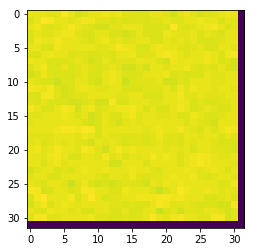

___


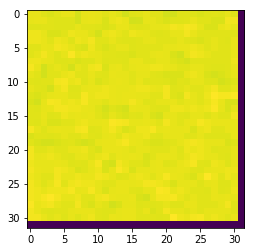

___


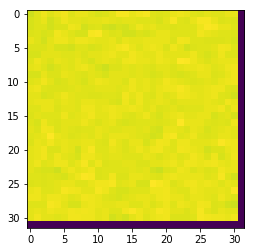

___


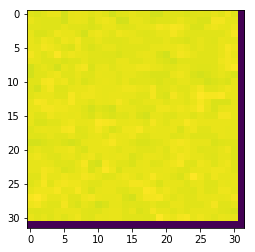

___


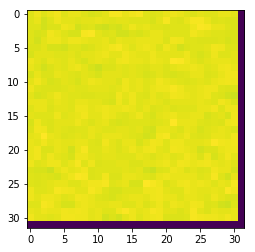

___


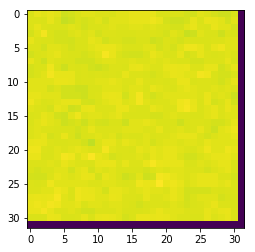

___


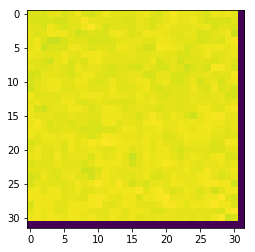

___


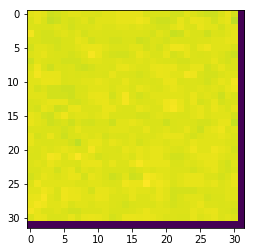

___


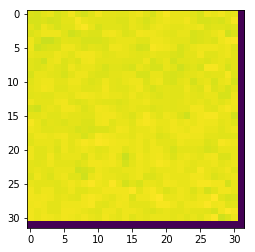

___


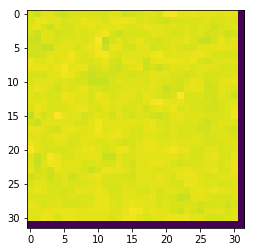

___


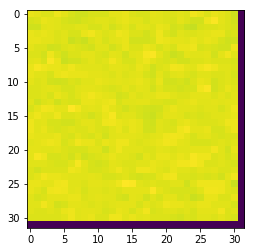

___


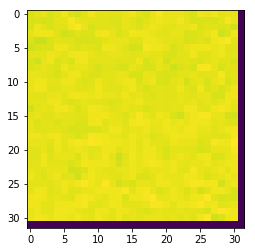

___


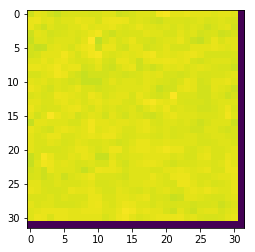

___


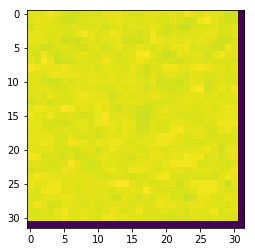

___


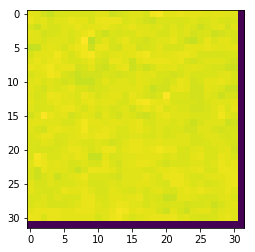

___


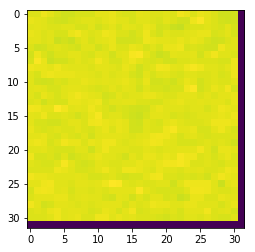

___


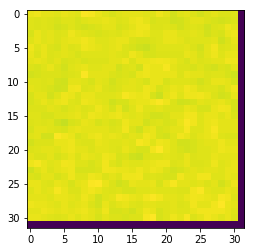

___


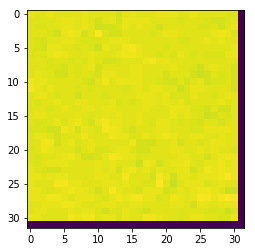

___


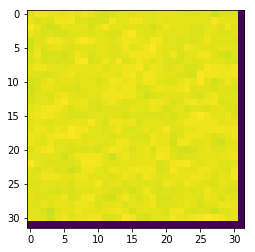

___


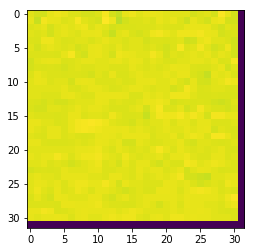

___


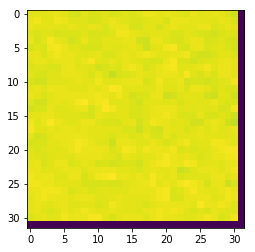

___


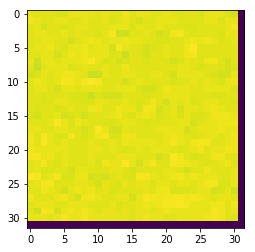

___


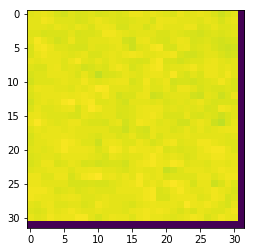

___


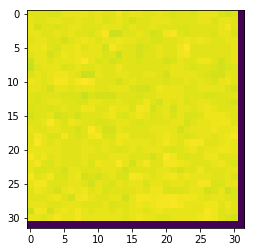

___


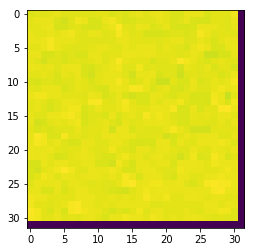

___


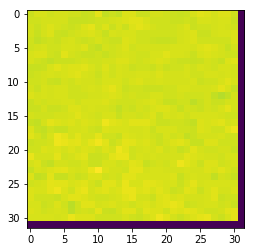

___


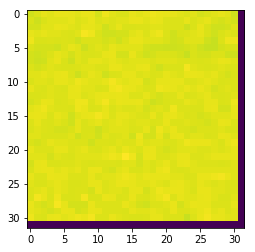

___


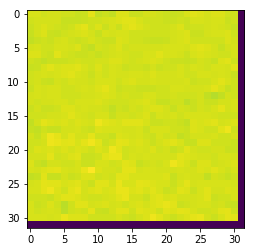

___


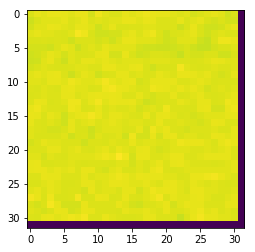

___


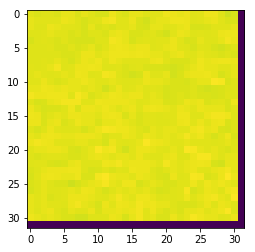

___


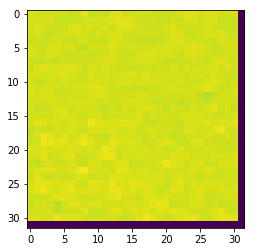

___


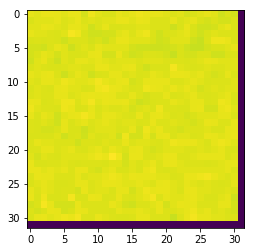

___


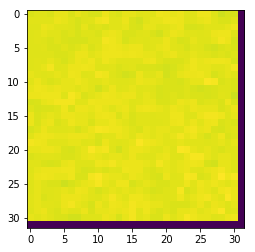

___


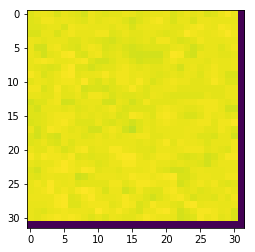

___


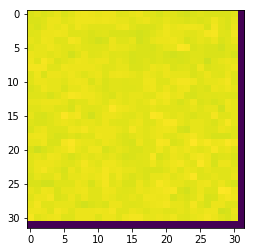

___


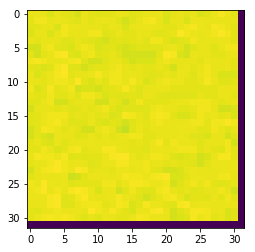

___


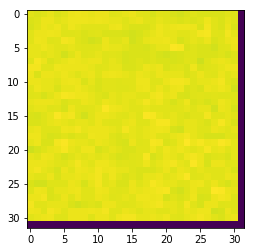

___


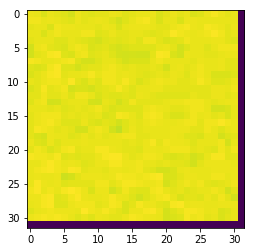

___


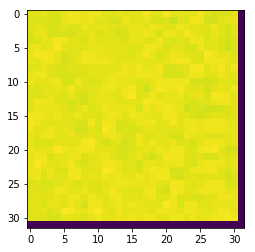

___


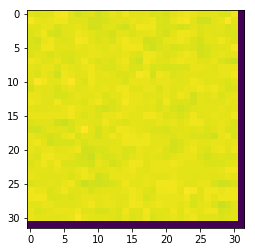

___


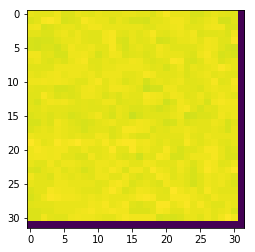

___


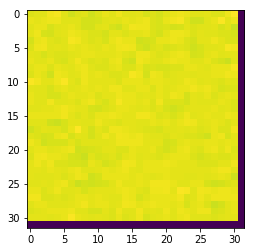

___


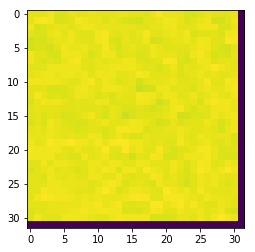

___


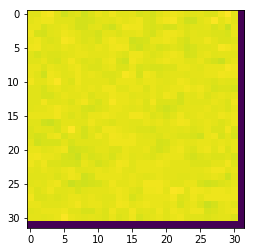

___


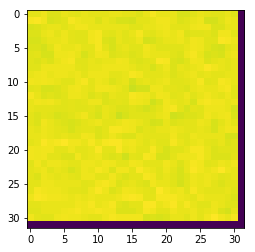

___


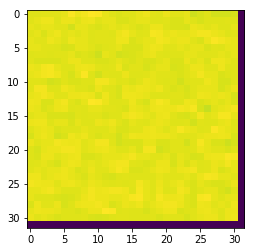

___


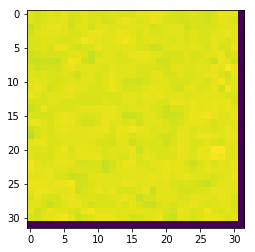

___


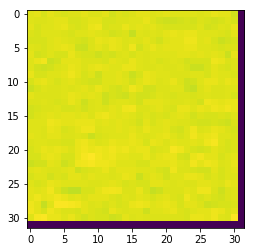

___


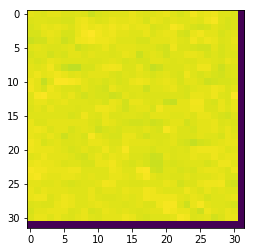

___


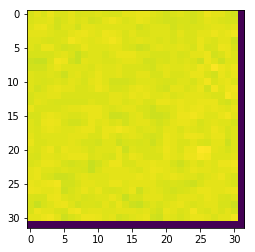

___


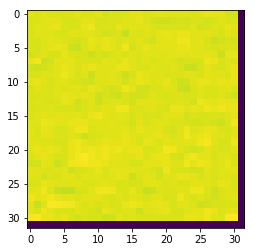

___


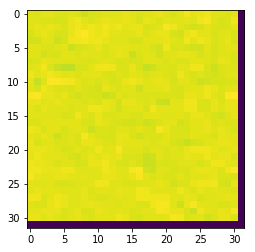

___


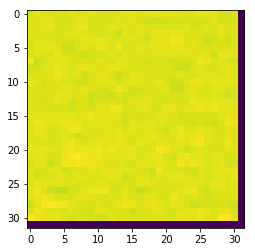

___


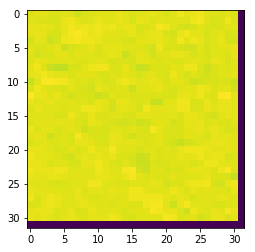

___


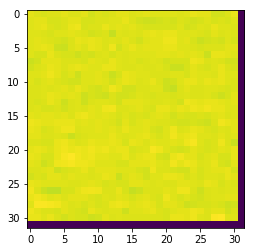

___


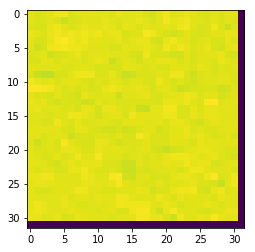

___


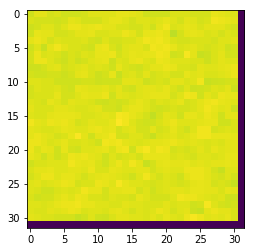

___


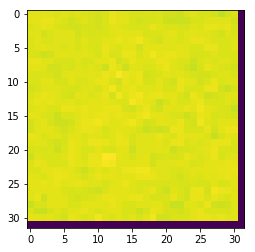

___


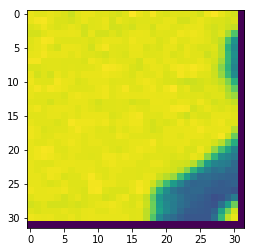

___


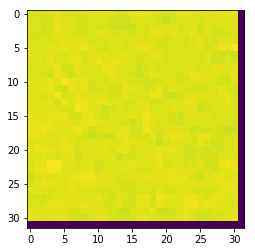

___


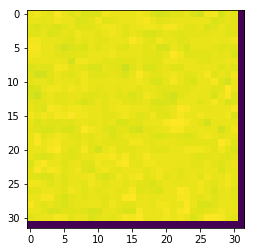

___


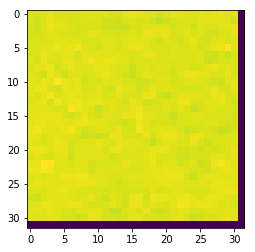

___


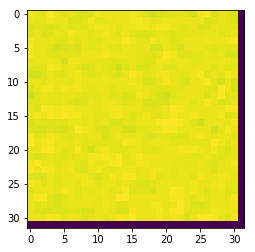

___


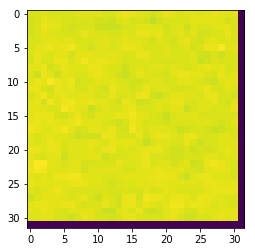

___


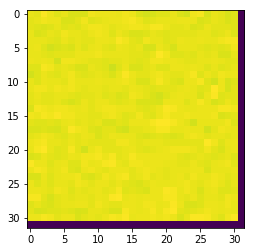

___


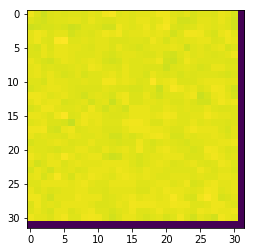

___


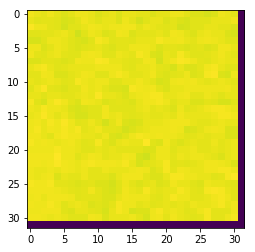

___


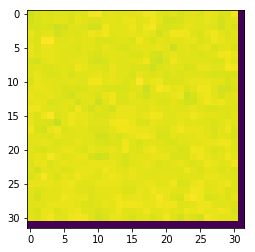

___


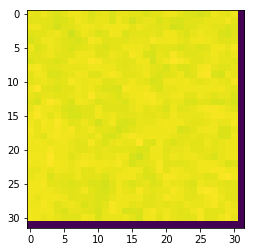

___


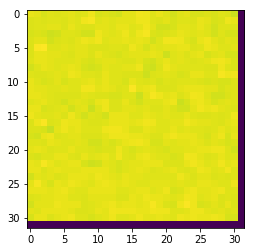

___


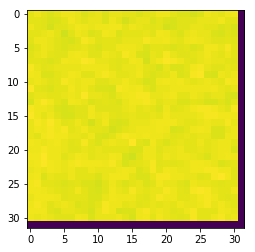

___


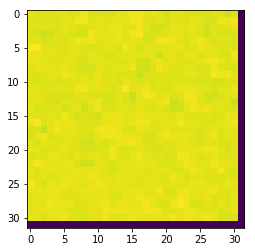

___


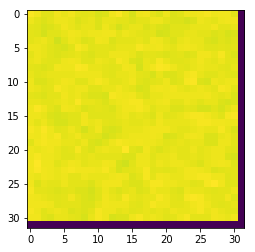

___


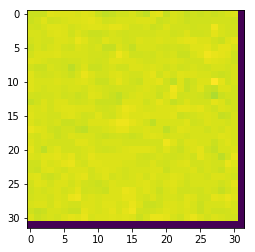

___


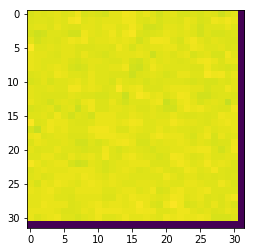

___


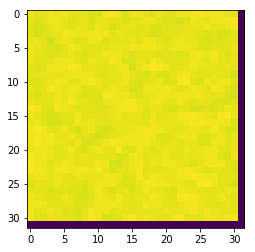

___


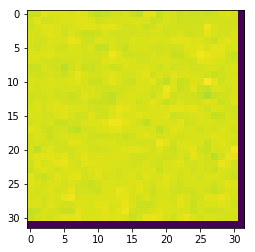

___


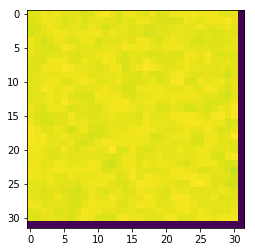

___


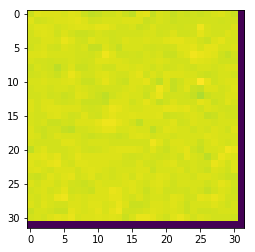

___


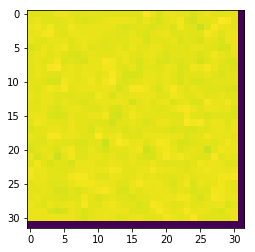

___


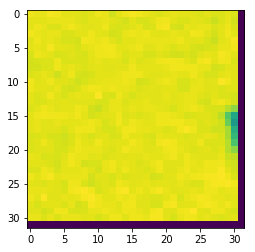

___


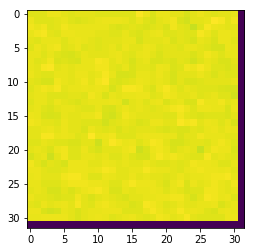

___


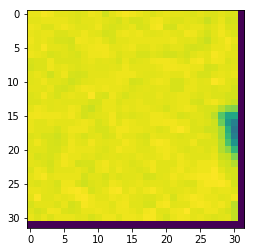

___


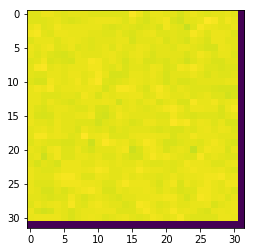

___


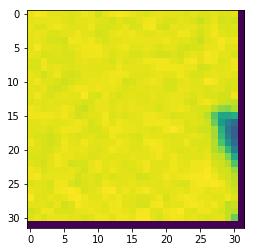

___


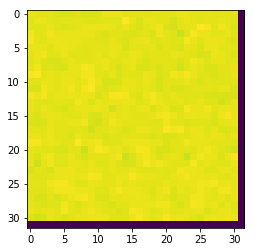

___


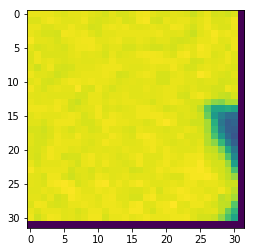

___


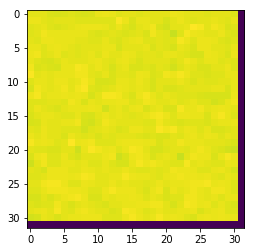

___


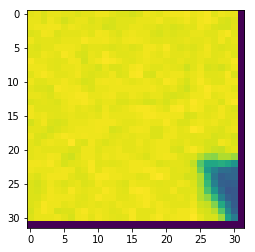

___


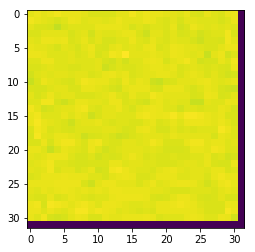

___


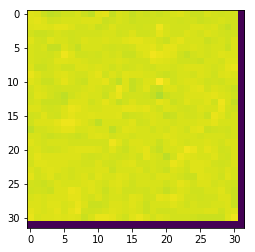

___


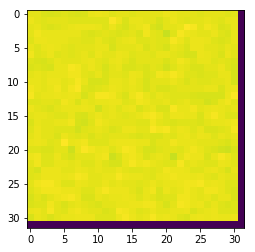

___


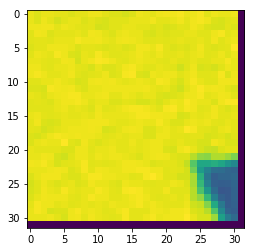

___


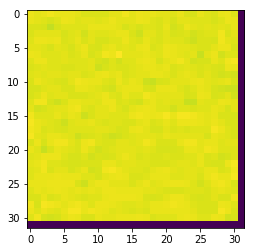

___


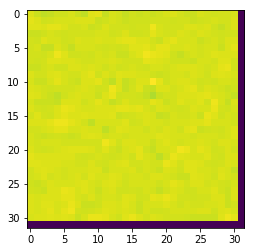

___


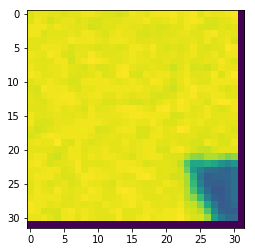

___


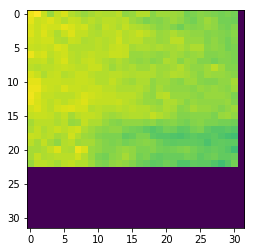

___


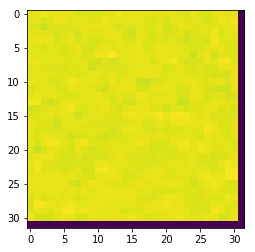

___


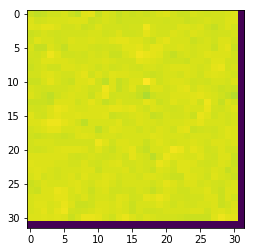

___


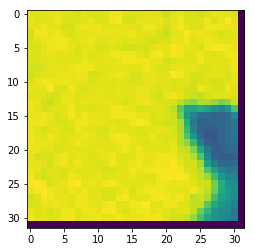

___


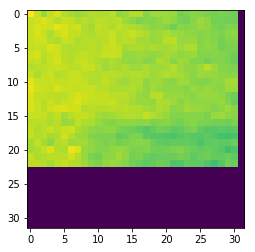

___


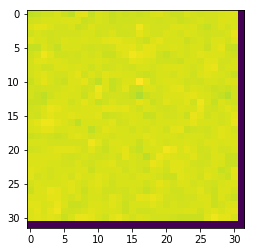

___


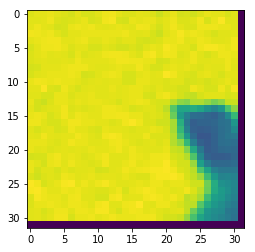

___


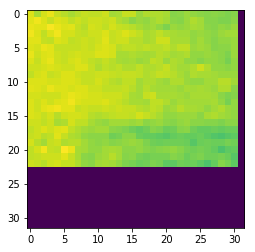

___


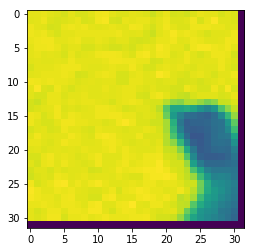

___


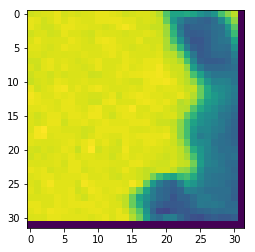

___


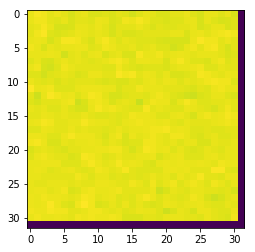

___


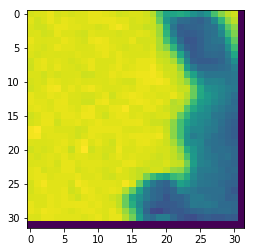

___


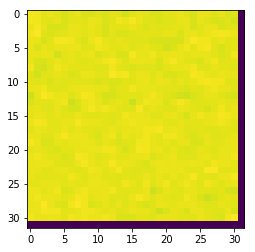

___


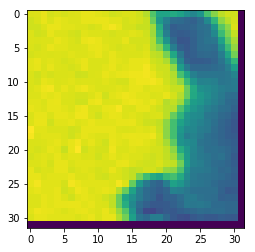

___


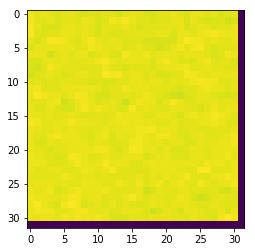

___


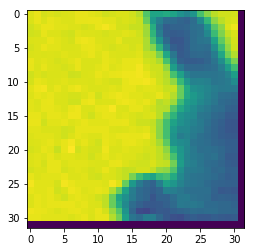

___


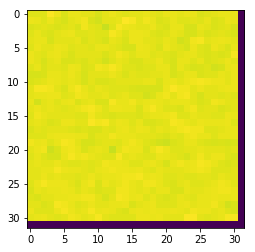

___


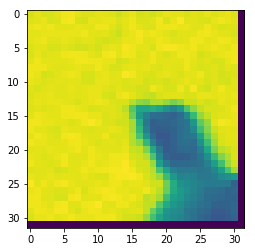

___


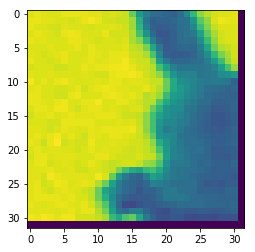

___


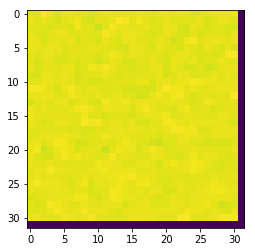

___


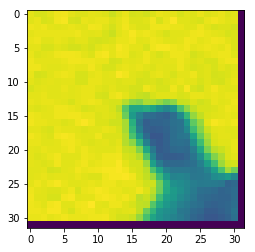

___


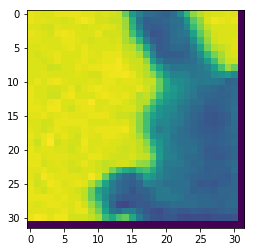

___


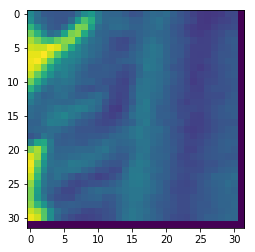

___


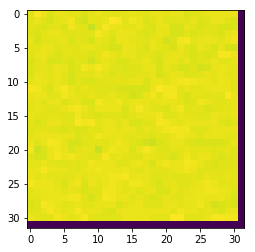

___


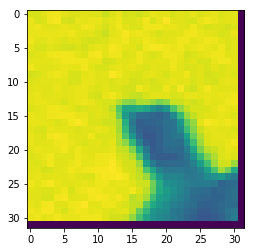

___
_________
Done!


In [5]:
all_patches = torch.zeros([5, 200,1,32,32])
for i in range(5):
    print("Processing keypoint for file: " + str(i+1))
    img = cv2.imread('../images/NotreDame'+str(i+1)+'.jpg')
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    all_patches[i] = torch.FloatTensor(getPatches(keypoints[i], gray,size=32, num=len(keypoints[i])))
for patches in all_patches:
    for patch in patches:
        im = patch[0].numpy()
        plt.imshow(im)
        plt.show()
        print("___")
    print("_________")
print("Done!")

### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "patches.pt" file:

In [6]:
output_path = "./saeedib_keypoints-test-on-20180-ti.pt"
torch.save(all_patches, output_path)
print("Done!")

Done!


### Test with your saved patches

In [7]:
test_patches = torch.load(output_path)
print(type(test_patches))
print(test_patches[0].shape)
print("Done!")

<class 'torch.Tensor'>
torch.Size([200, 1, 32, 32])
Done!
